# Real Estate Pricing Project

### IMPORTING IMPORTANT LIBRARIES

In [2]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing required libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## TASK 1--Loading the dataset

In [4]:
df=pd.read_csv('housing_dataset.csv')

In [5]:
df

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0              0       SC60       RL           65     8450   Pave  None   
1              1       SC20       RL           80     9600   Pave  None   
2              2       SC60       RL           68    11250   Pave  None   
3              3       SC70       RL           60     9550   Pave  None   
4              4       SC60       RL           84    14260   Pave  None   
...          ...        ...      ...          ...      ...    ...   ...   
1455        1455       SC60       RL           62     7917   Pave  None   
1456        1456       SC20       RL           85    13175   Pave  None   
1457        1457       SC70       RL           66     9042   Pave  None   
1458        1458       SC20       RL           68     9717   Pave  None   
1459        1459       SC20       RL           75     9937   Pave  None   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0     No     No          No   
1         Reg         Lvl    AllPub  ...        0     No     No          No   
2         IR1         Lvl    AllPub  ...        0     No     No          No   
3         IR1         Lvl    AllPub  ...        0     No     No          No   
4         IR1         Lvl    AllPub  ...        0     No     No          No   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0     No     No          No   
1456      Reg         Lvl    AllPub  ...        0     No  MnPrv          No   
1457      Reg         Lvl    AllPub  ...        0     No  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0     No     No          No   
1459      Reg         Lvl    AllPub  ...        0     No     No          No   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0    Feb   2008        WD         Normal     208500  
1          0    May   2007        WD         Normal     181500  
2          0    Sep   2008        WD         Normal     223500  
3          0    Feb   2006        WD        Abnorml     140000  
4          0    Dec   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0    Aug   2007        WD         Normal     175000  
1456       0    Feb   2010        WD         Normal     210000  
1457    2500    May   2010        WD         Normal     266500  
1458       0    Apr   2010        WD         Normal     142125  
1459       0    Jun   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [6]:
df.shape

(1460, 81)

In [7]:
df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave  None      Reg   
1           1       SC20       RL           80     9600   Pave  None      Reg   
2           2       SC60       RL           68    11250   Pave  None      IR1   
3           3       SC70       RL           60     9550   Pave  None      IR1   
4           4       SC60       RL           84    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [8]:
df.sample(20)

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
347          347       SC20       RL            0    17600   Pave  None   
1195        1195       SC60       RL           51     8029   Pave  None   
768          768       SC20       RL           70     9100   Pave  None   
1102        1102       SC20       RL           70     7000   Pave  None   
17            17       SC90       RL           72    10791   Pave  None   
806          806       SC80       RL           75     9750   Pave  None   
304          304       SC75       RM           87    18386   Pave  None   
1338        1338       SC60       RL           95    13450   Pave  None   
888          888       SC20       RL           95    15865   Pave  None   
653          653       SC50       RM           60    10320   Pave  Grvl   
974          974       SC70       RL           60    11414   Pave  None   
815          815       SC20       RL           48    12137   Pave  None   
1337        1337       SC30       RM          153     4118   Pave  Grvl   
1387        1387       SC50       RM           60     8520   Pave  Grvl   
458          458       SC70       RM            0     5100   Pave  Grvl   
1340        1340       SC20       RL           70     8294   Pave  None   
418          418       SC50       RL           60     8160   Pave  None   
1142        1142       SC60       RL           77     9965   Pave  None   
1008        1008       SC20       RL           43    12118   Pave  None   
1348        1348       SC20       RL            0    16196   Pave  None   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
347       IR1         Lvl    AllPub  ...        0     No     No          No   
1195      IR1         Lvl    AllPub  ...        0     No     No          No   
768       Reg         Lvl    AllPub  ...        0     No     No          No   
1102      Reg         Lvl    AllPub  ...        0     No   MnWw          No   
17        Reg         Lvl    AllPub  ...        0     No     No        Shed   
806       Reg         Lvl    AllPub  ...        0     No     No          No   
304       Reg         Lvl    AllPub  ...        0     No     No          No   
1338      IR1         Lvl    AllPub  ...        0     No     No          No   
888       IR1         Lvl    AllPub  ...        0     No     No          No   
653       Reg         Lvl    AllPub  ...        0     No  MnPrv          No   
974       IR1         Lvl    AllPub  ...        0     No  GdPrv          No   
815       IR2         Lvl    AllPub  ...        0     No     No          No   
1337      IR1         Bnk    AllPub  ...        0     No     No          No   
1387      Reg         Lvl    AllPub  ...        0     No   GdWo          No   
458       Reg         Lvl    AllPub  ...        0     No  MnPrv          No   
1340      Reg         Lvl    AllPub  ...        0     No   GdWo          No   
418       Reg         Lvl    AllPub  ...        0     No     No          No   
1142      Reg         Lvl    AllPub  ...        0     No     No          No   
1008      IR1         Lvl    AllPub  ...        0     No     No          No   
1348      IR3         Low    AllPub  ...        0     No     No          No   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
347        0    Dec   2009        WD         Normal     157500  
1195       0    Jul   2008        WD         Normal     176000  
768        0    Oct   2006        WD         Normal     216837  
1102       0    Apr   2007        WD         Family     135000  
17       500    Oct   2006        WD         Normal      90000  
806        0    Oct   2006        WD         Normal     135500  
304        0    May   2008        WD         Normal     295000  
1338       0    Jun   2006        WD         Normal     200000  
888        0    Oct   2007        WD         Normal     268000  
653        0    Jun   2008        WD         Normal     135000  
974        0    Oct   2009        WD         Normal    

In [9]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [10]:
df.describe()

Unnamed: 0  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    729.500000    57.623288   10516.828082     6.099315     5.575342   
std     421.610009    34.664304    9981.264932     1.382997     1.112799   
min       0.000000     0.000000    1300.000000     1.000000     1.000000   
25%     364.750000    42.000000    7553.500000     5.000000     5.000000   
50%     729.500000    63.000000    9478.500000     6.000000     5.000000   
75%    1094.250000    79.000000   11601.500000     7.000000     6.000000   
max    1459.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       YrSold      SalePrice  
count  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  
mean     15.060959     2.758904     43.489041  2007.815753  180921.195890  
std      55.757415    40.177307    496.123024     1.328095   79442.502883  
min       0.000000     0.000000      0.000000  2006.000000   34900.000000  
25%       0.000000     0.000000      0.000000  2007.000000  129975.000000  
50%       0.000000     0.000000      0.000000  2008.000000  163000.000000  
75%       0.000000     0.000000      0.000000  2009.000000  214000.000000  
max     480.000000   738.000000  15500.000000  2010.000000  755000.000000  

[8 rows x 36 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## TASK 2 -- Cleaning the dataset

### handling missing values

In [12]:
#Find the total number of missing values from the entire data
df.isnull().sum().sum()

82

In [13]:
df.isnull().sum()

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

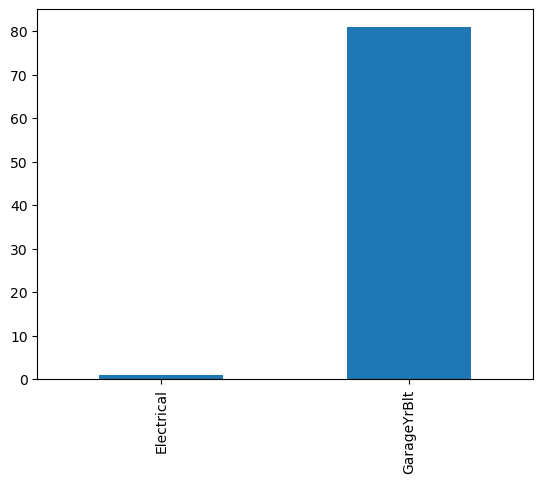

In [14]:
missing=df.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()

In [15]:
#droping the column "unnamed"
df=df.drop(['Unnamed: 0'],axis=1)

In [16]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          SC60       RL           65     8450   Pave  None      Reg   
1          SC20       RL           80     9600   Pave  None      Reg   
2          SC60       RL           68    11250   Pave  None      IR1   
3          SC70       RL           60     9550   Pave  None      IR1   
4          SC60       RL           84    14260   Pave  None      IR1   
...         ...      ...          ...      ...    ...   ...      ...   
1455       SC60       RL           62     7917   Pave  None      Reg   
1456       SC20       RL           85    13175   Pave  None      Reg   
1457       SC70       RL           66     9042   Pave  None      Reg   
1458       SC20       RL           68     9717   Pave  None      Reg   
1459       SC20       RL           75     9937   Pave  None      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0     No     No          No   
1            Lvl    AllPub       FR2  ...        0     No     No          No   
2            Lvl    AllPub    Inside  ...        0     No     No          No   
3            Lvl    AllPub    Corner  ...        0     No     No          No   
4            Lvl    AllPub       FR2  ...        0     No     No          No   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0     No     No          No   
1456         Lvl    AllPub    Inside  ...        0     No  MnPrv          No   
1457         Lvl    AllPub    Inside  ...        0     No  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0     No     No          No   
1459         Lvl    AllPub    Inside  ...        0     No     No          No   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0    Feb    2008        WD         Normal     208500  
1          0    May    2007        WD         Normal     181500  
2          0    Sep    2008        WD         Normal     223500  
3          0    Feb    2006        WD        Abnorml     140000  
4          0    Dec    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0    Aug    2007        WD         Normal     175000  
1456       0    Feb    2010        WD         Normal     210000  
1457    2500    May    2010        WD         Normal     266500  
1458       0    Apr    2010        WD         Normal     142125  
1459       0    Jun    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [17]:
# dropping the column "GarageYrBlt" as it is having maximum number of missing values 
#and also found irrelevant for the price prediction purpose
df=df.drop(["GarageYrBlt"],axis=1)

In [18]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          SC60       RL           65     8450   Pave  None      Reg   
1          SC20       RL           80     9600   Pave  None      Reg   
2          SC60       RL           68    11250   Pave  None      IR1   
3          SC70       RL           60     9550   Pave  None      IR1   
4          SC60       RL           84    14260   Pave  None      IR1   
...         ...      ...          ...      ...    ...   ...      ...   
1455       SC60       RL           62     7917   Pave  None      Reg   
1456       SC20       RL           85    13175   Pave  None      Reg   
1457       SC70       RL           66     9042   Pave  None      Reg   
1458       SC20       RL           68     9717   Pave  None      Reg   
1459       SC20       RL           75     9937   Pave  None      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0     No     No          No   
1            Lvl    AllPub       FR2  ...        0     No     No          No   
2            Lvl    AllPub    Inside  ...        0     No     No          No   
3            Lvl    AllPub    Corner  ...        0     No     No          No   
4            Lvl    AllPub       FR2  ...        0     No     No          No   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0     No     No          No   
1456         Lvl    AllPub    Inside  ...        0     No  MnPrv          No   
1457         Lvl    AllPub    Inside  ...        0     No  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0     No     No          No   
1459         Lvl    AllPub    Inside  ...        0     No     No          No   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0    Feb    2008        WD         Normal     208500  
1          0    May    2007        WD         Normal     181500  
2          0    Sep    2008        WD         Normal     223500  
3          0    Feb    2006        WD        Abnorml     140000  
4          0    Dec    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0    Aug    2007        WD         Normal     175000  
1456       0    Feb    2010        WD         Normal     210000  
1457    2500    May    2010        WD         Normal     266500  
1458       0    Apr    2010        WD         Normal     142125  
1459       0    Jun    2008        WD         Normal     147500  

[1460 rows x 79 columns]

In [19]:
df.shape

(1460, 79)

In [20]:
df.isnull().sum().sum()

1

1 missing value in column "Electrical"

To handle this, we will impute the most frequent value in place of missing value

Imputing Missing Values For Categorical Features
There are two ways to impute missing values for categorical features as follows:

Impute the Most Frequent Value

We will make use of ‘SimpleImputer’ in this case 
and as this is a non-numeric column 
we can’t use mean or median but we can use most frequent value and constant.

In [21]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='most_frequent')

# Reshape the data to a 2D array
data_2d = np.array(df["Electrical"]).reshape(-1, 1)

# Impute the missing values
imputed_data = imputer.fit_transform(data_2d)

# Assign the imputed data back to the DataFrame
df["Electrical"] = imputed_data


In [22]:
df.isnull().sum().sum()

0

In [23]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope

In [24]:
# Show all duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 79 columns]


## TASK 3-- Univariate Analysis

## Numerical Features
Listing all the numerical features in the dataset

In [52]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']

print('Number of Numerical Variables: ',len(numerical_features))

# visualise the numerical features
df[numerical_features].head()

Number of Numerical Variables:  203


LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0           65     8450            7            5       2003          2003   
1           80     9600            6            8       1976          1976   
2           68    11250            7            5       2001          2002   
3           60     9550            7            5       1915          1970   
4           84    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
0         196         706           0        150  ...             0.0   
1           0         978           0        284  ...             0.0   
2         162         486           0        434  ...             0.0   
3           0         216           0        540  ...             0.0   
4         350         655           0        490  ...             0.0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0             0.0           0.0           0.0          1.0   
1             0.0           0.0           0.0          1.0   
2             0.0           0.0           0.0          1.0   
3             0.0           0.0           0.0          1.0   
4             0.0           0.0           0.0          1.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Normal  SaleCondition_Partial  
0                   1.0                    0.0  
1                   1.0                    0.0  
2                   1.0                    0.0  
3                   0.0                    0.0  
4                   1.0                    0.0  

[5 rows x 203 columns]

## Temporal Variables(Eg. DateTime Variable)
#### List of variables that contain year

In [53]:
year_features=[feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_features

['YearBuilt', 'YearRemodAdd', 'YrSold']

#### Let's explore the content of these year features

In [54]:
for feature in year_features:
    print(feature,'\n', df[feature].unique())

YearBuilt 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
YrSold 
 [2008 2007 2006 2009 2010]


#### Analysing the Temporal Datetime Variables
#### we will check whether there is a relation between year the house is sold and the sales price

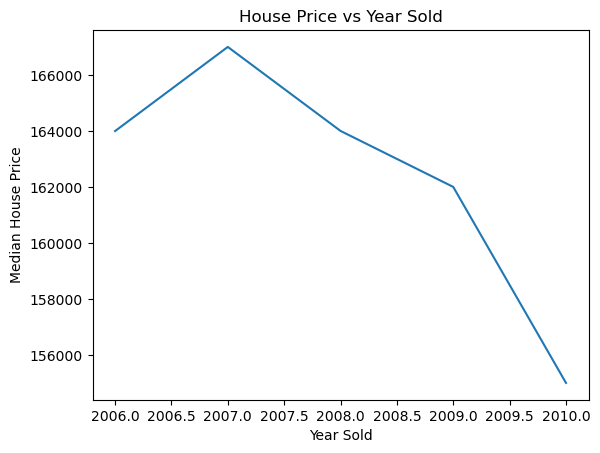

In [55]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Sold')
plt.show()

### Here we will compare the difference between All years feature with Sales Price

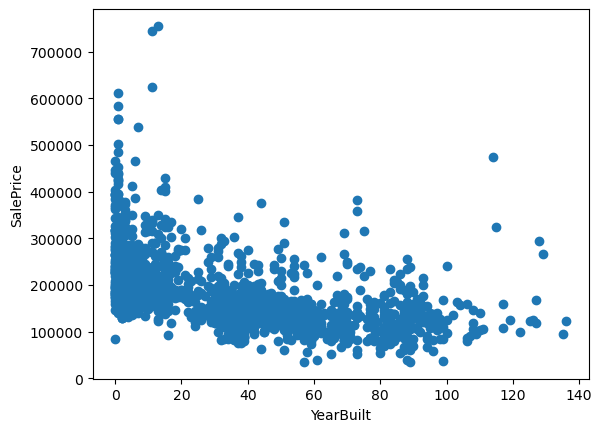

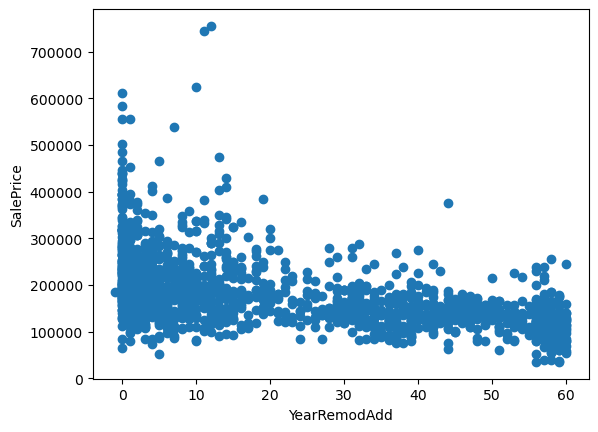

In [56]:
for feature in year_features:
    if feature!='YrSold':
        data=df.copy()
        ## we will capture the difference between year variable and year the house is sold
        data[feature]=data['YrSold']-data[feature]
        
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

## Discrete Variables/Features

In [57]:
# Numerical Variables are usually of 2 types
## 1. Continues variable and Discrete Variables

discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_features+['Id']]
print('Discrete Variables Count: {}'.format(len(discrete_features)))

Discrete Variables Count: 184


In [58]:
discrete_features

['OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_None',
 'Alley_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyl

In [59]:
df[discrete_features].head()

OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0            7            5             0             1             0   
1            6            8             0             0             1   
2            7            5             0             1             0   
3            7            5             0             1             0   
4            8            5             0             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  ...  \
0         2         1             3             1             8  ...   
1         2         0             3             1             6  ...   
2         2         1             3             1             6  ...   
3         1         0             3             1             7  ...   
4         2         1             4             1             9  ...   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0             0.0             0.0           0.0           0.0          1.0   
1             0.0             0.0           0.0           0.0          1.0   
2             0.0             0.0           0.0           0.0          1.0   
3             0.0             0.0           0.0           0.0          1.0   
4             0.0             0.0           0.0           0.0          1.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Normal  SaleCondition_Partial  
0                   1.0                    0.0  
1                   1.0                    0.0  
2                   1.0                    0.0  
3                   0.0                    0.0  
4                   1.0                    0.0  

[5 rows x 184 columns]

### Finding the relationship between dicrete features and sale Price

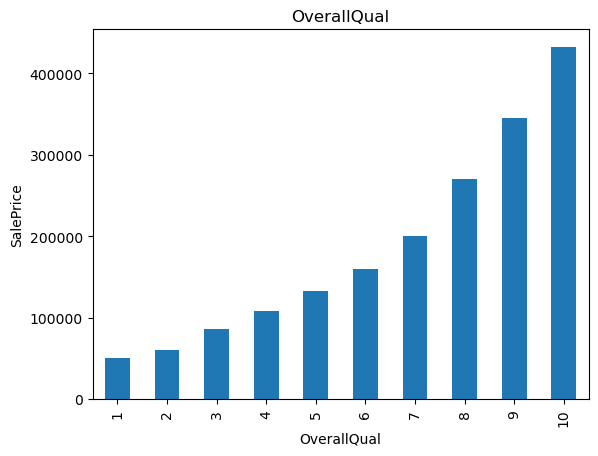

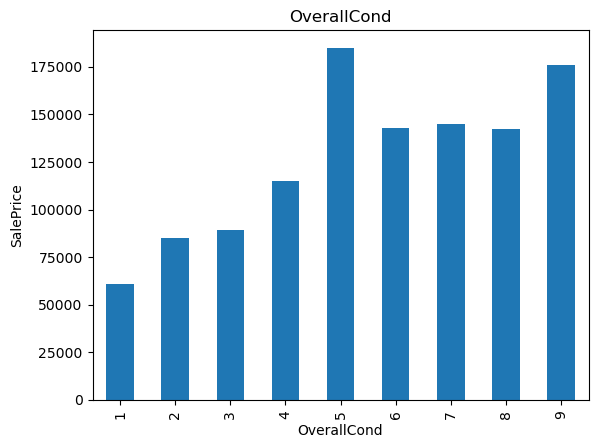

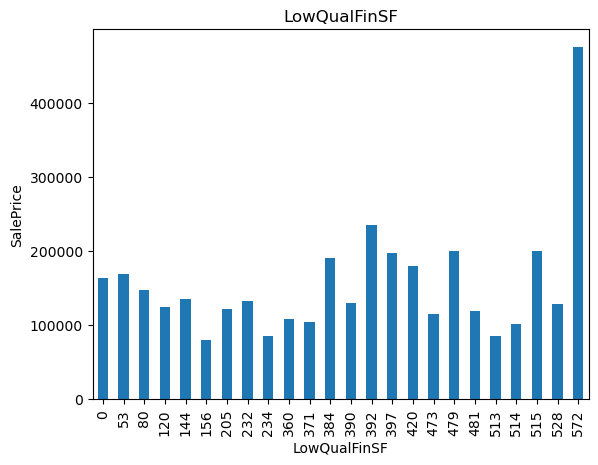

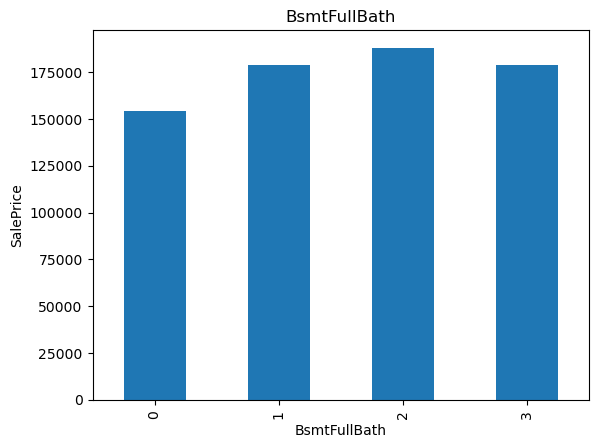

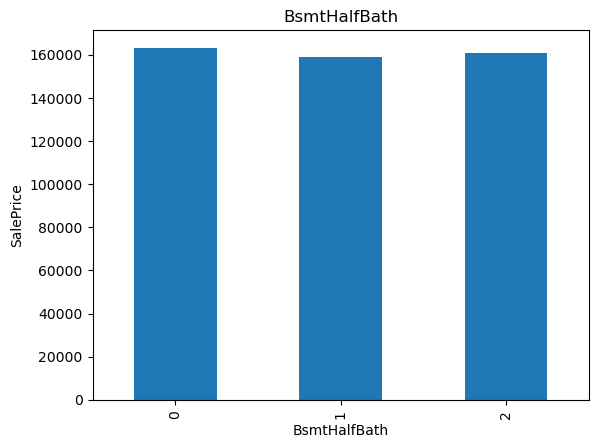

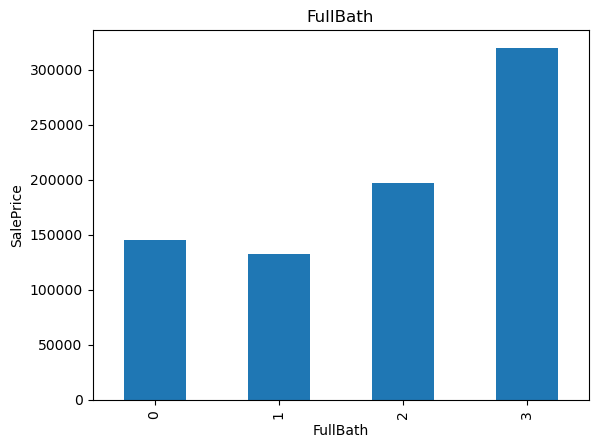

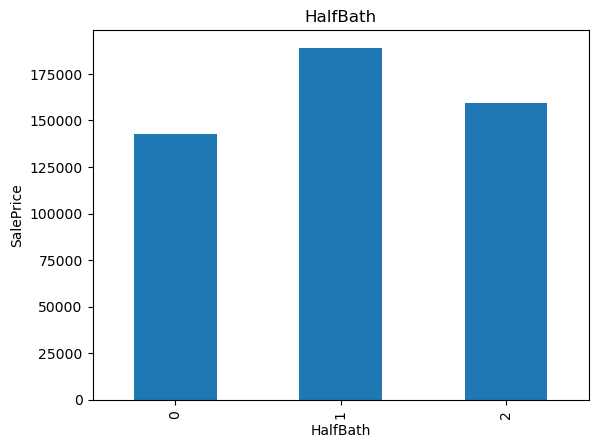

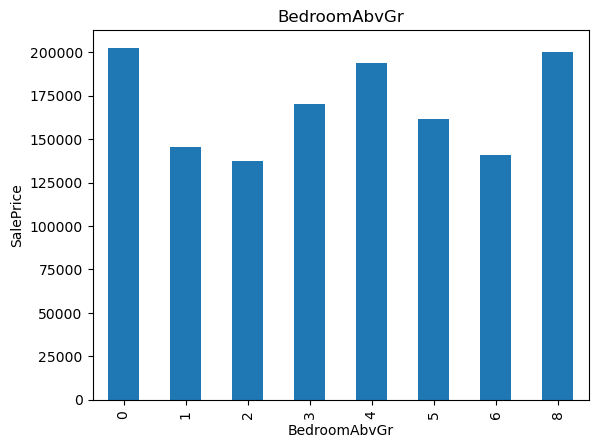

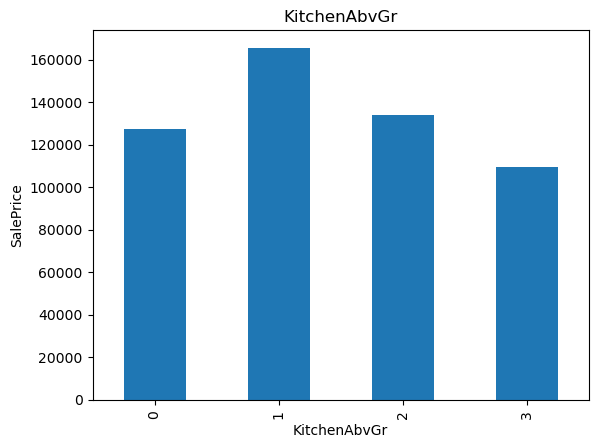

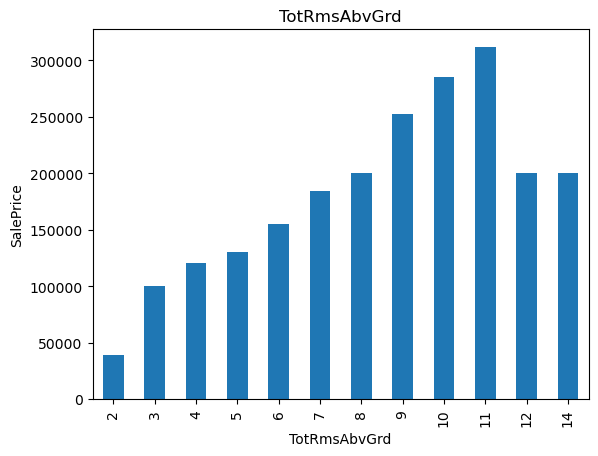

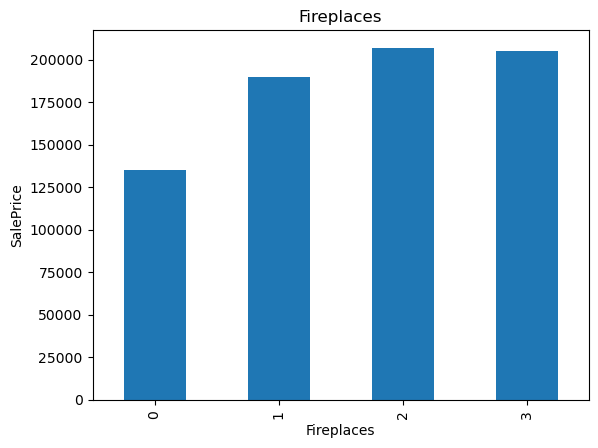

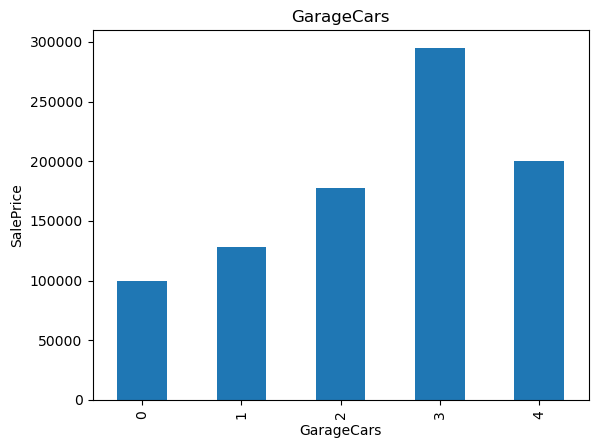

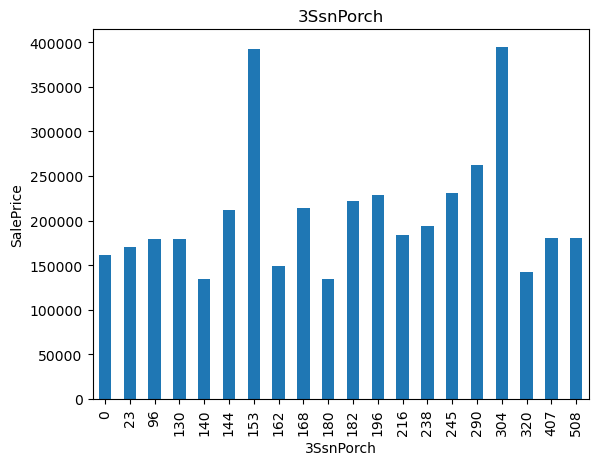

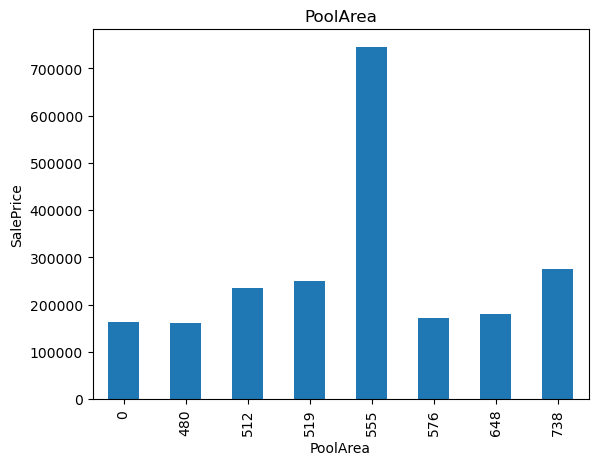

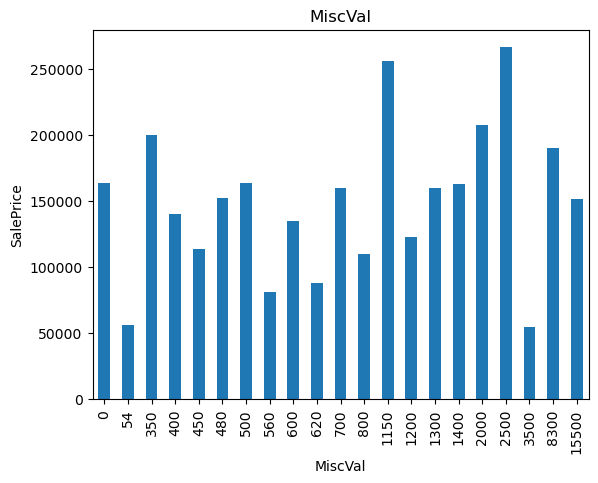

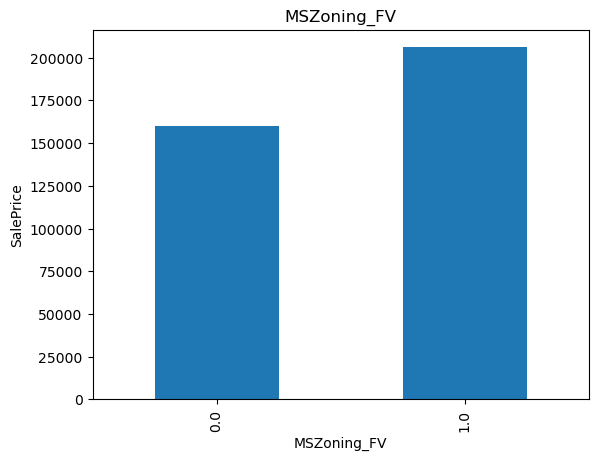

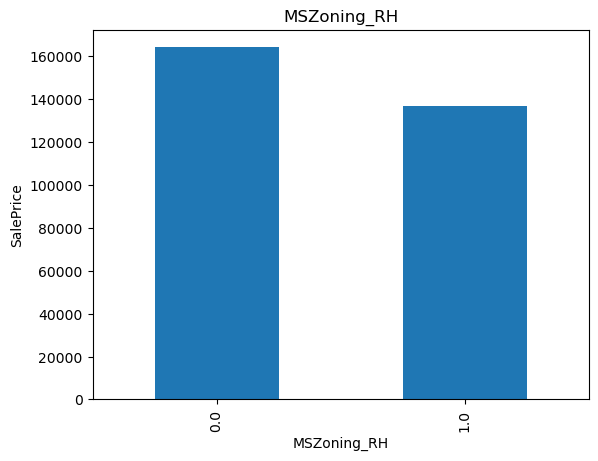

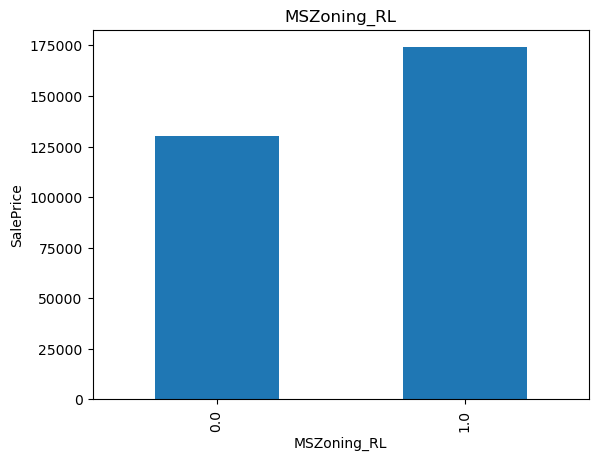

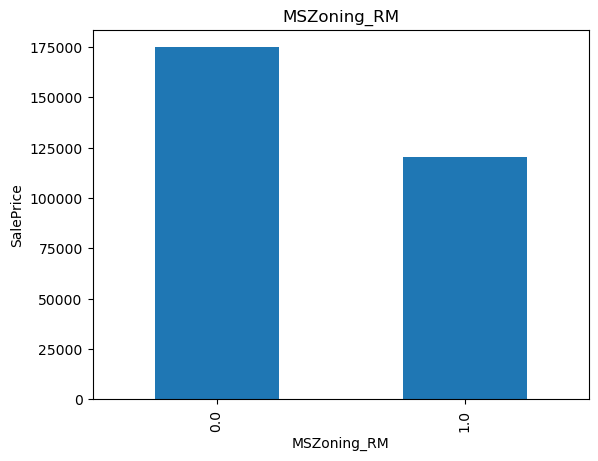

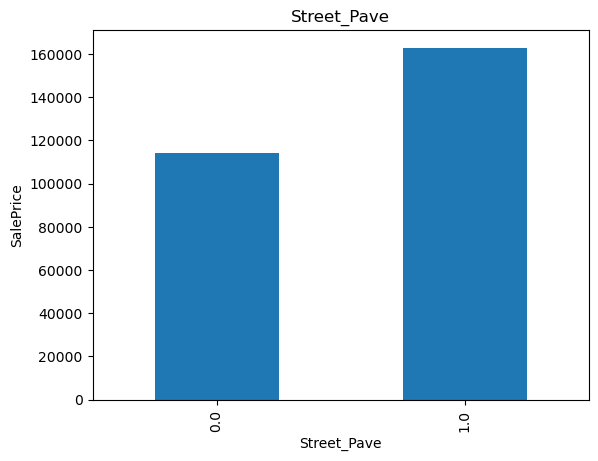

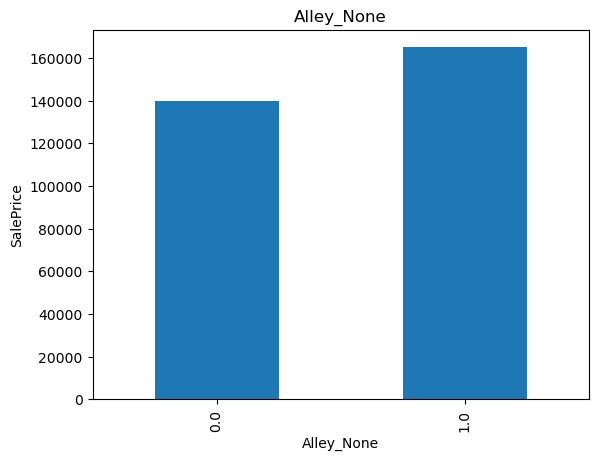

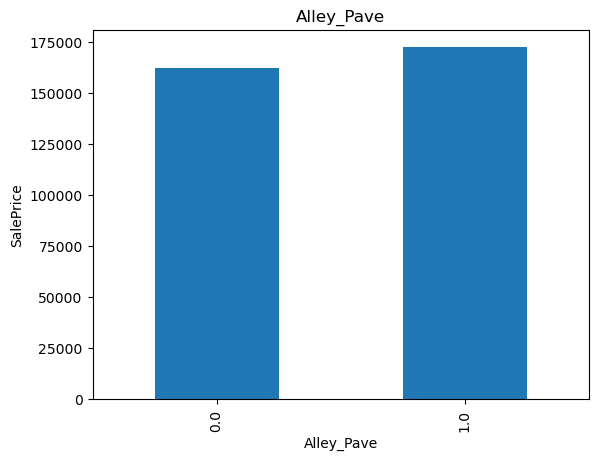

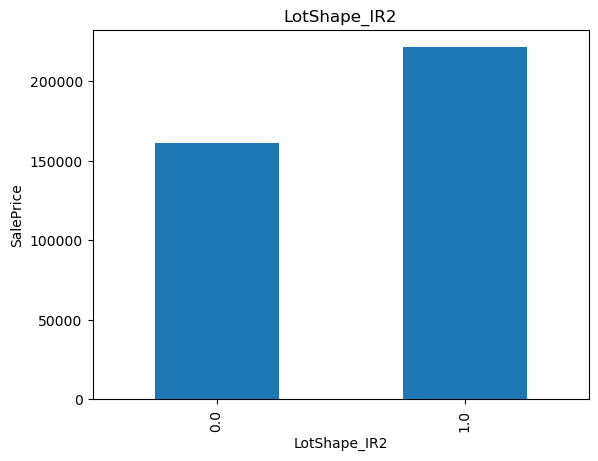

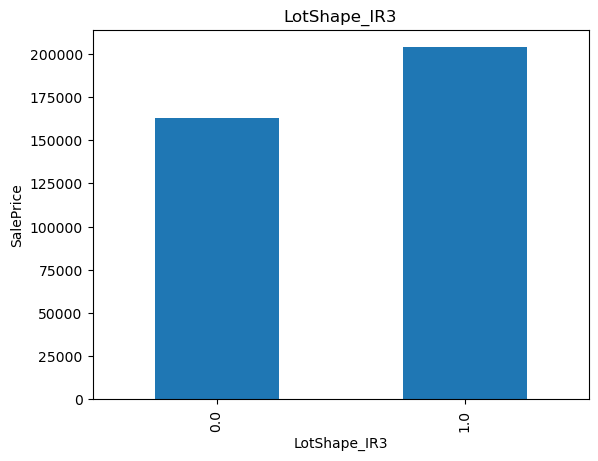

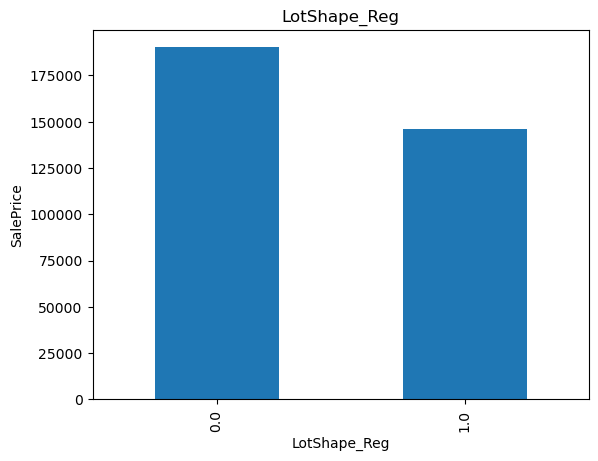

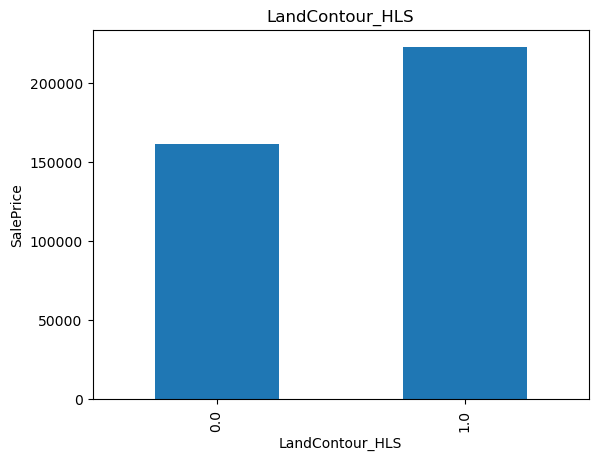

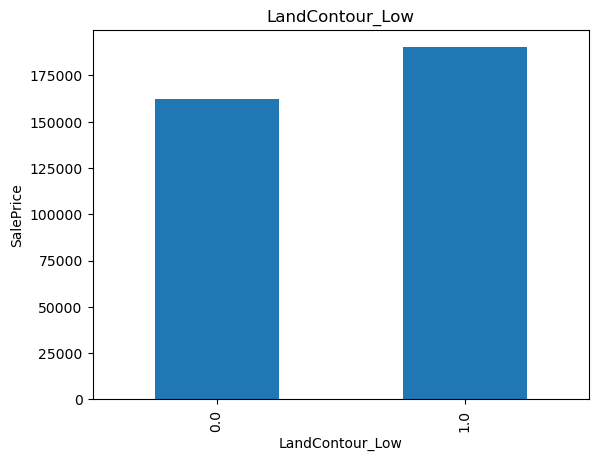

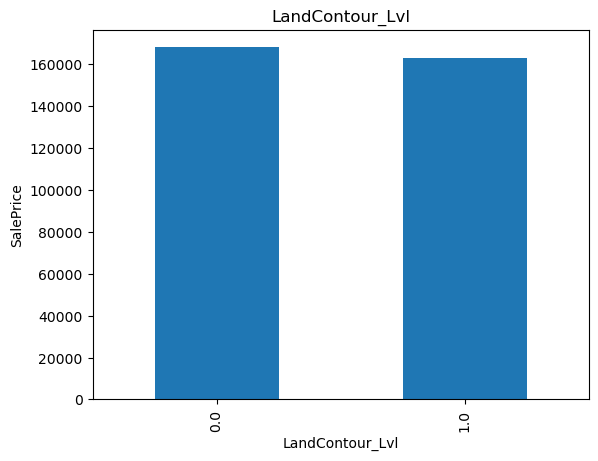

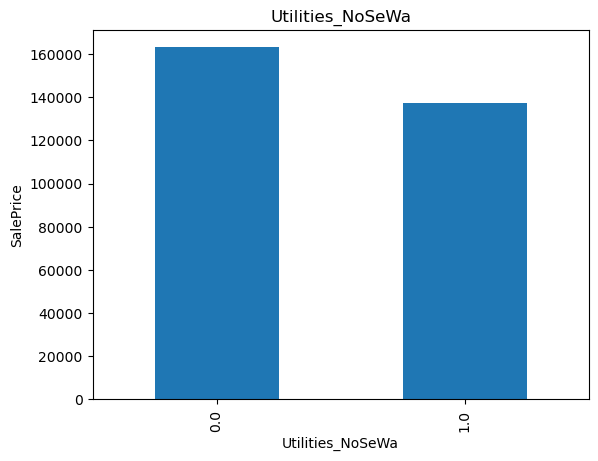

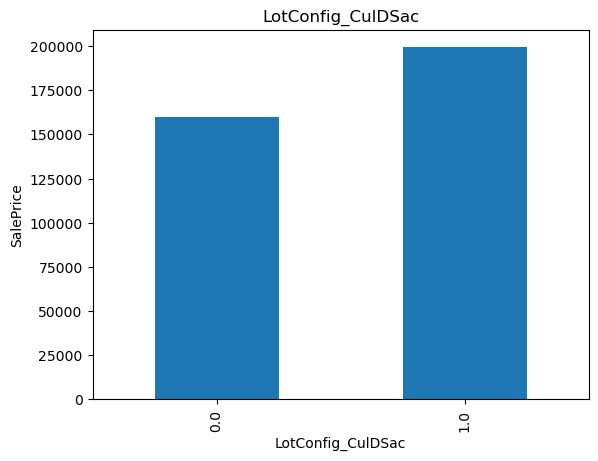

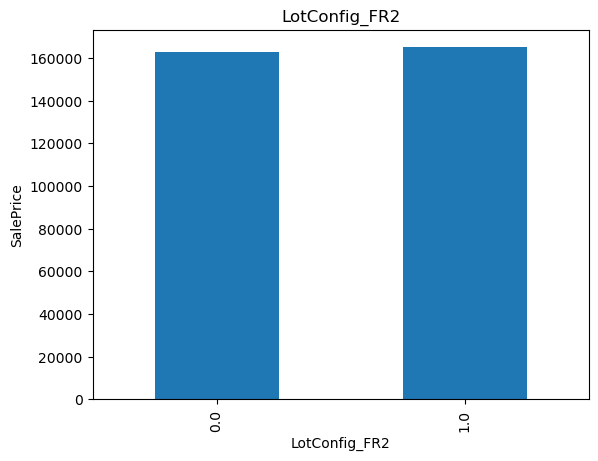

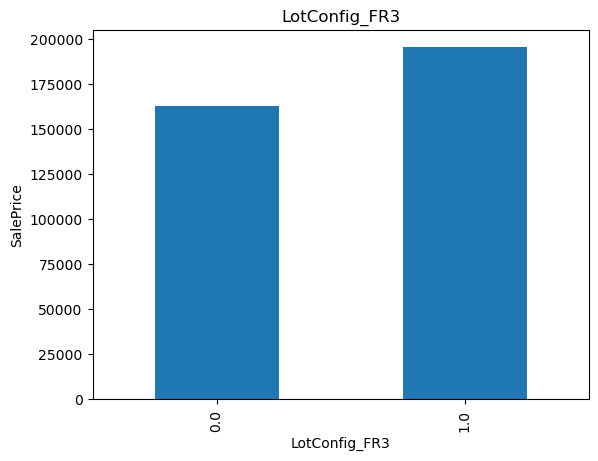

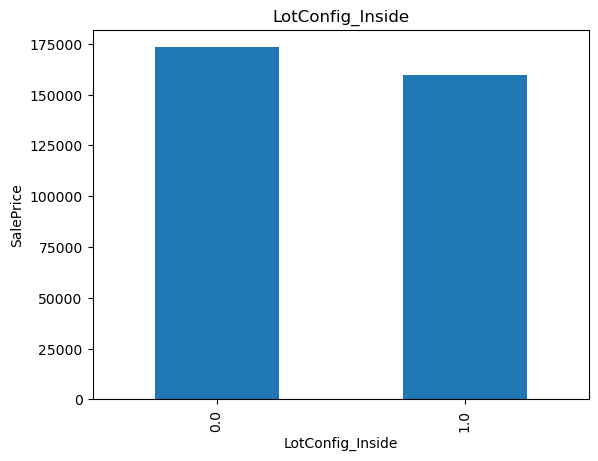

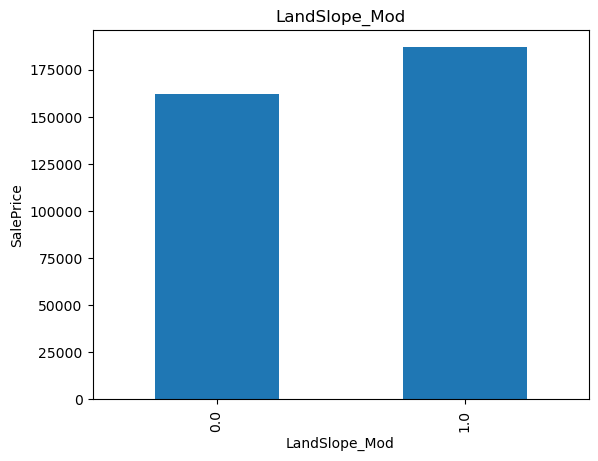

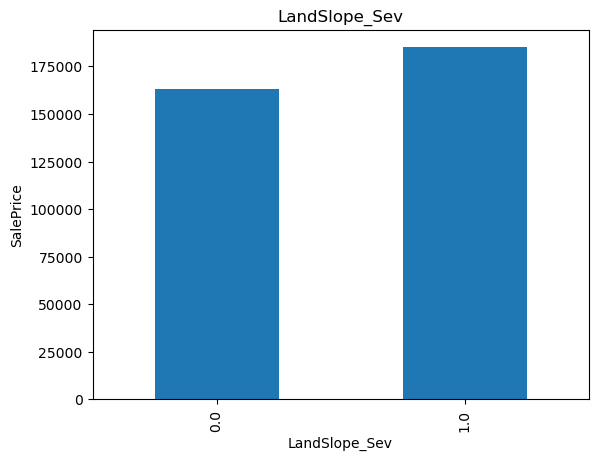

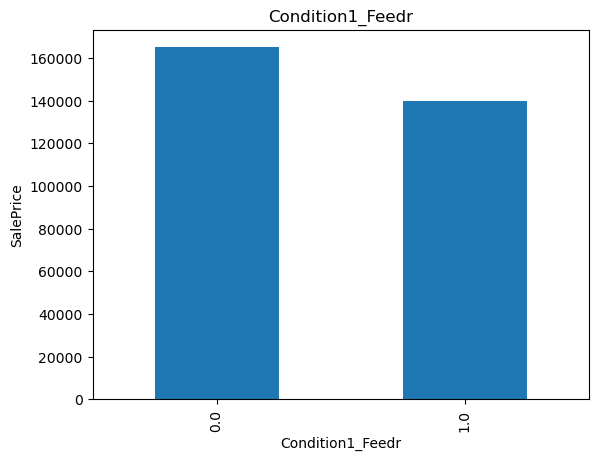

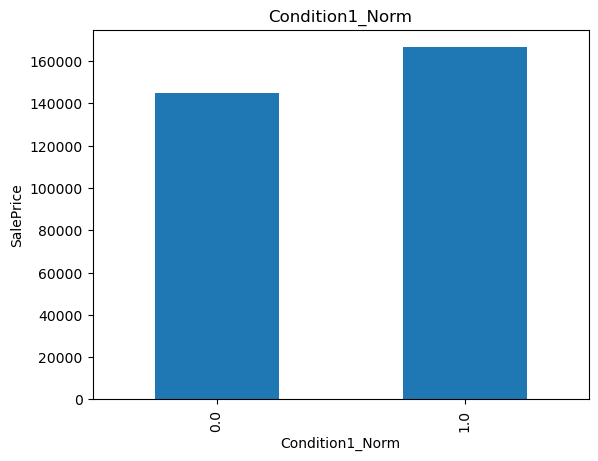

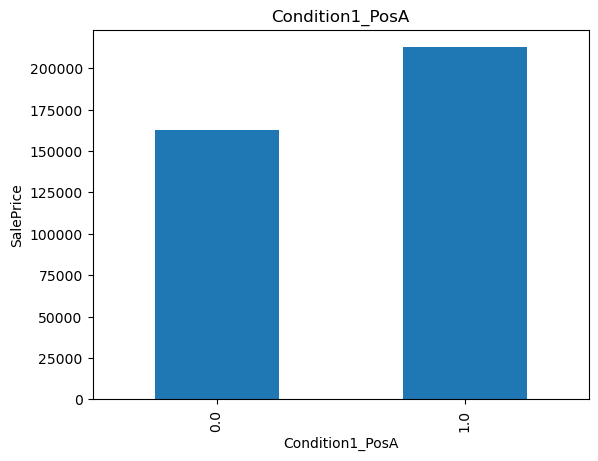

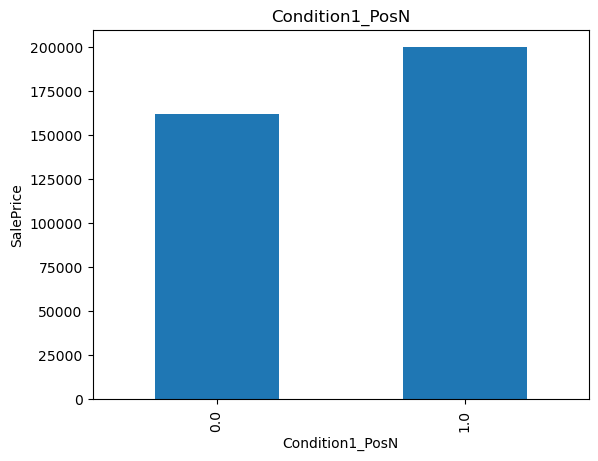

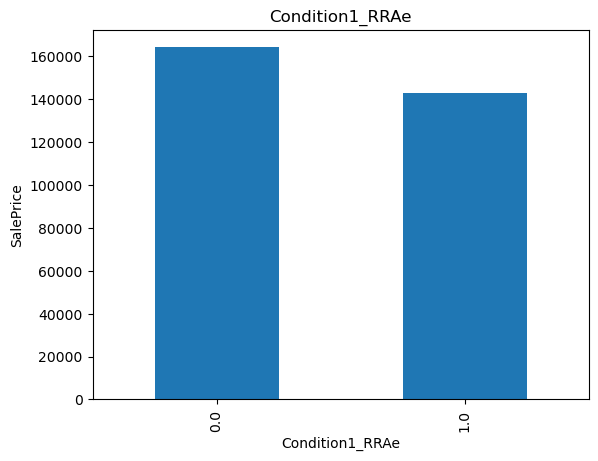

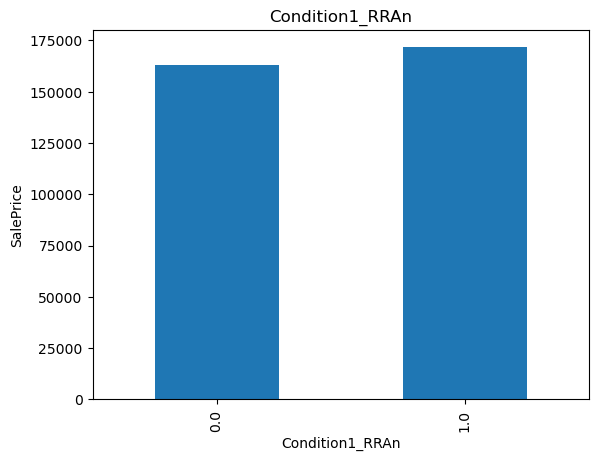

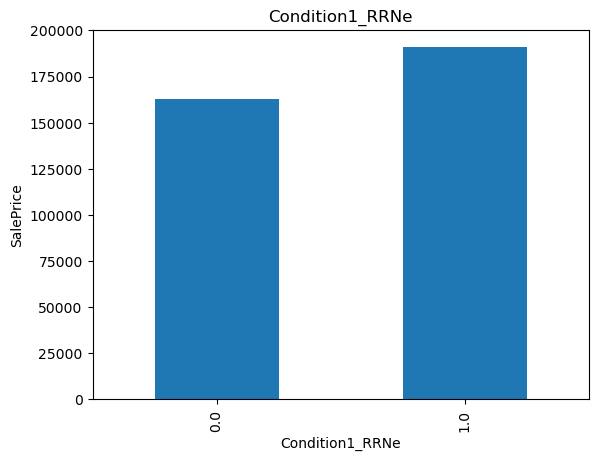

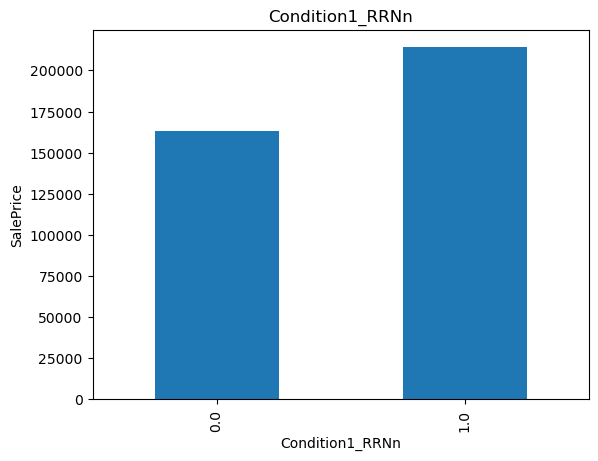

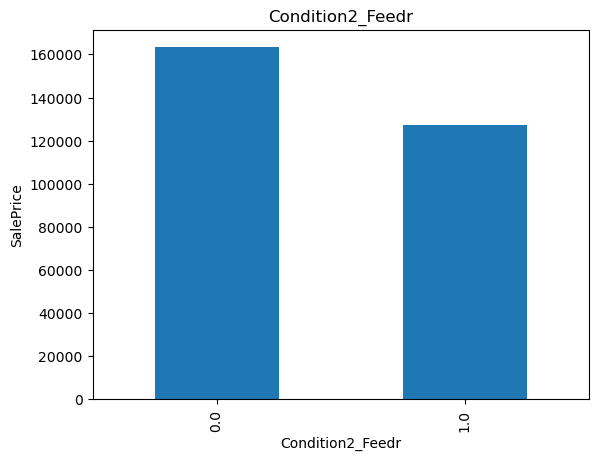

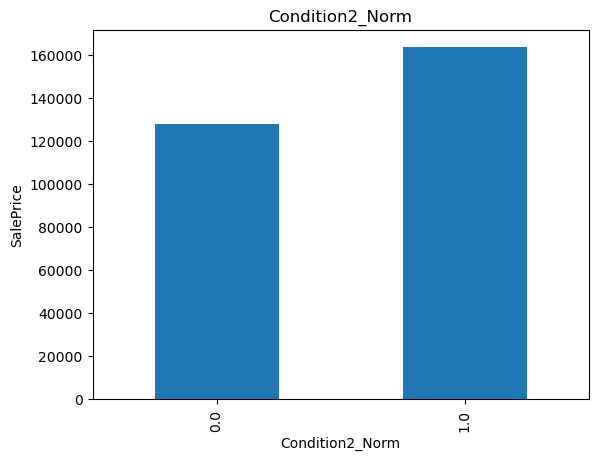

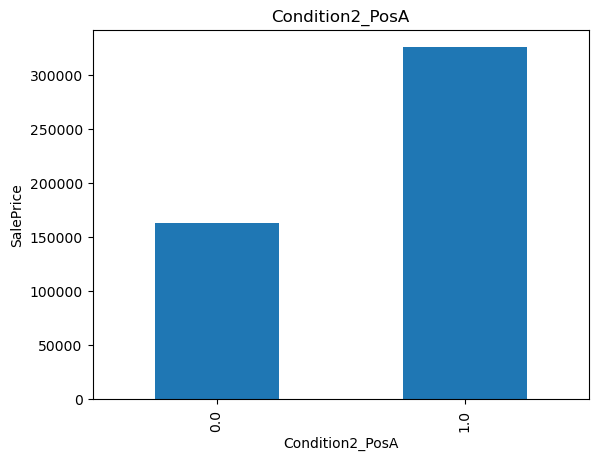

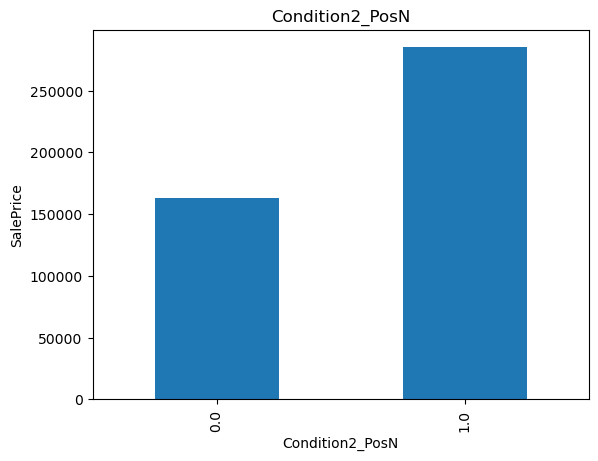

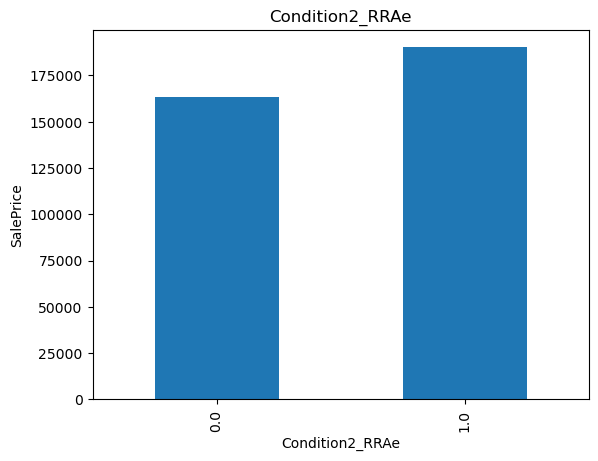

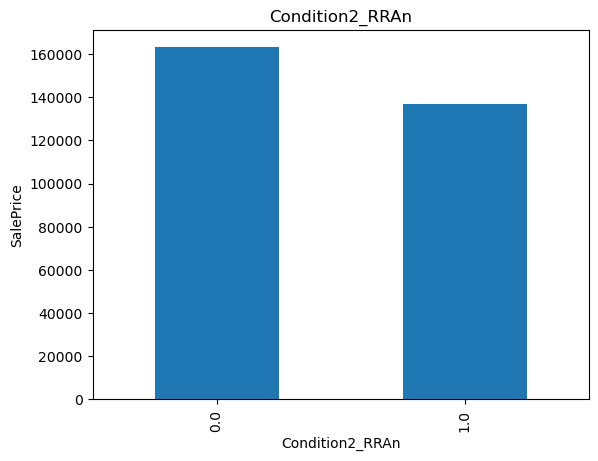

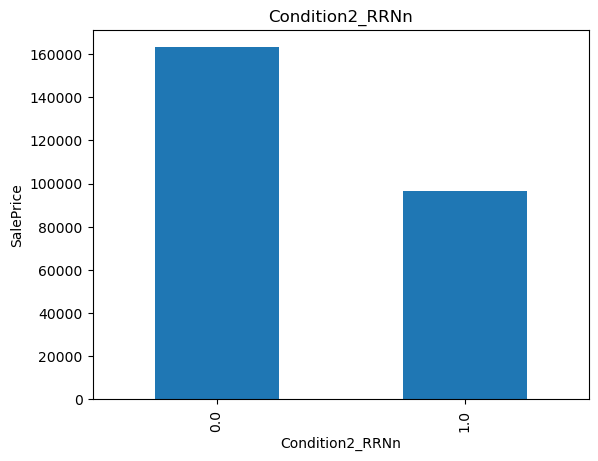

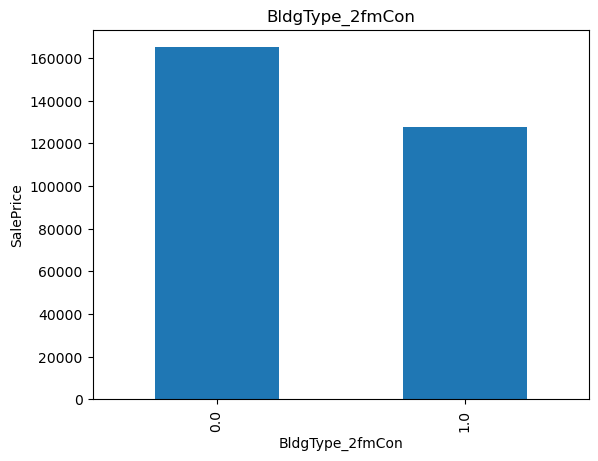

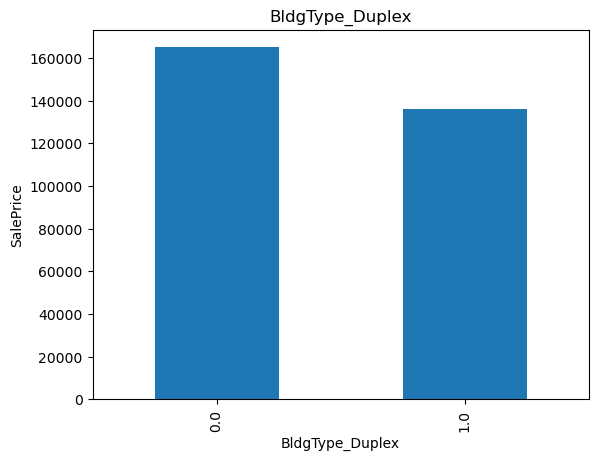

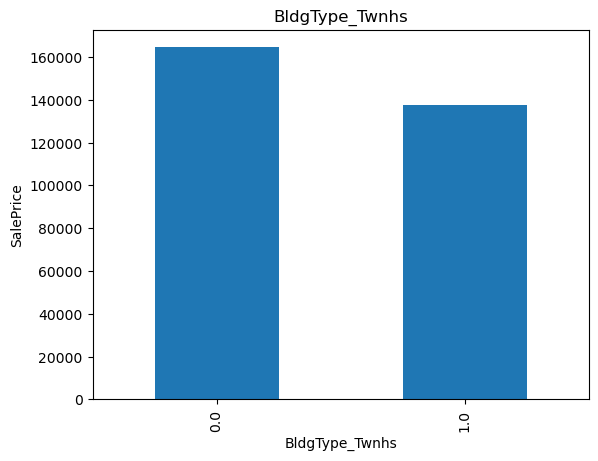

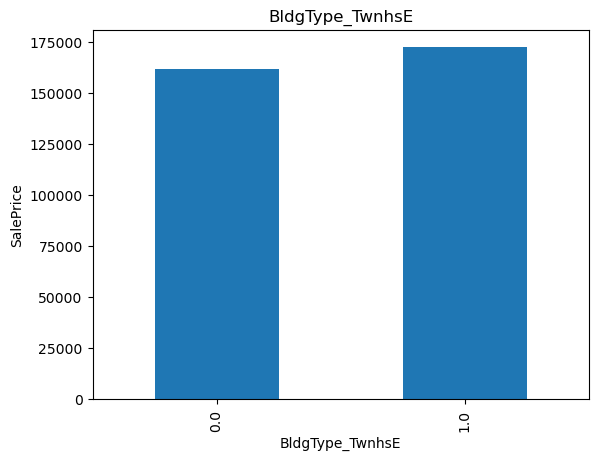

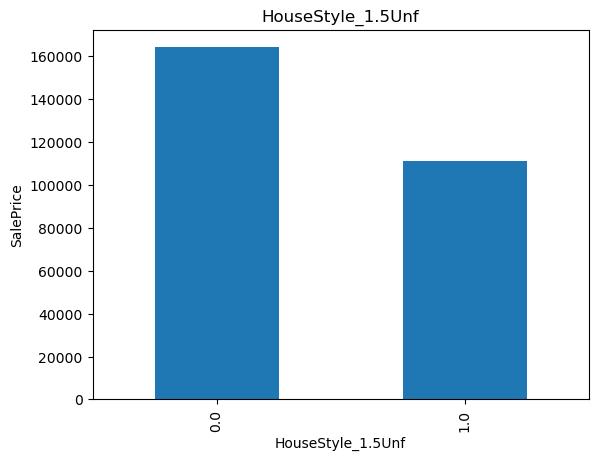

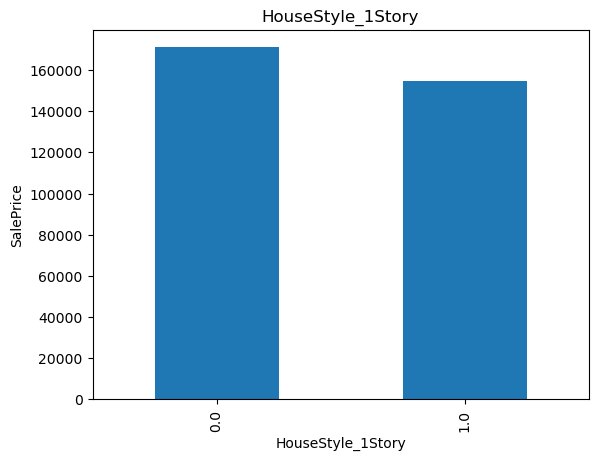

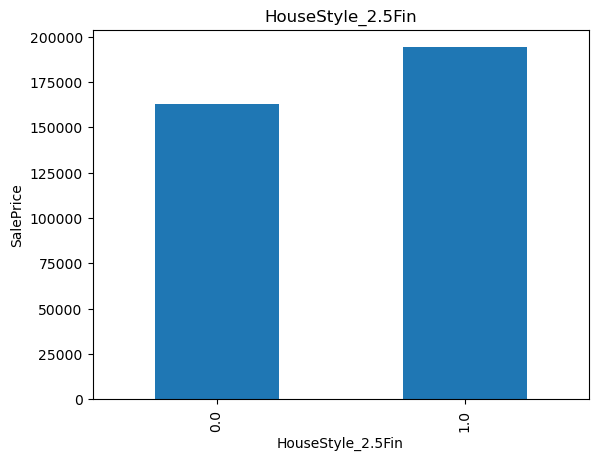

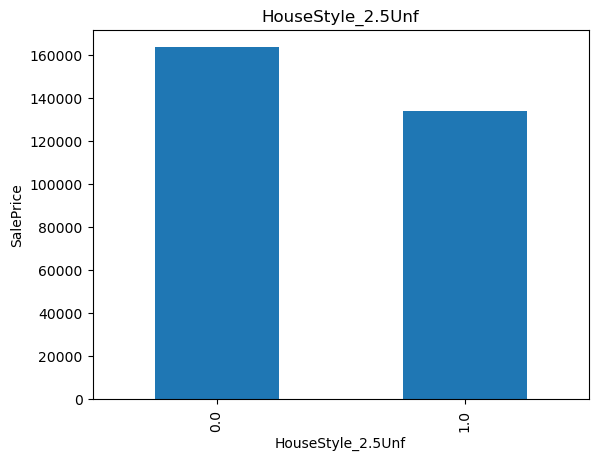

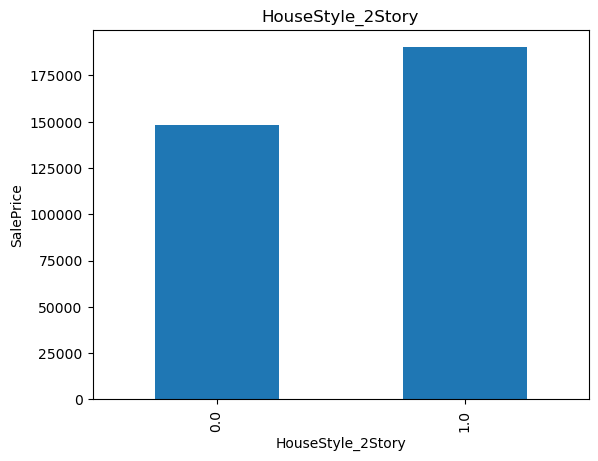

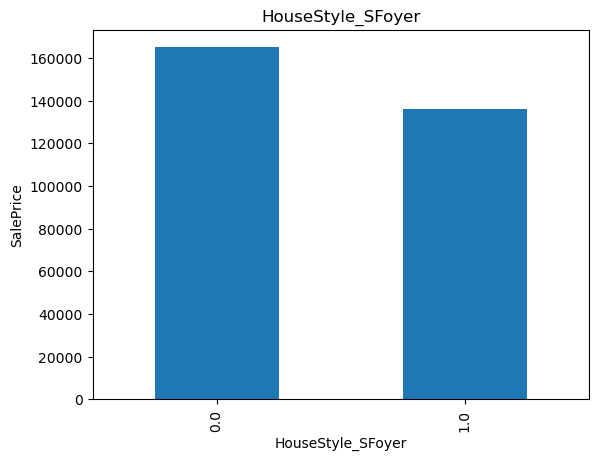

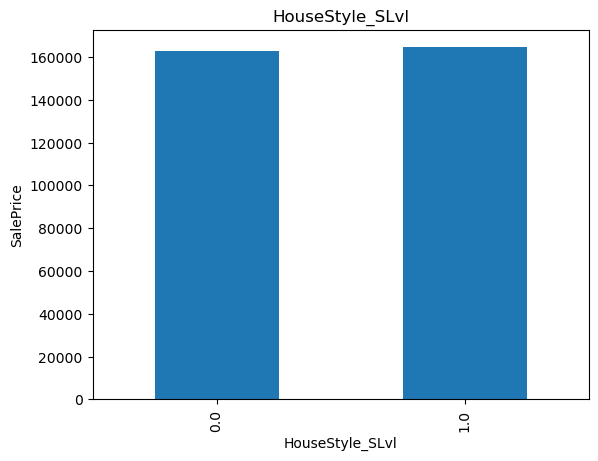

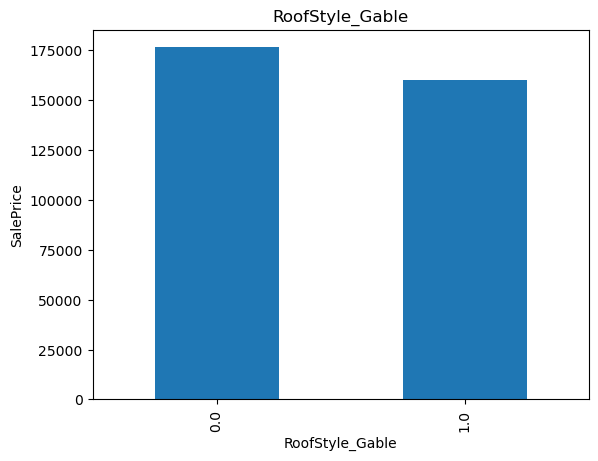

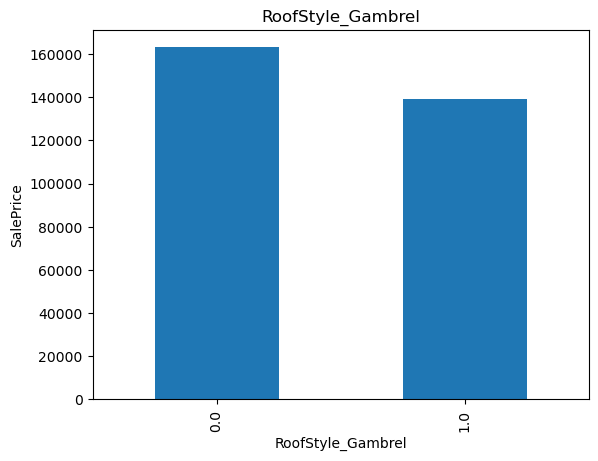

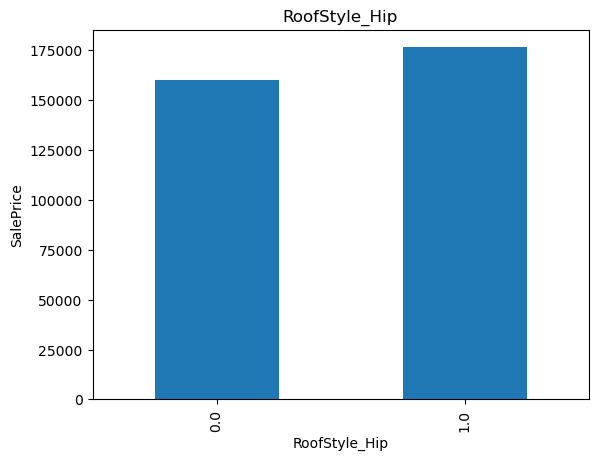

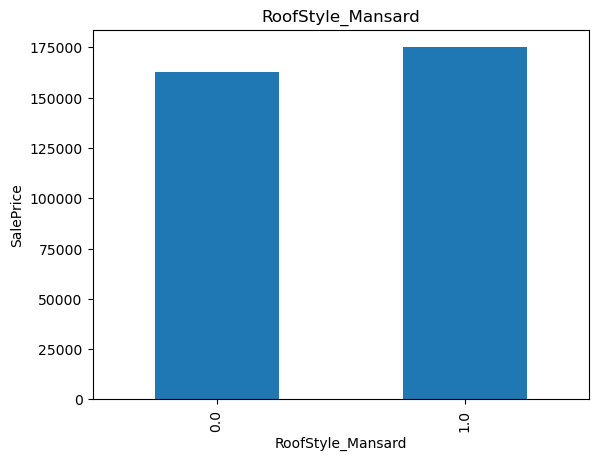

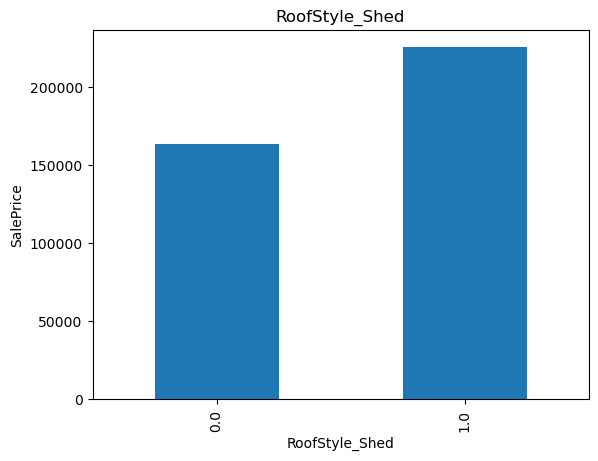

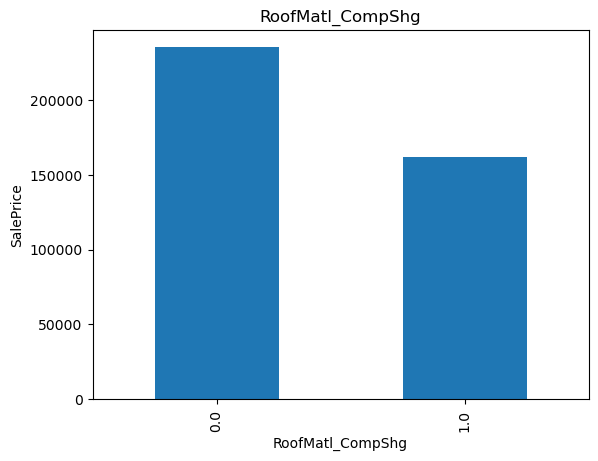

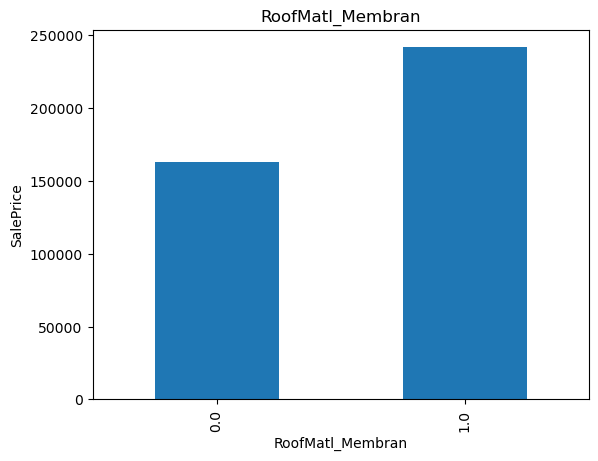

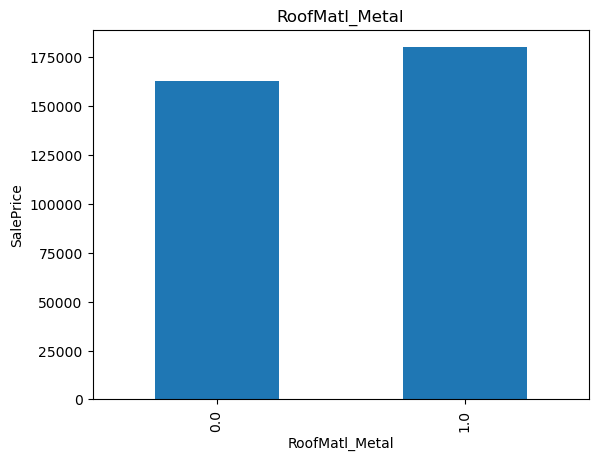

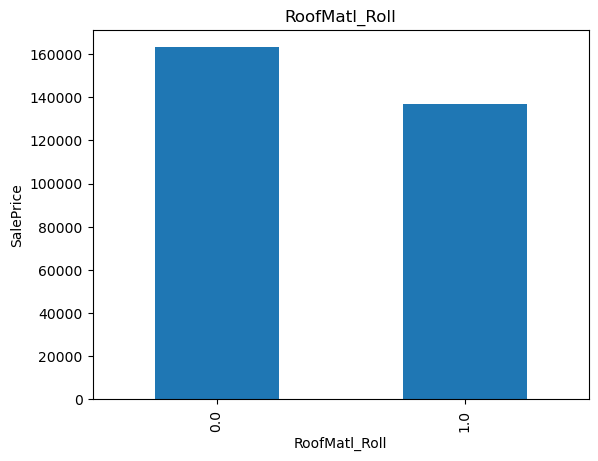

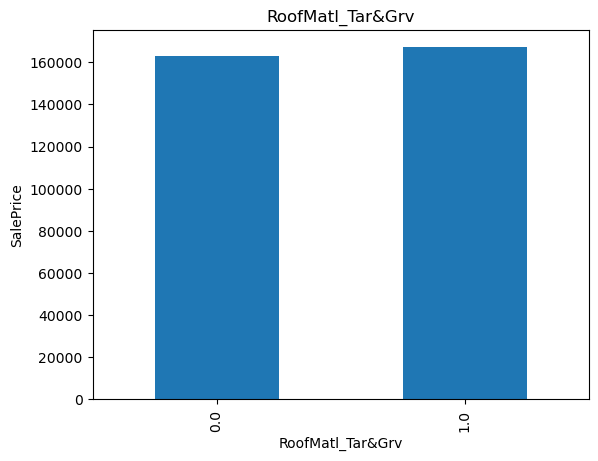

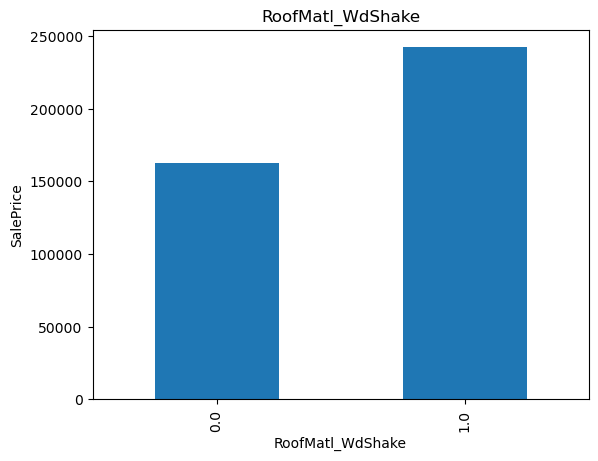

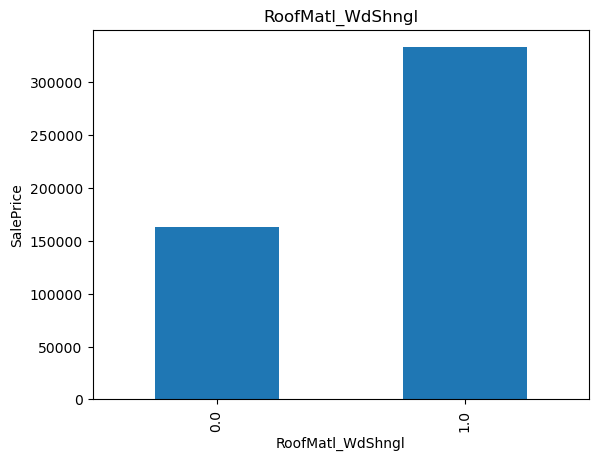

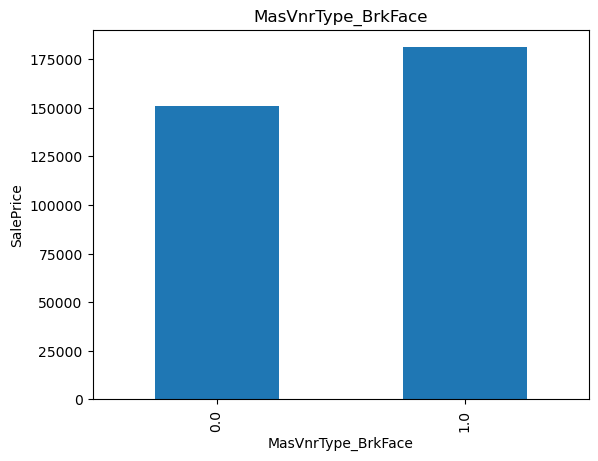

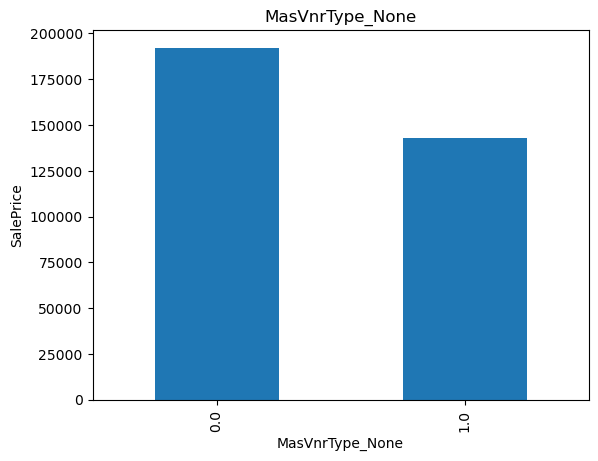

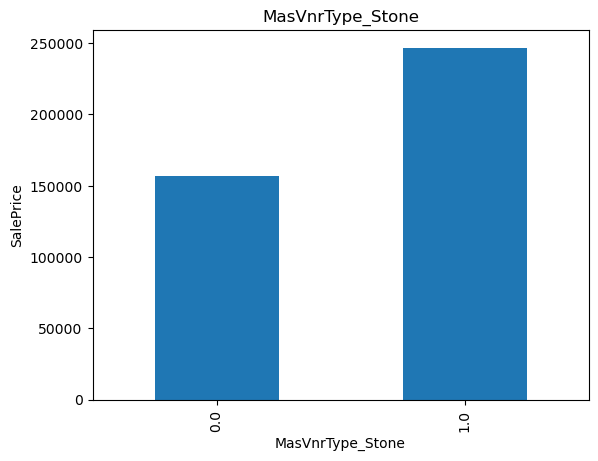

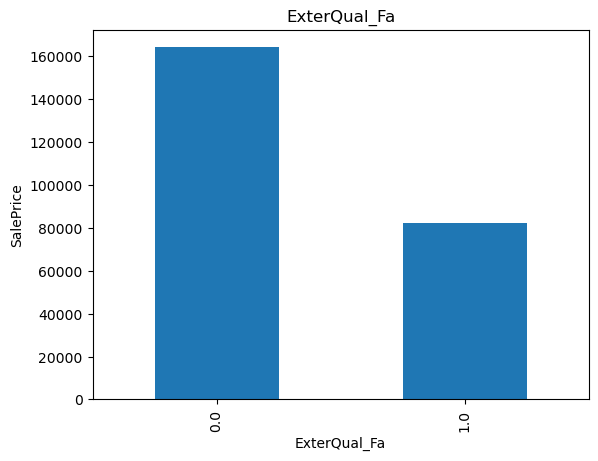

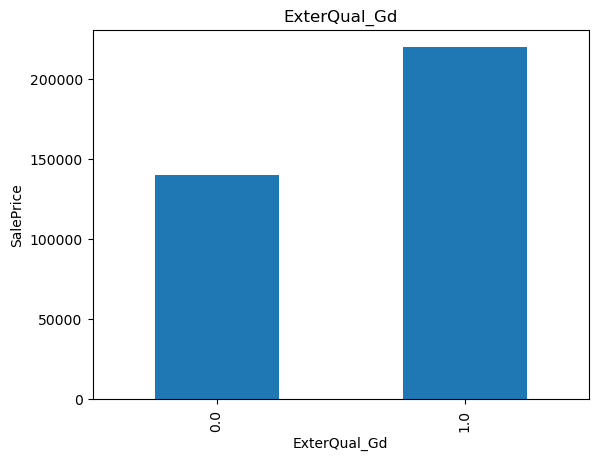

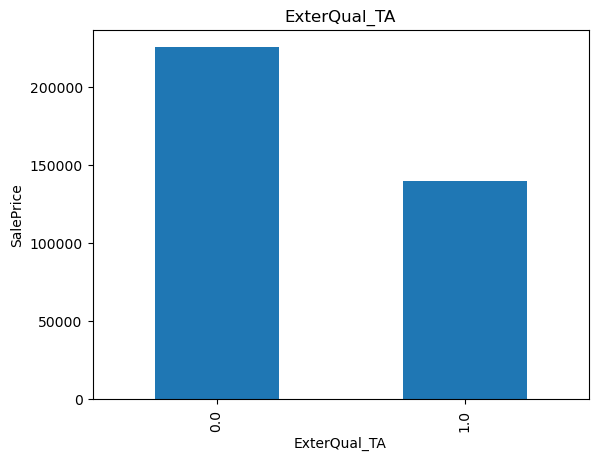

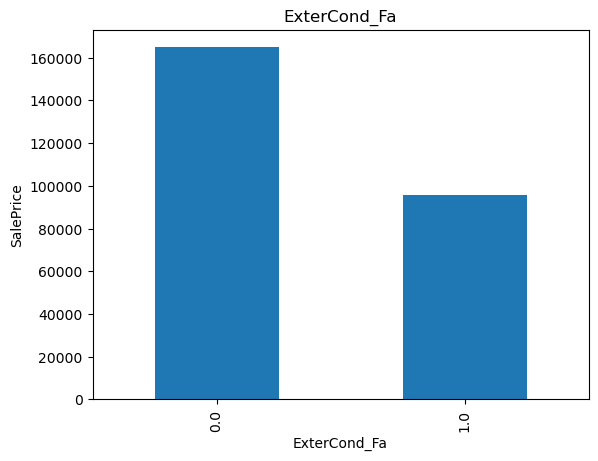

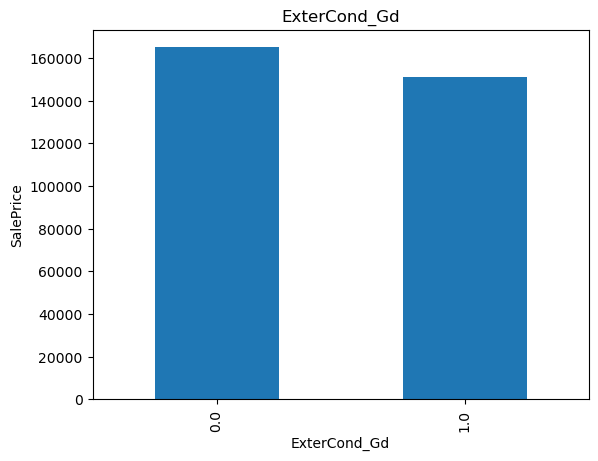

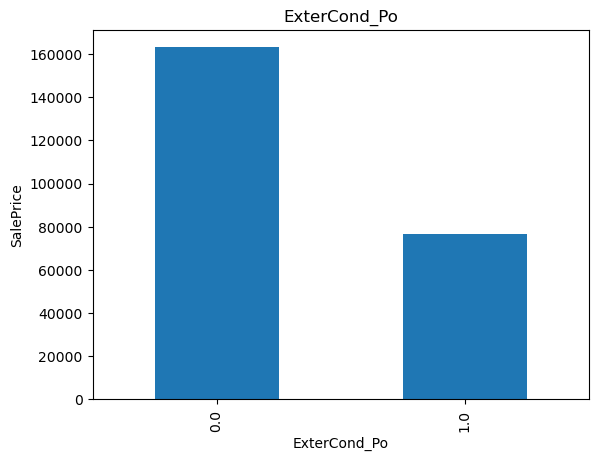

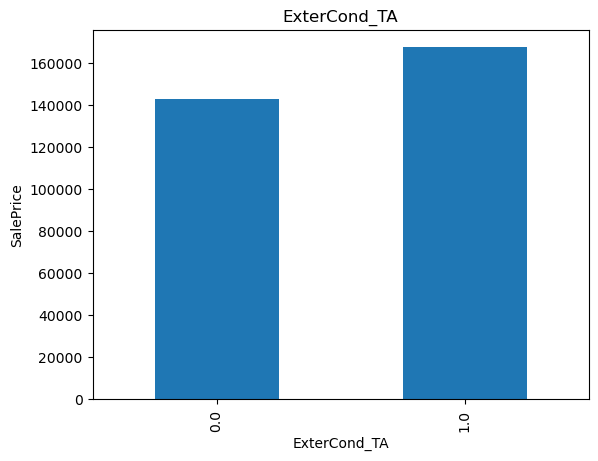

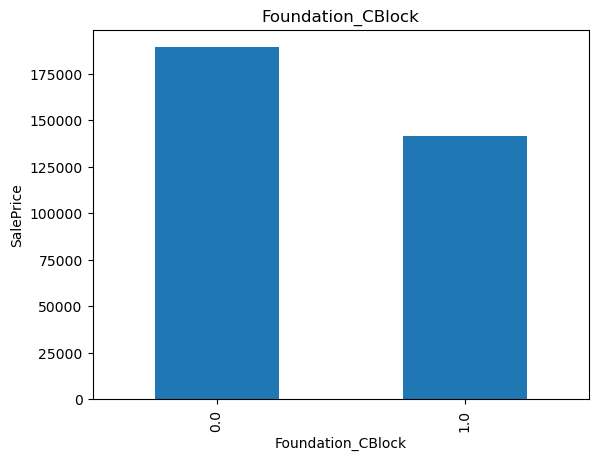

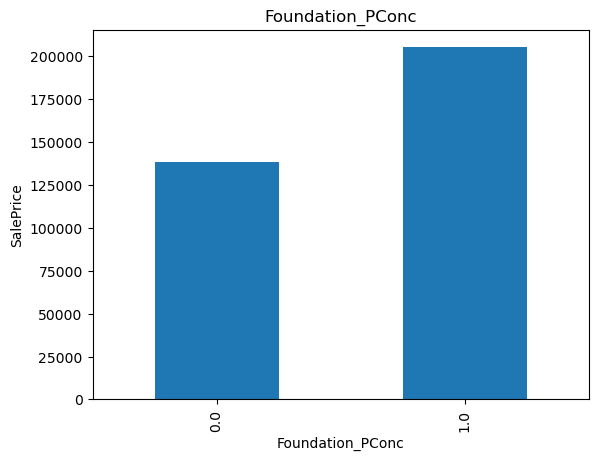

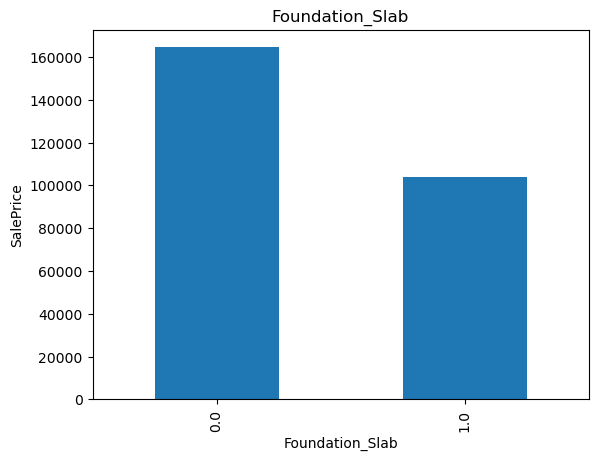

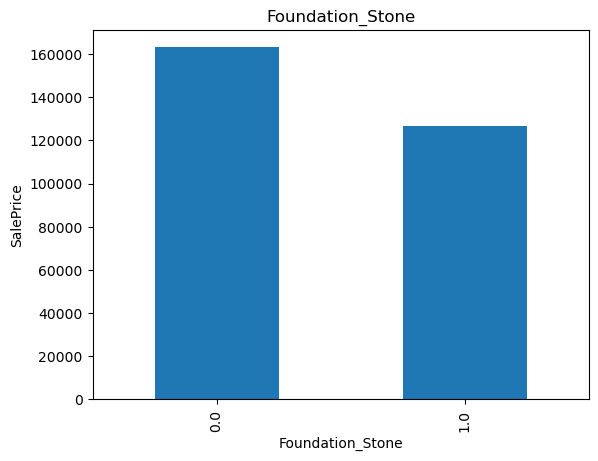

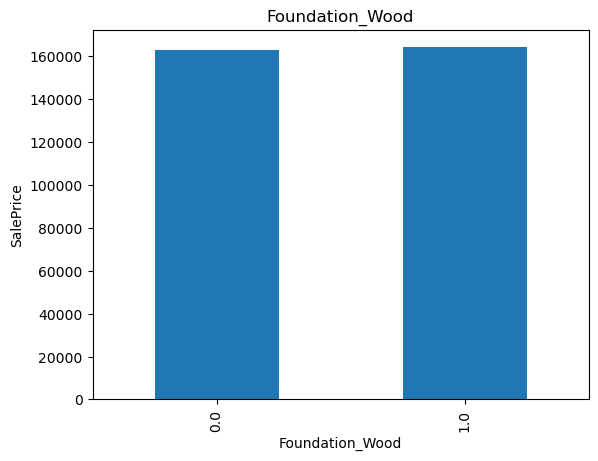

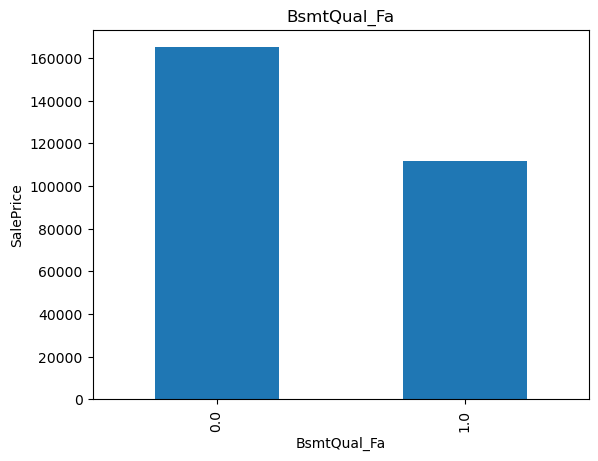

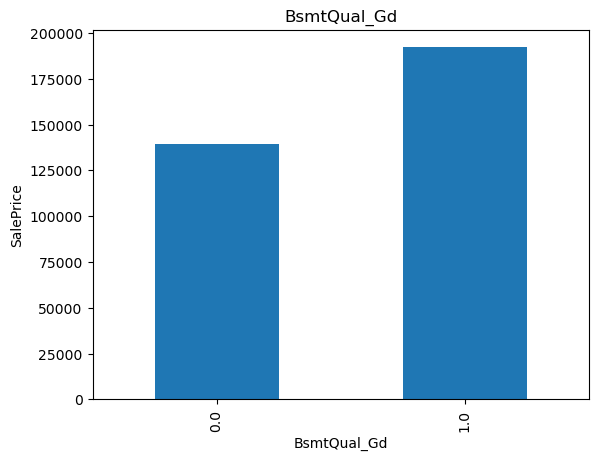

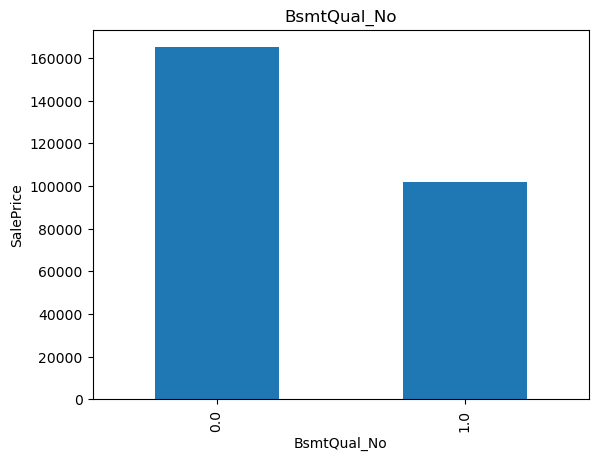

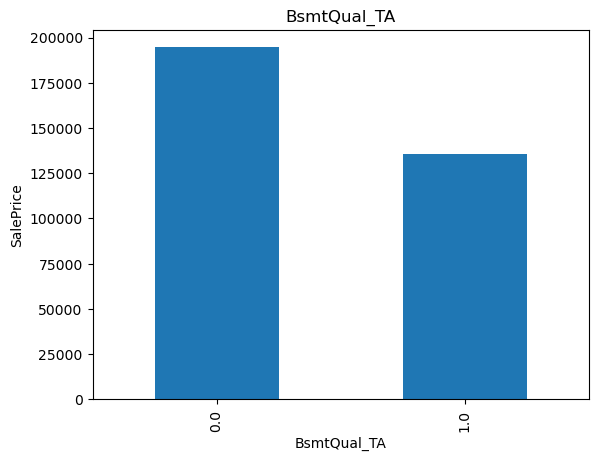

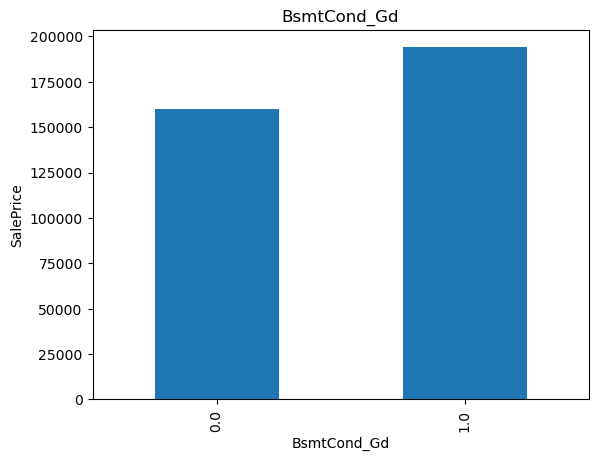

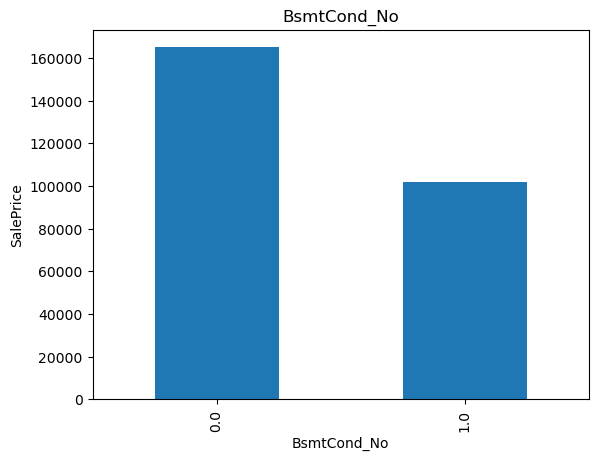

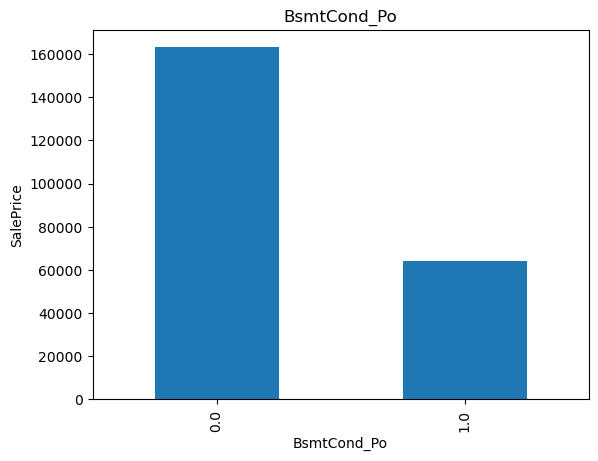

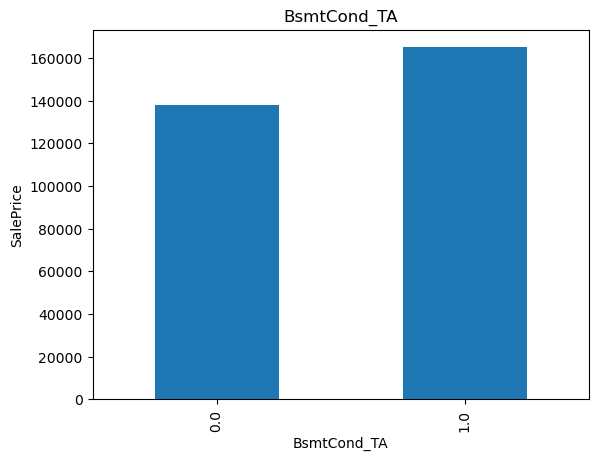

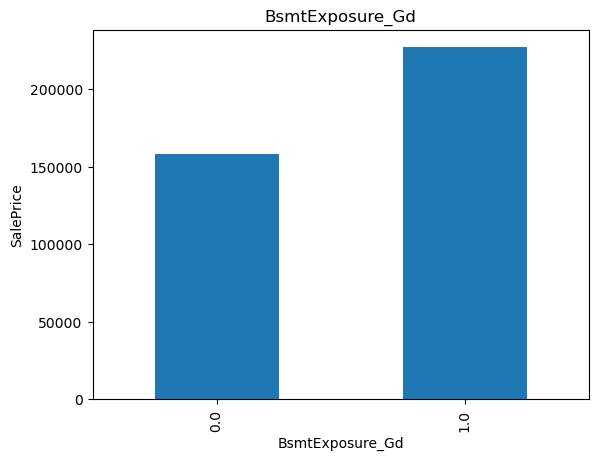

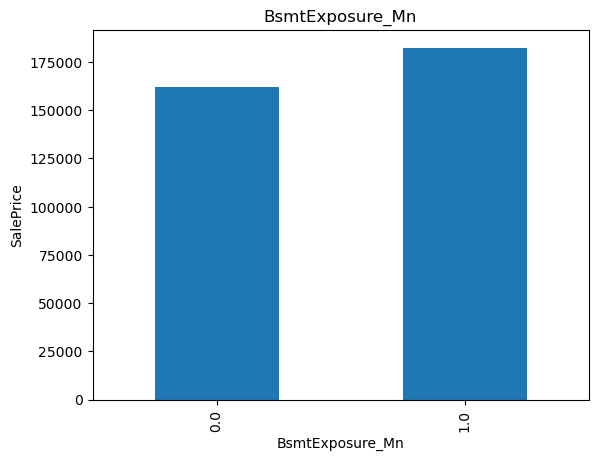

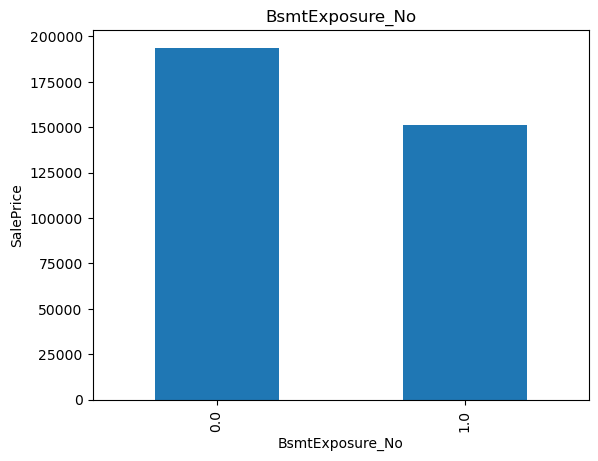

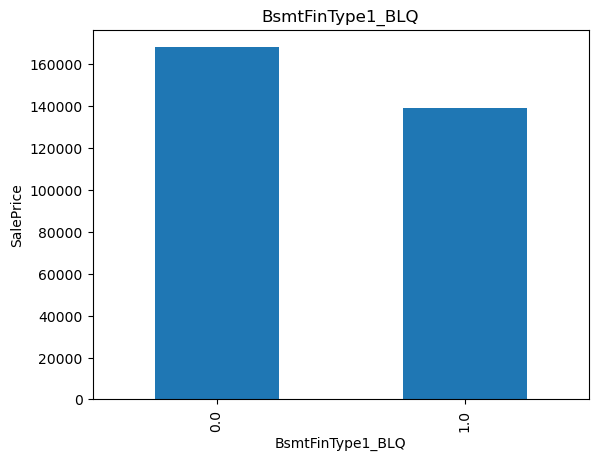

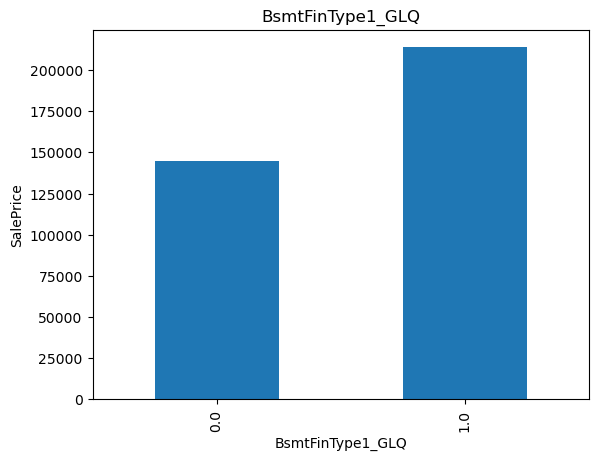

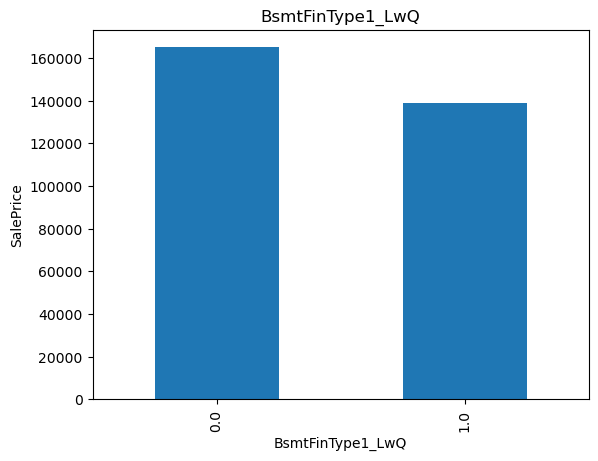

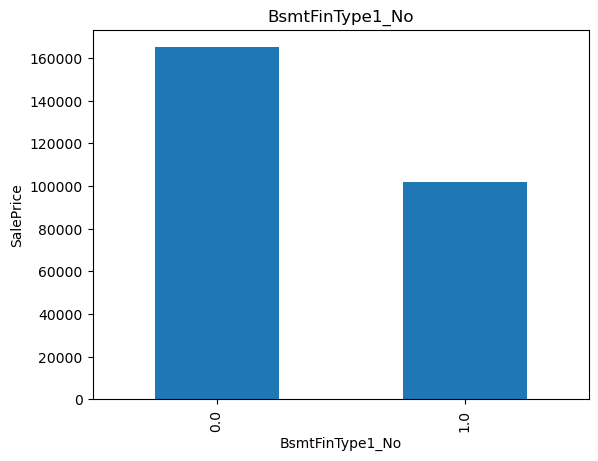

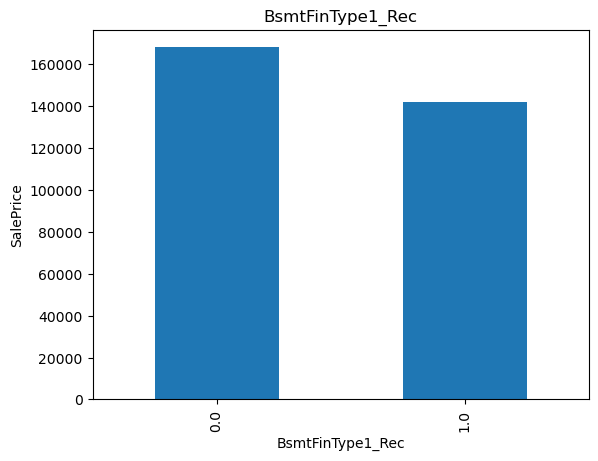

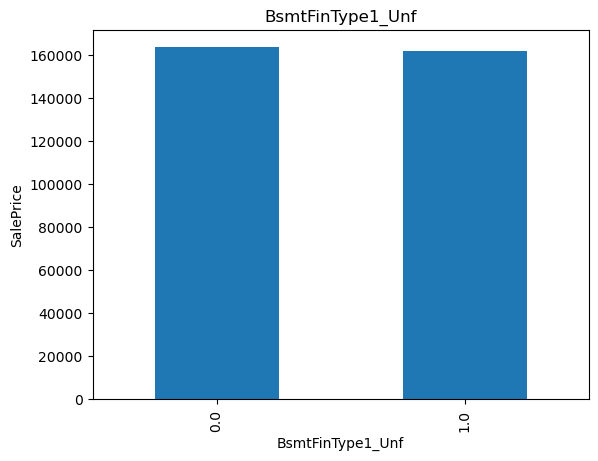

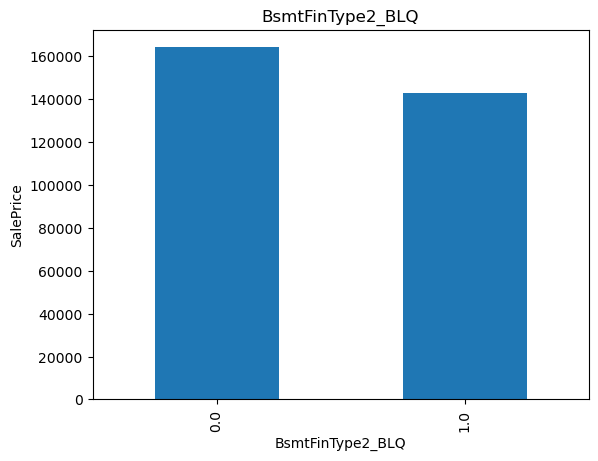

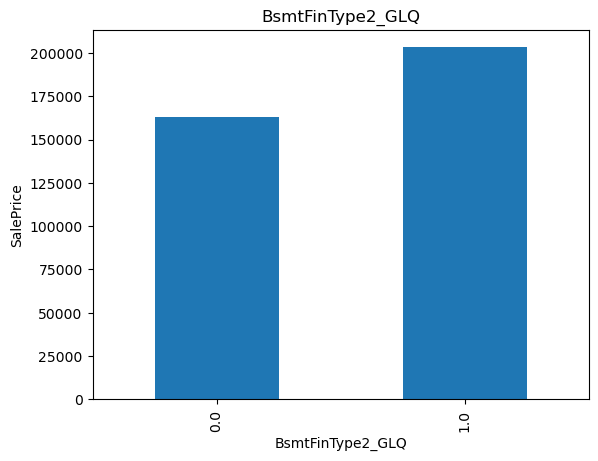

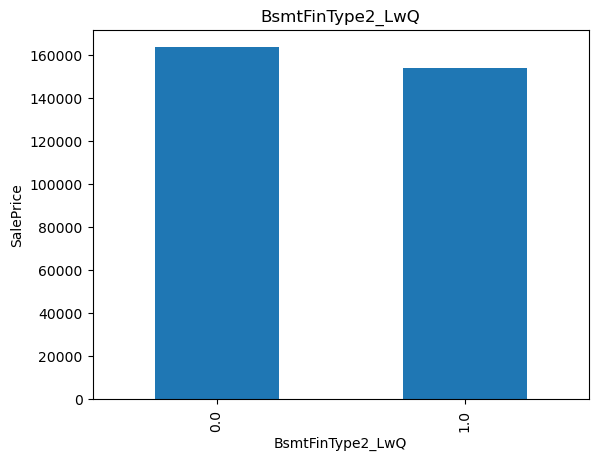

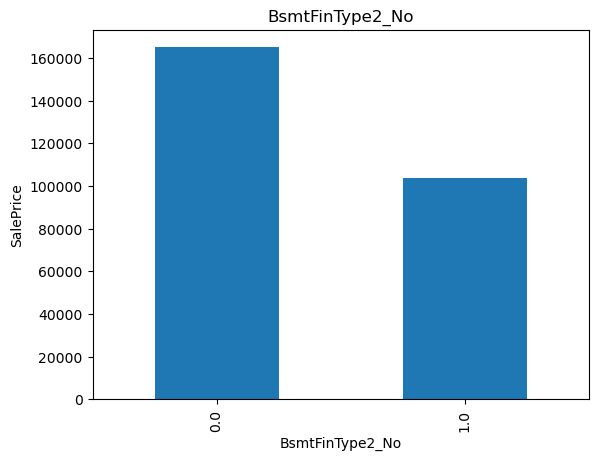

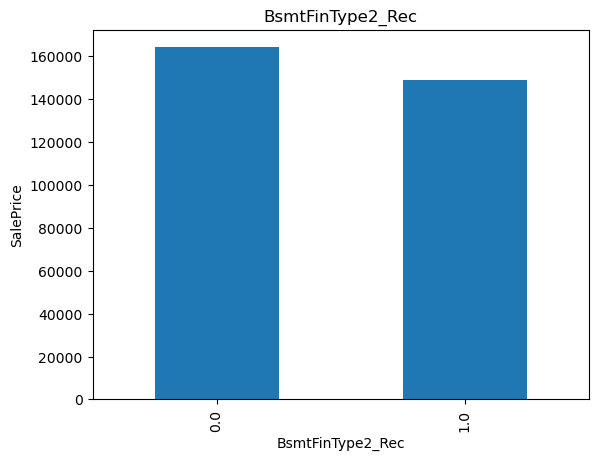

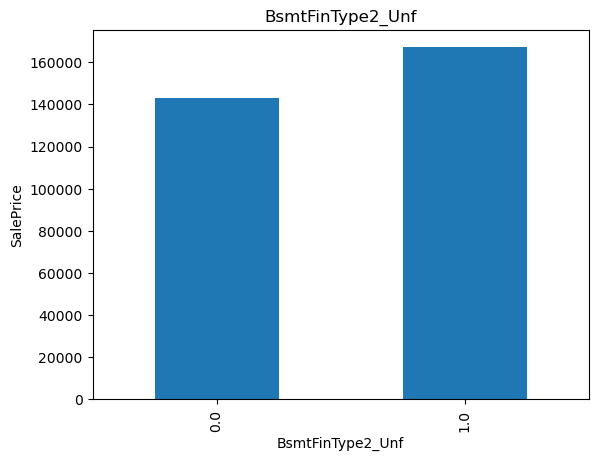

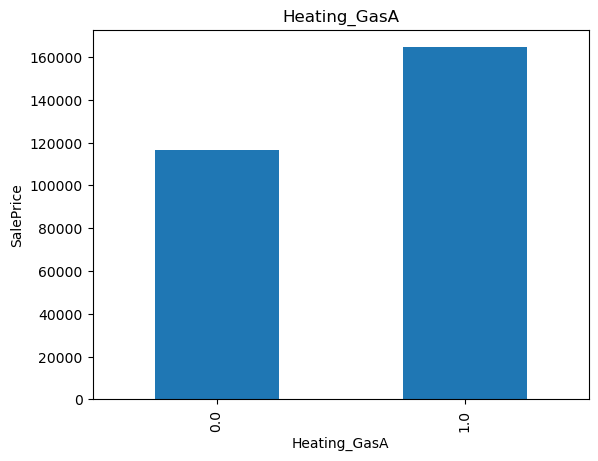

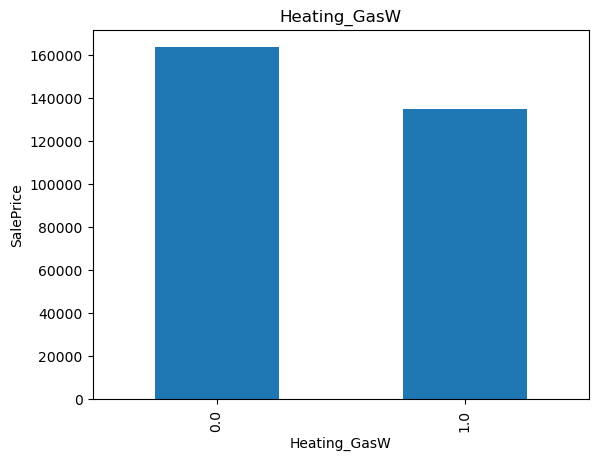

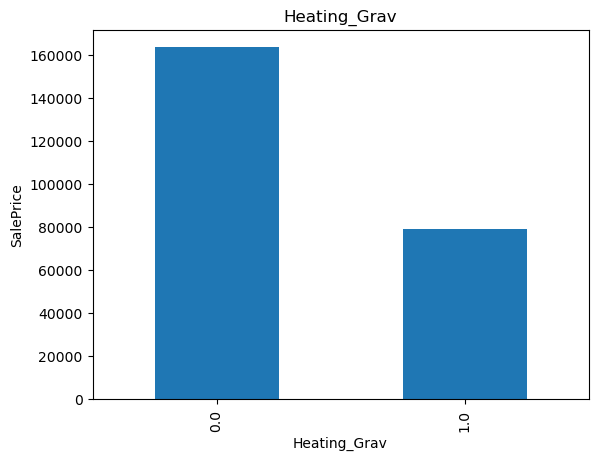

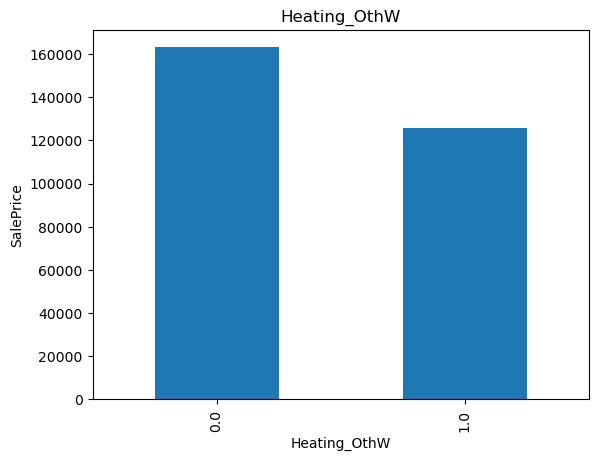

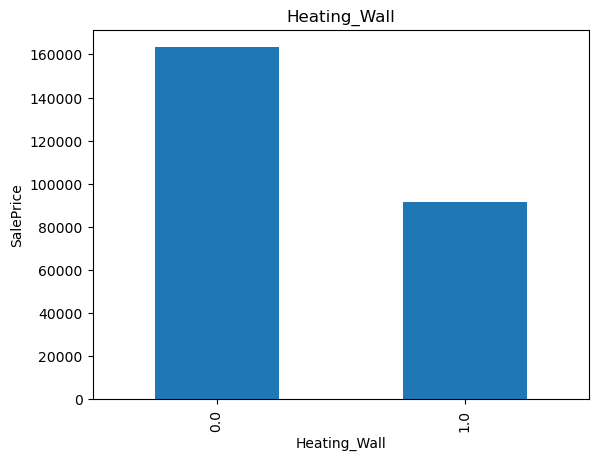

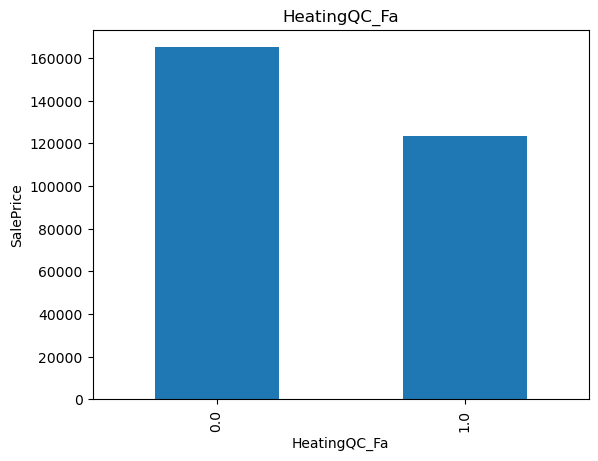

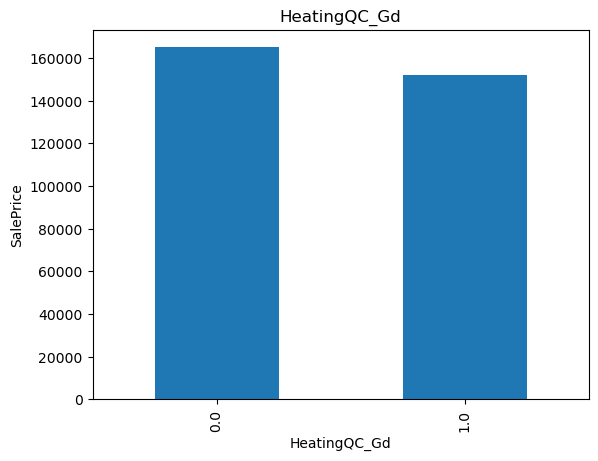

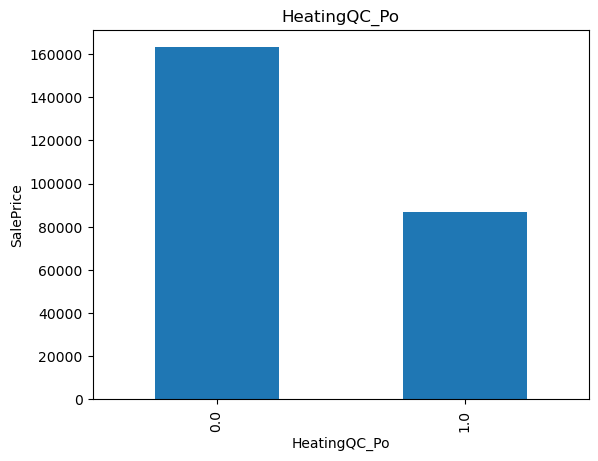

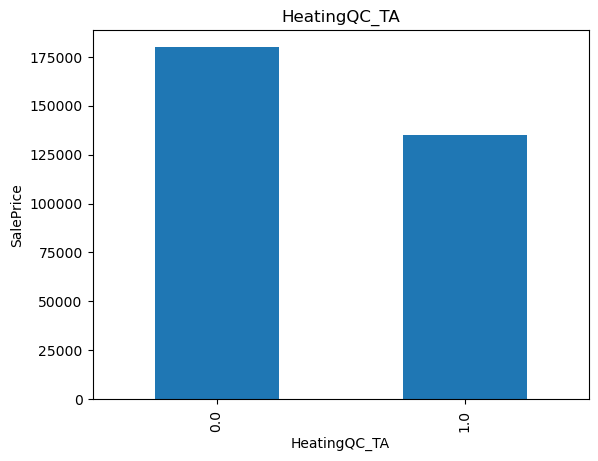

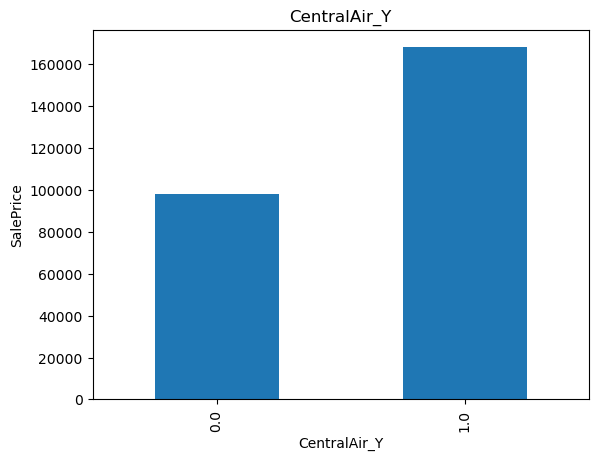

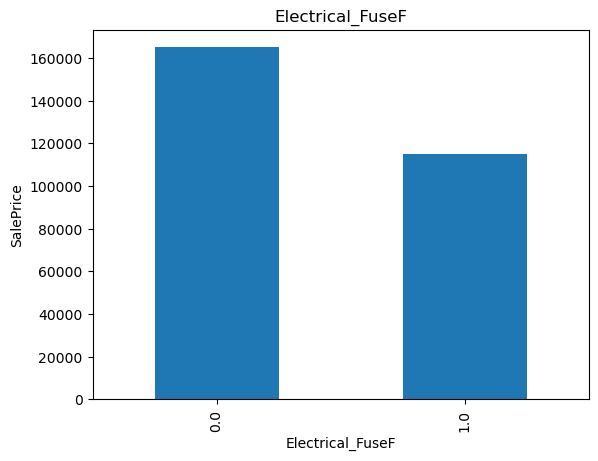

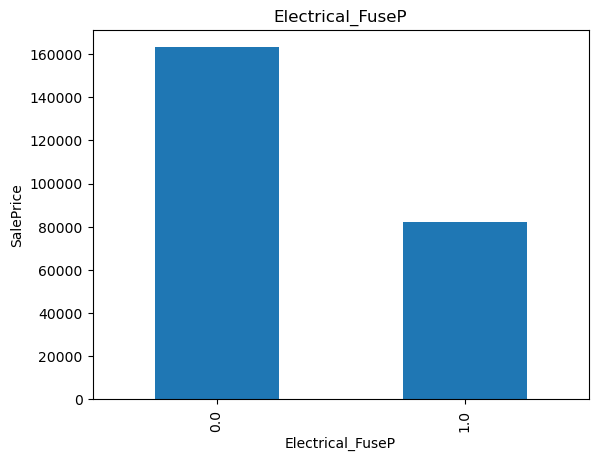

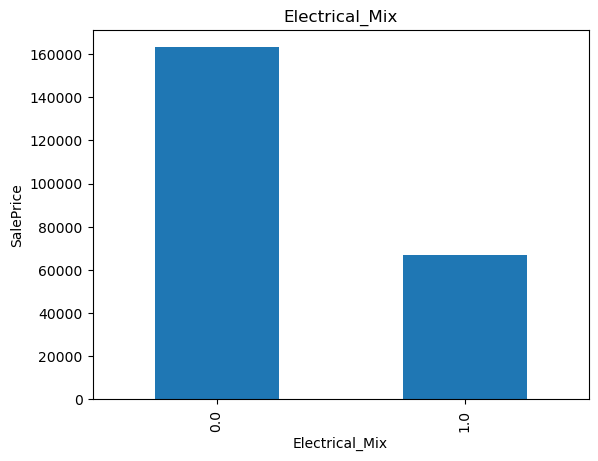

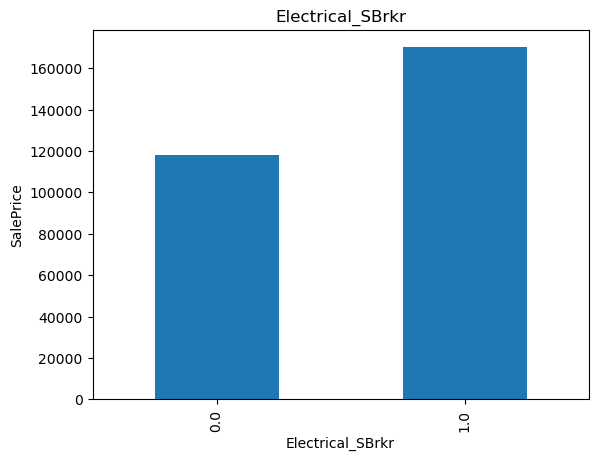

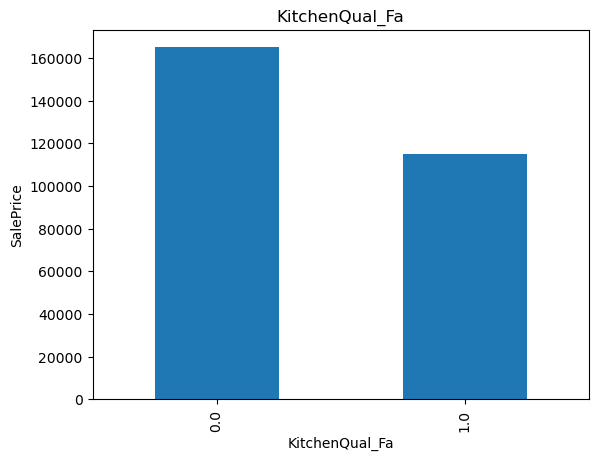

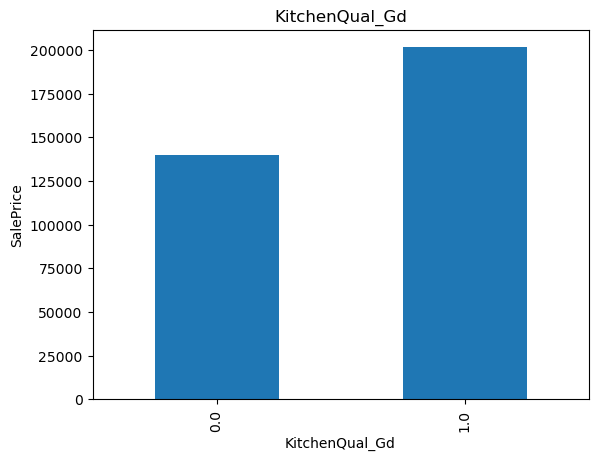

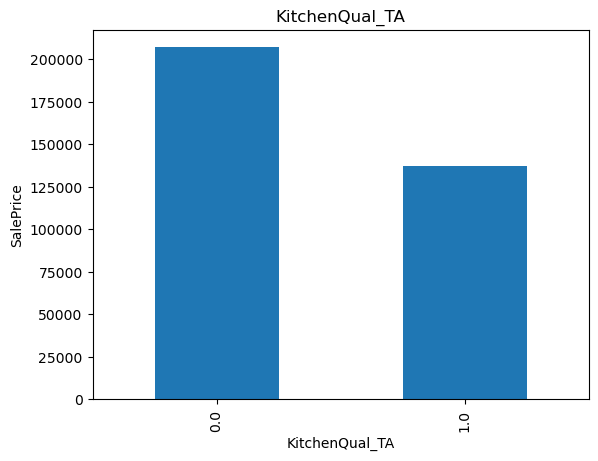

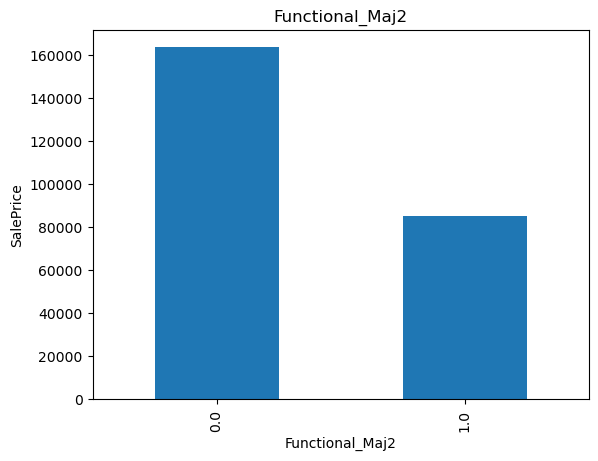

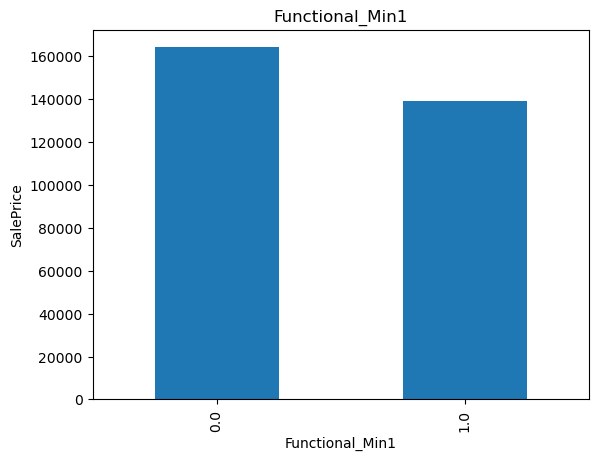

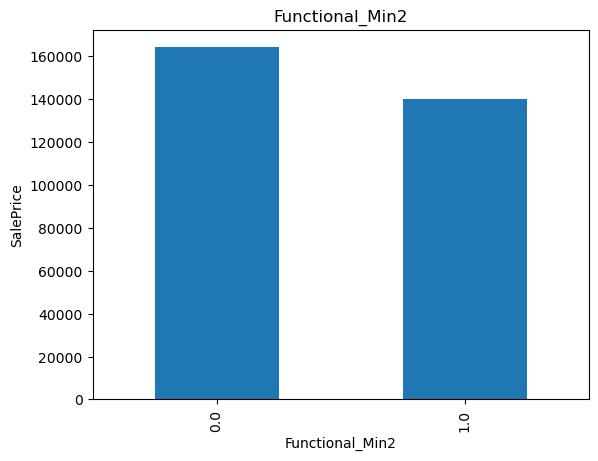

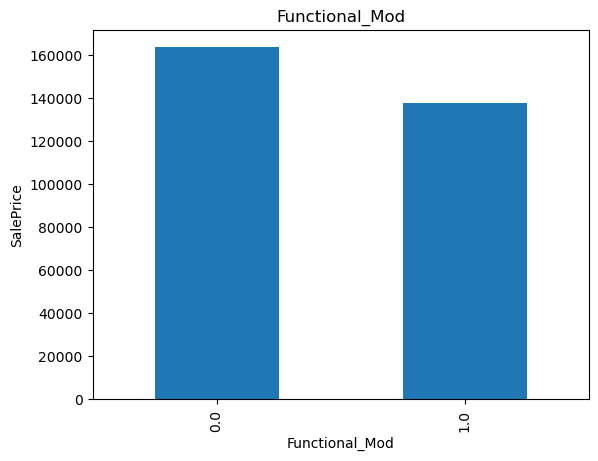

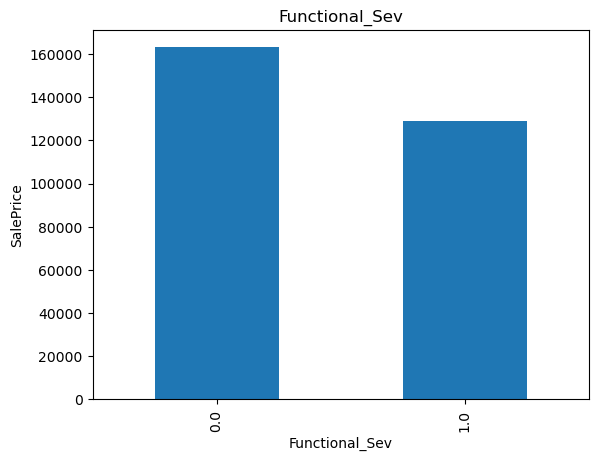

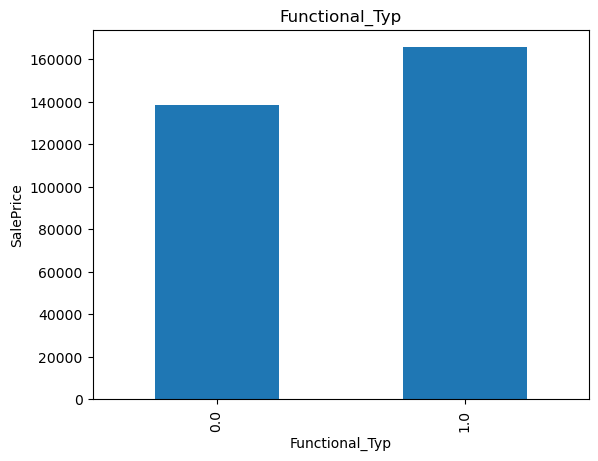

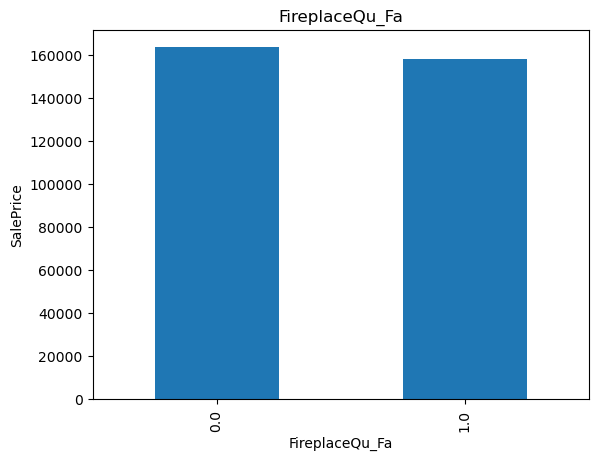

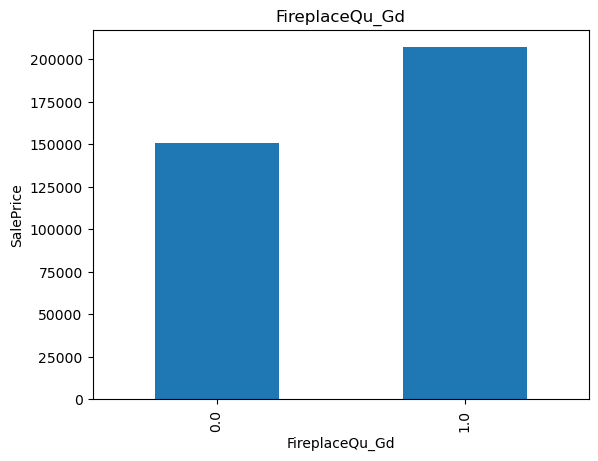

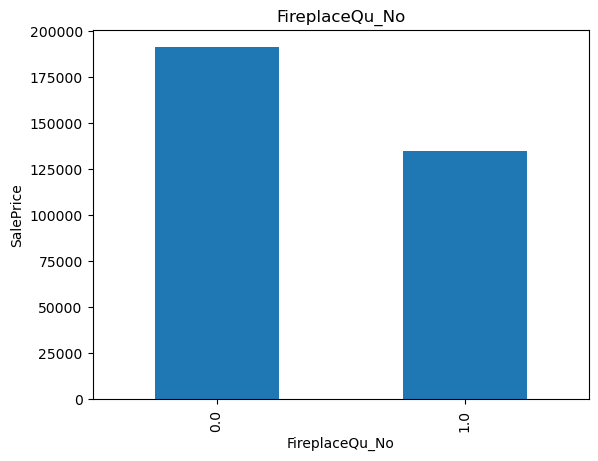

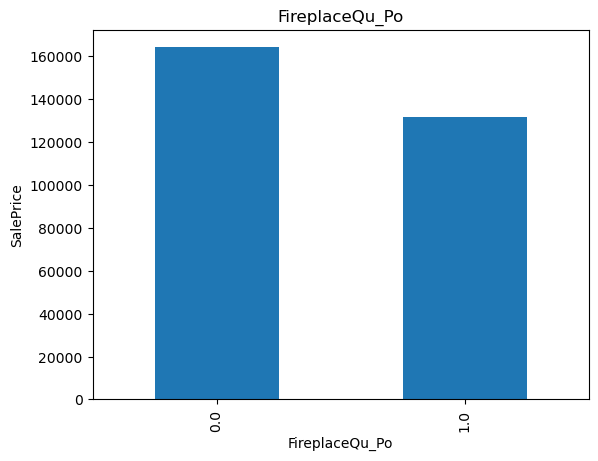

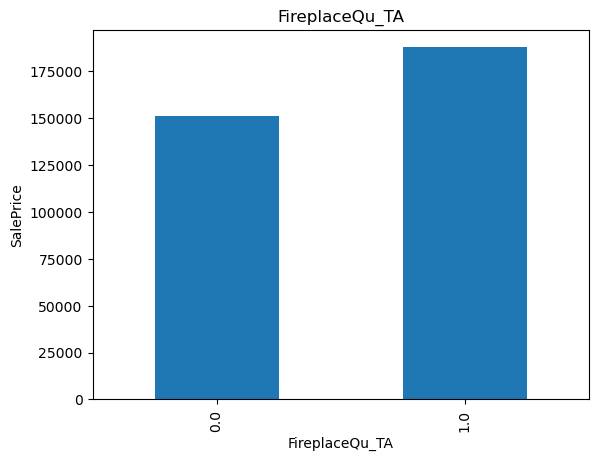

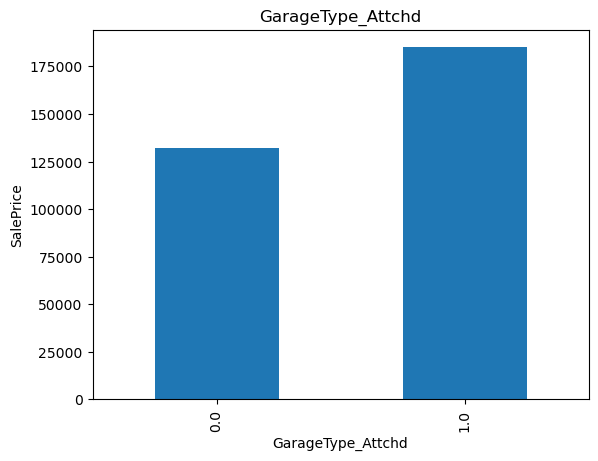

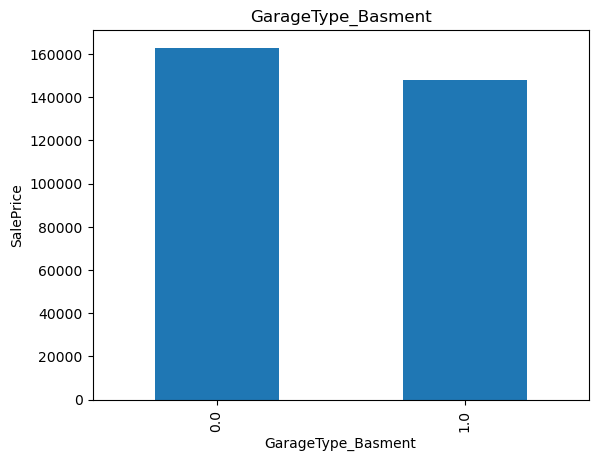

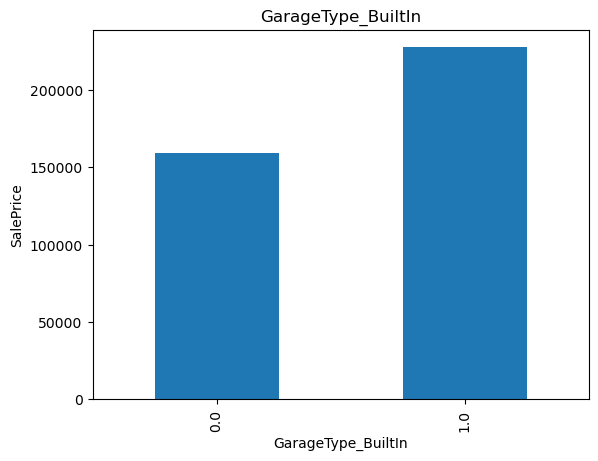

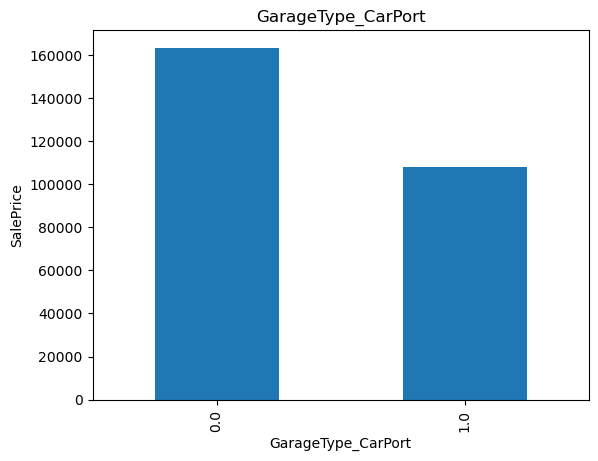

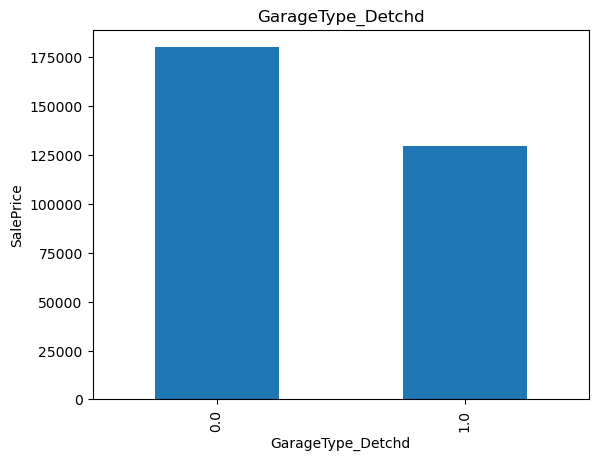

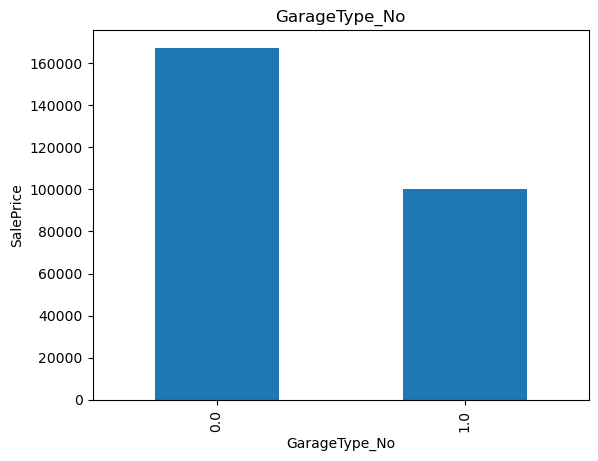

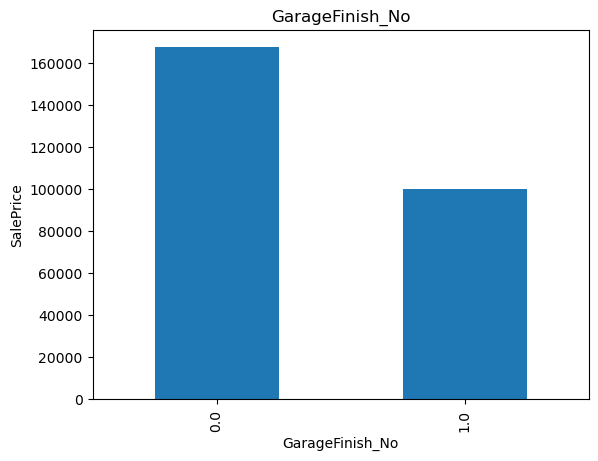

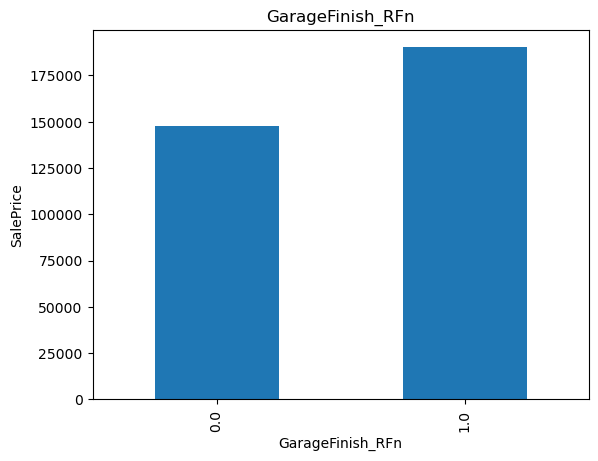

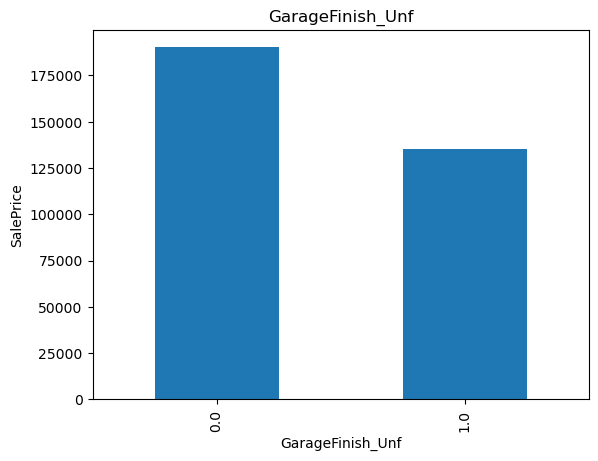

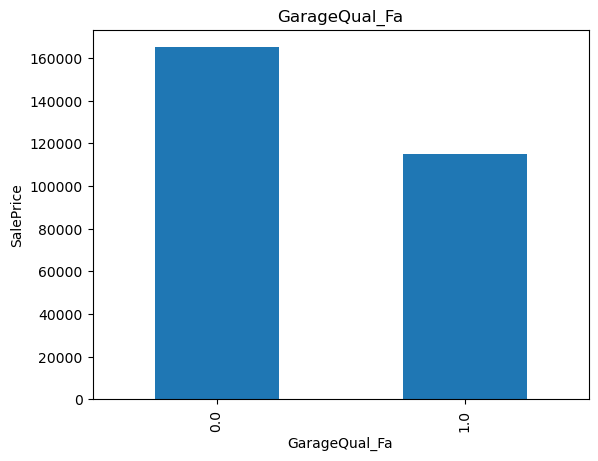

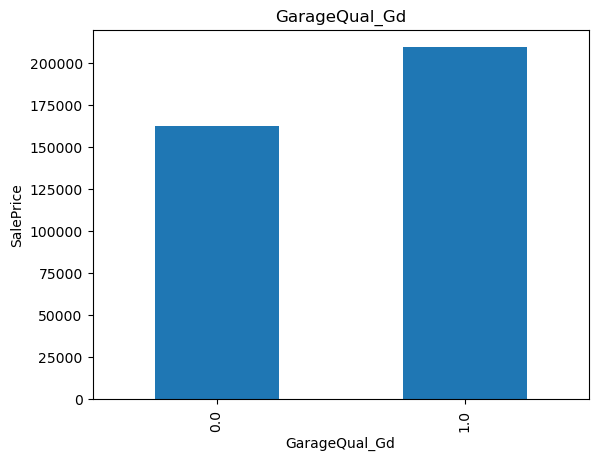

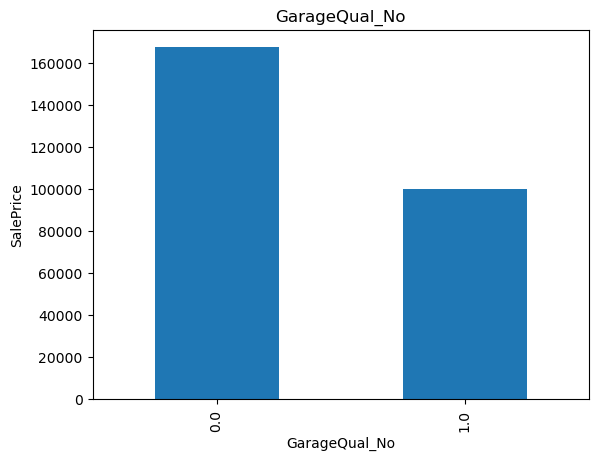

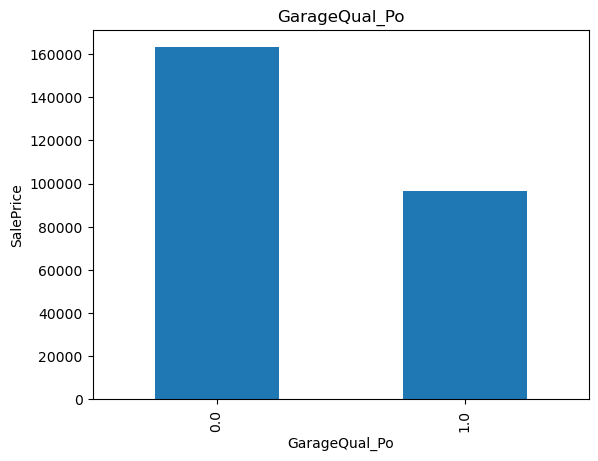

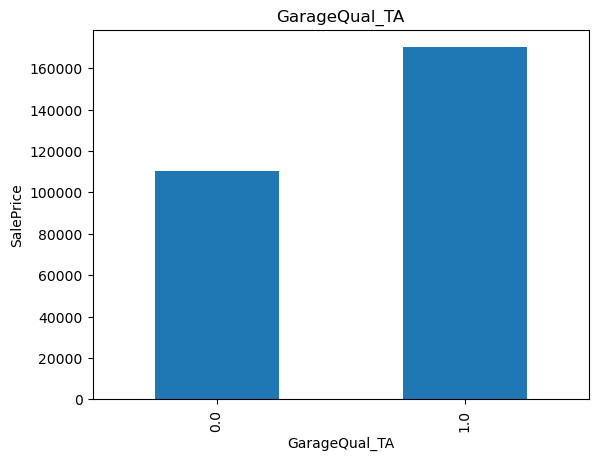

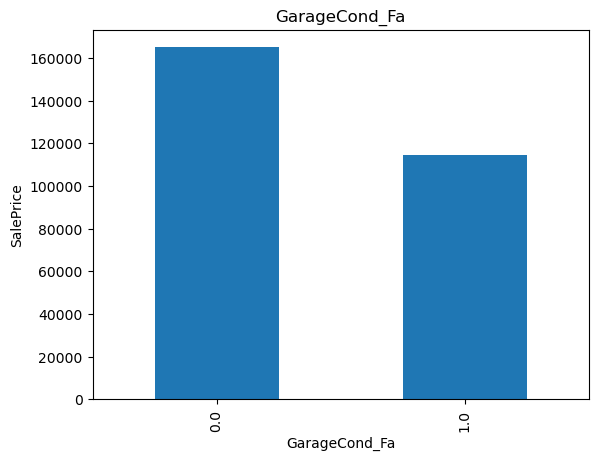

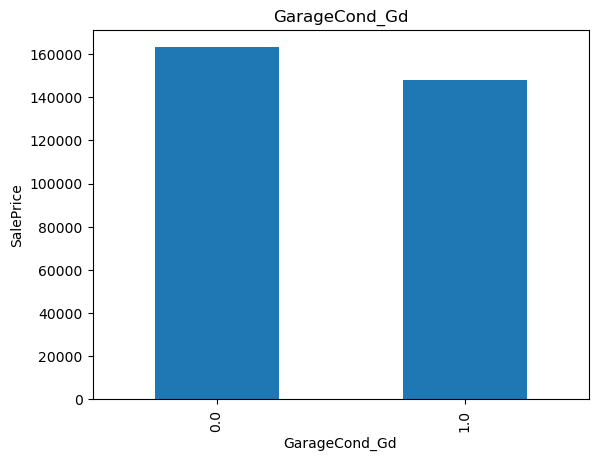

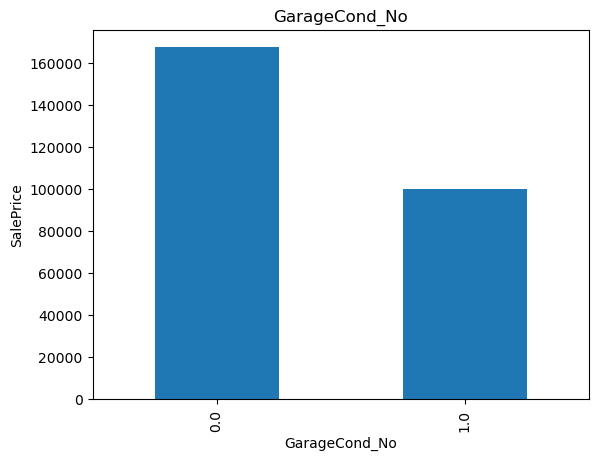

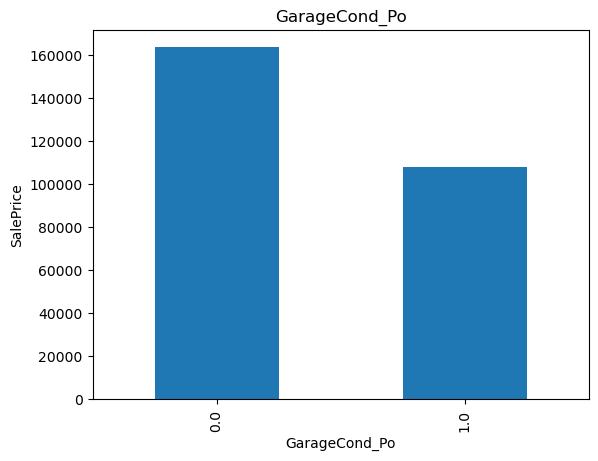

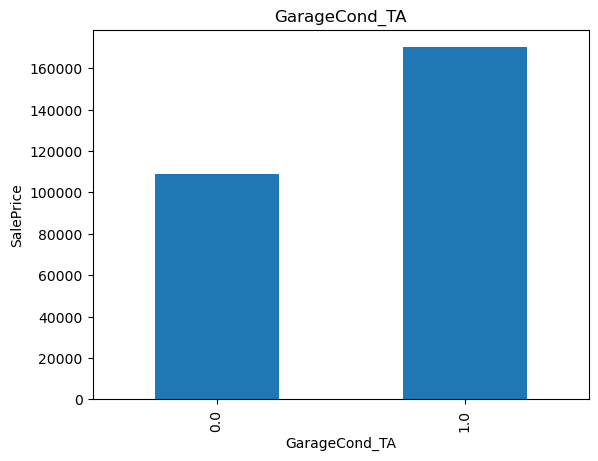

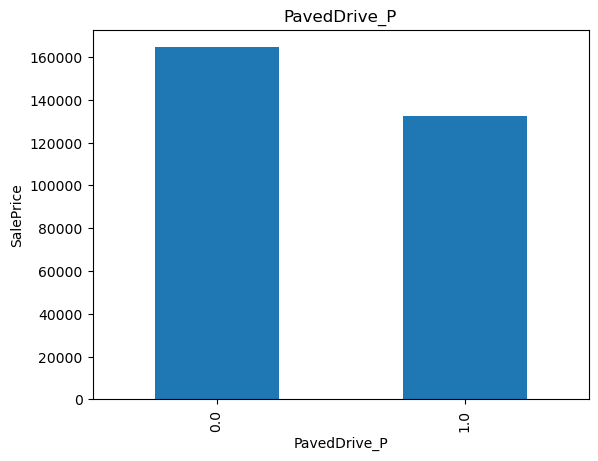

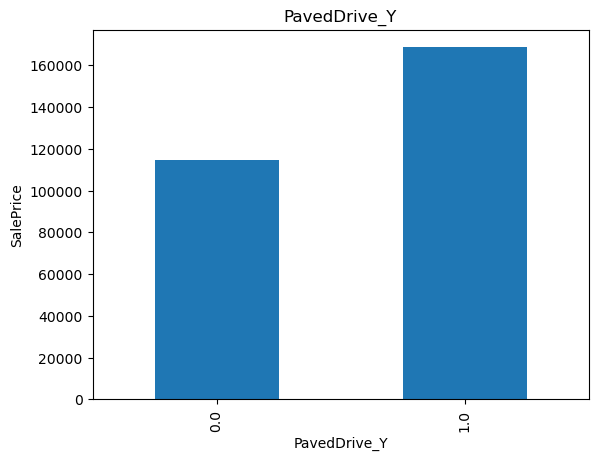

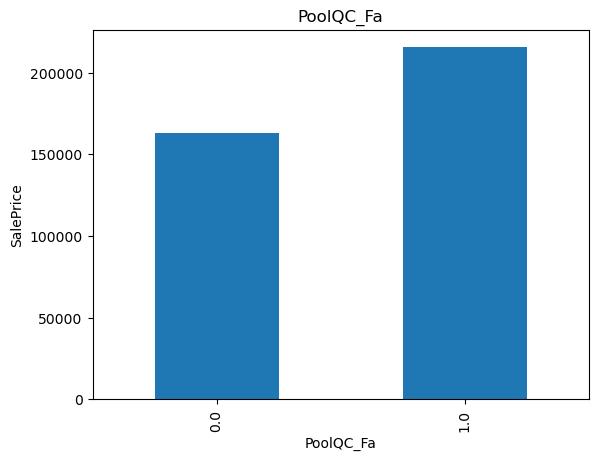

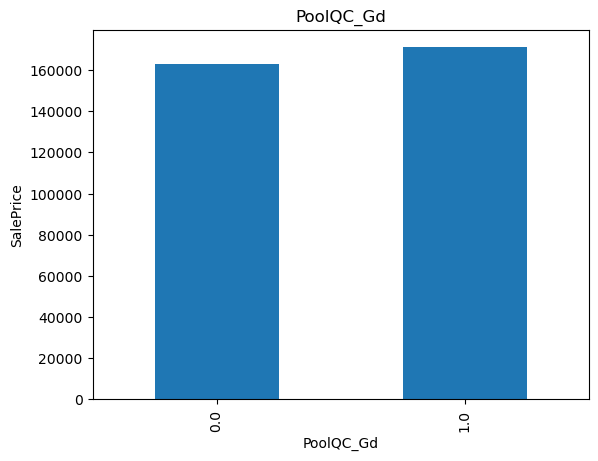

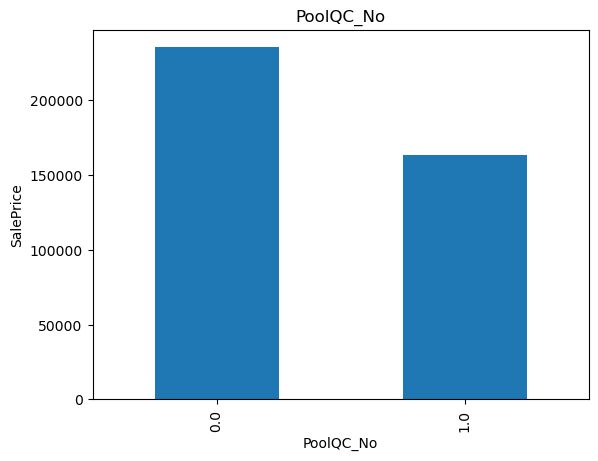

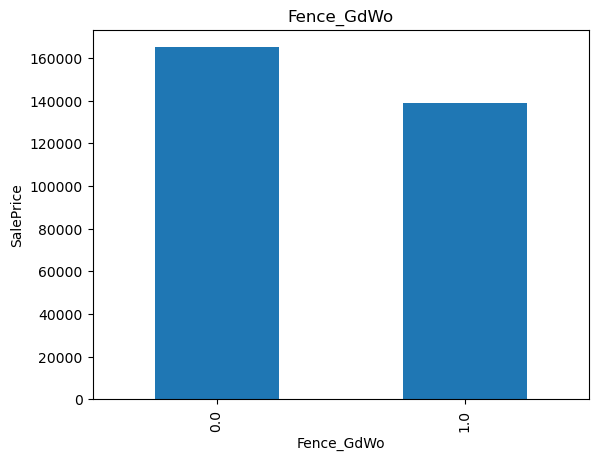

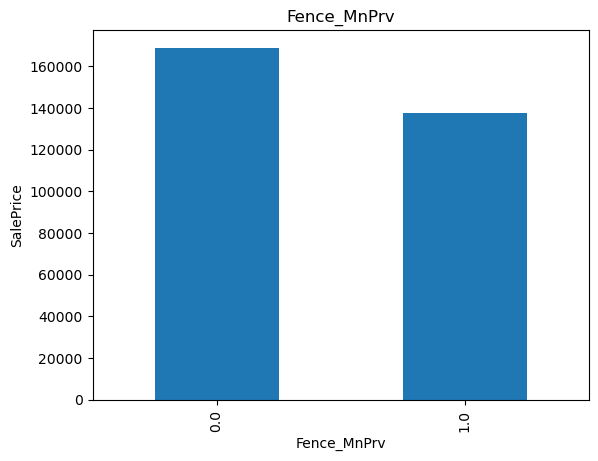

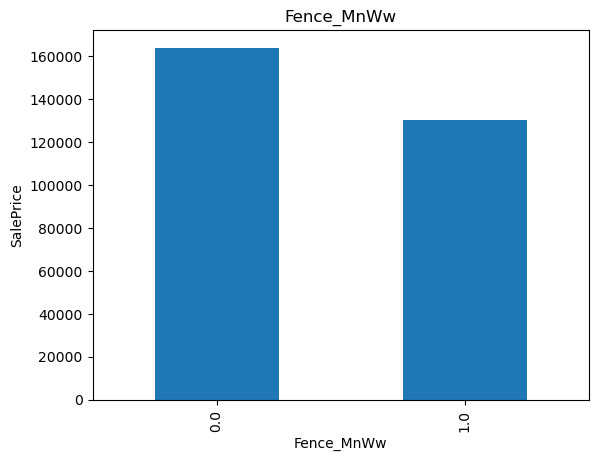

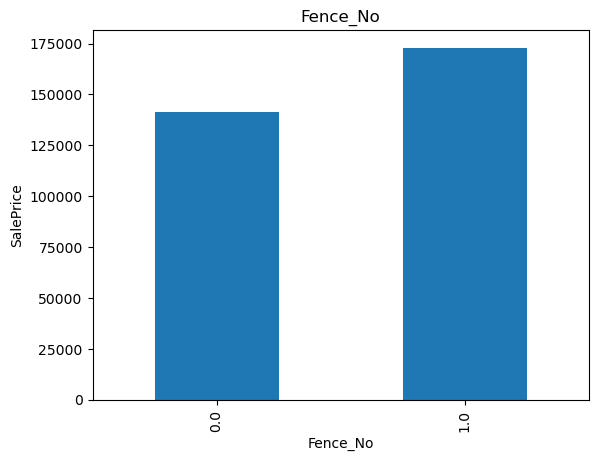

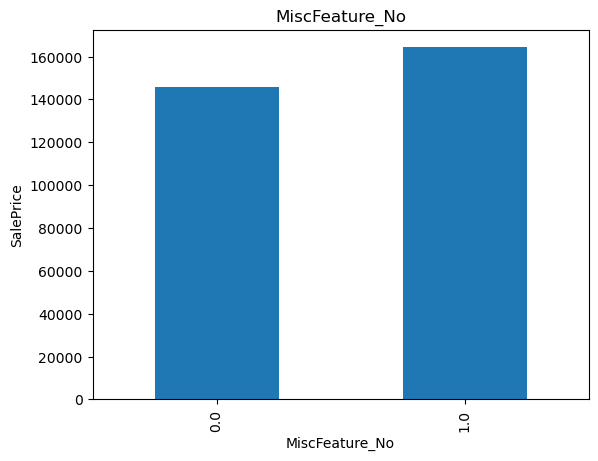

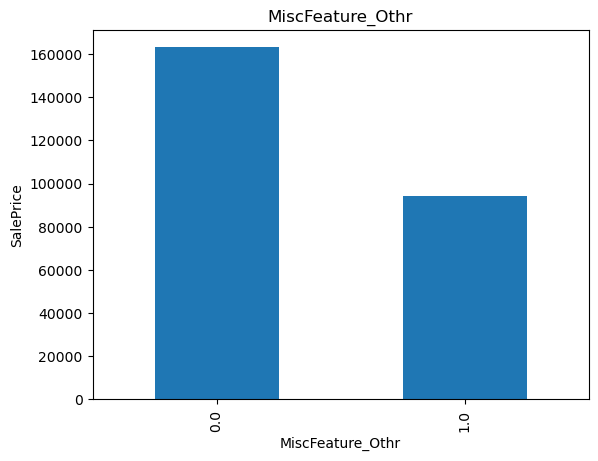

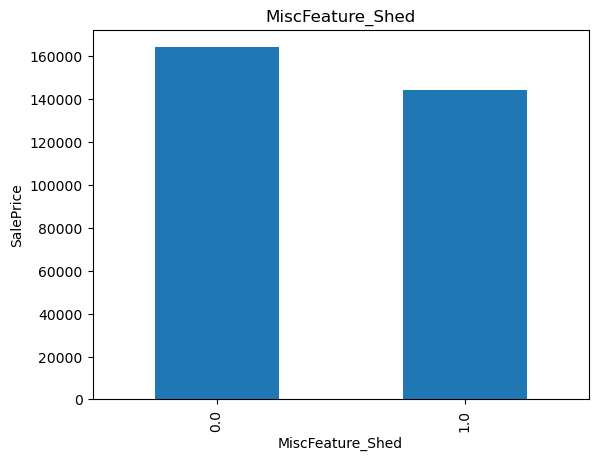

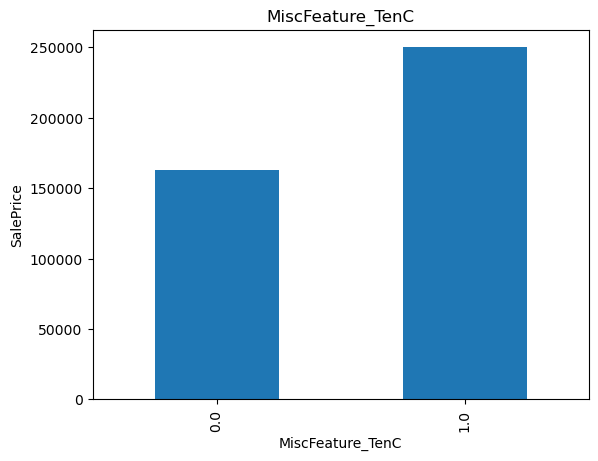

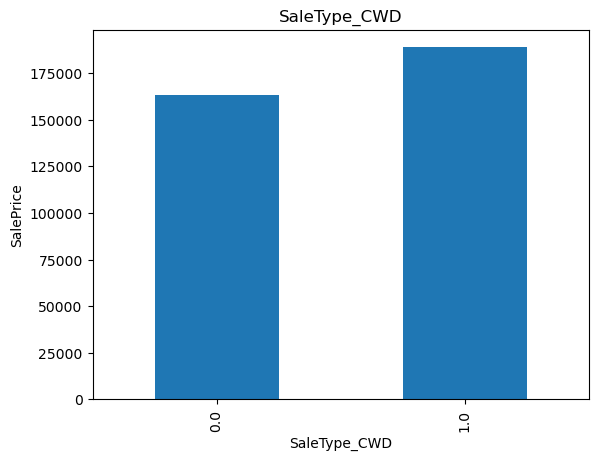

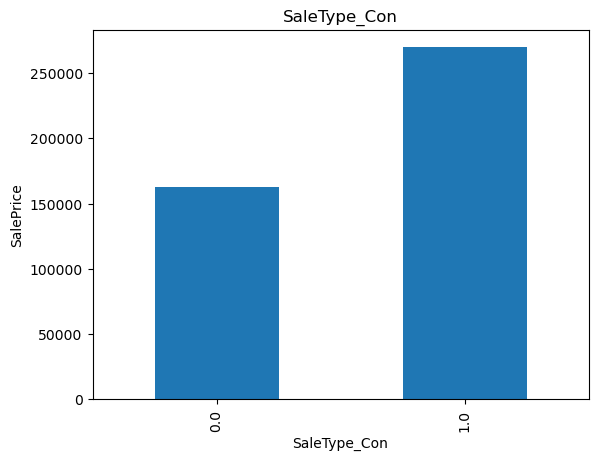

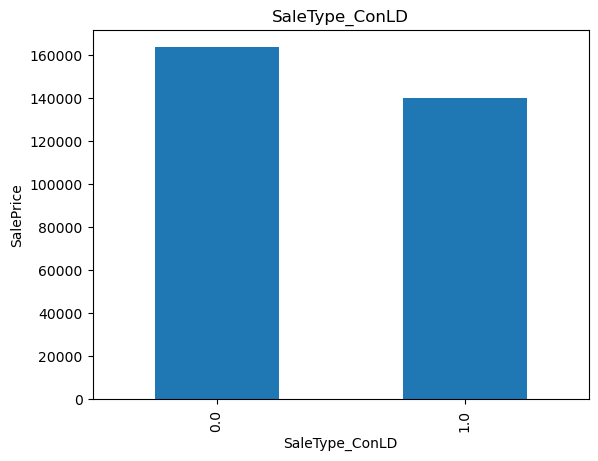

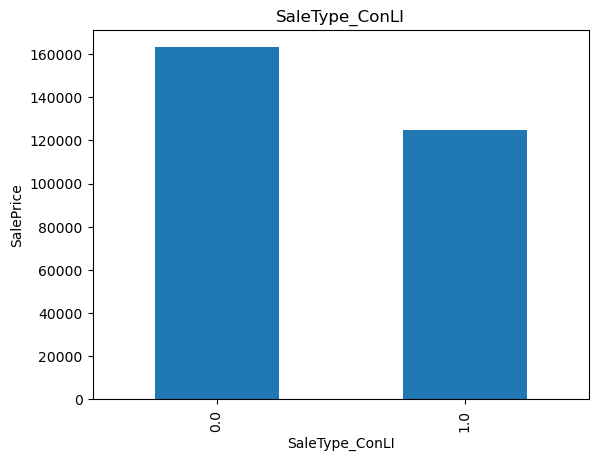

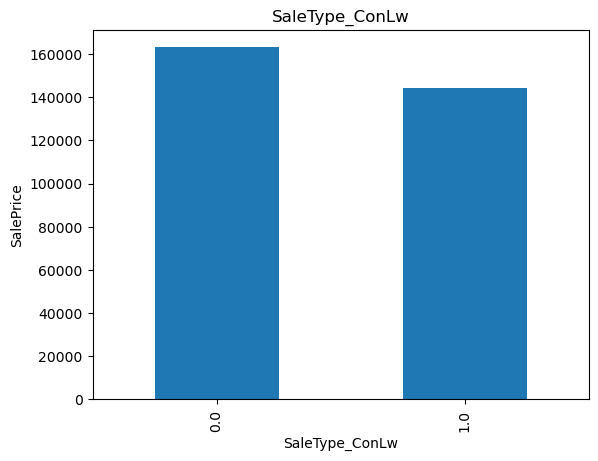

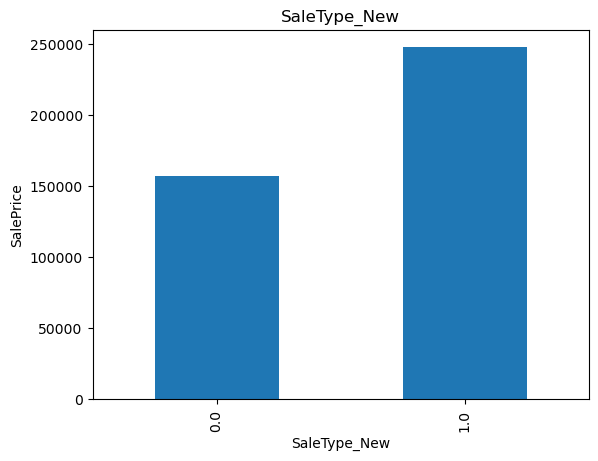

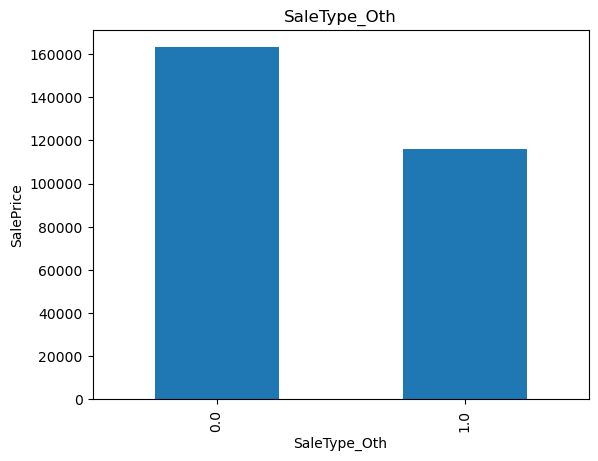

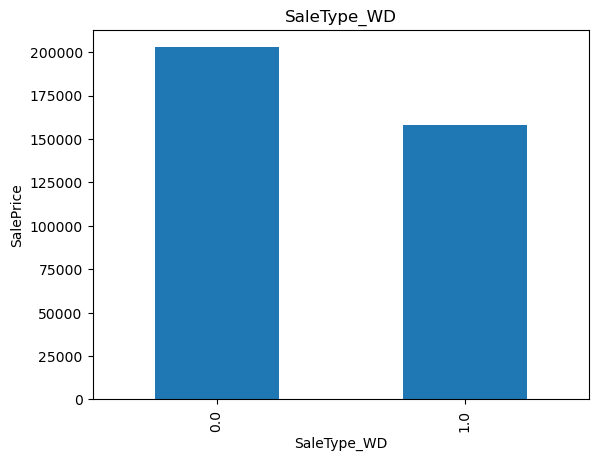

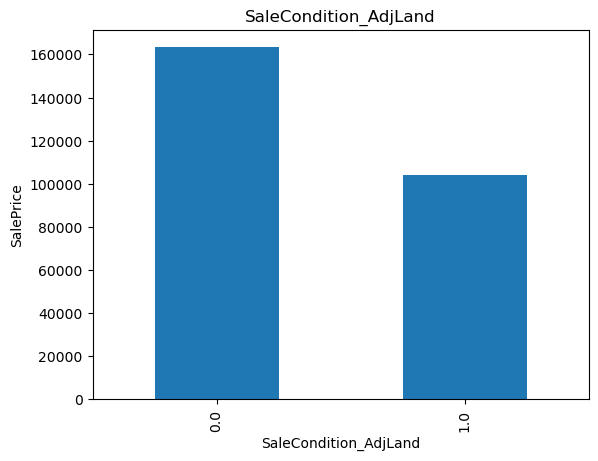

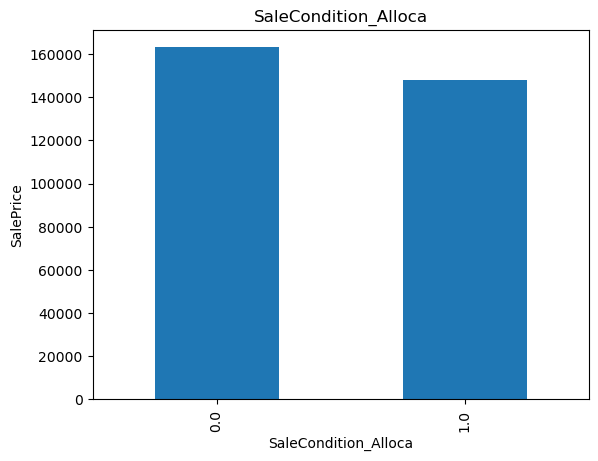

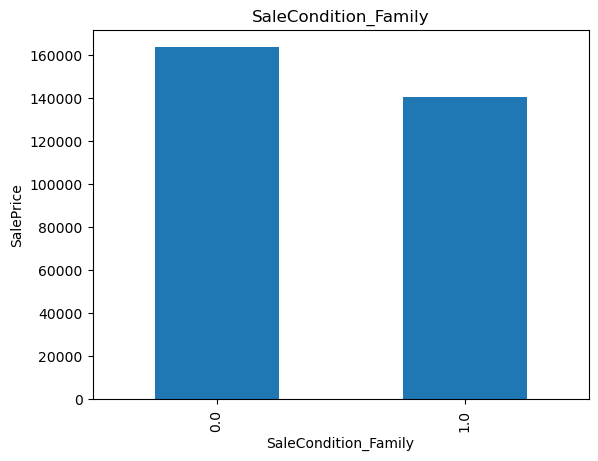

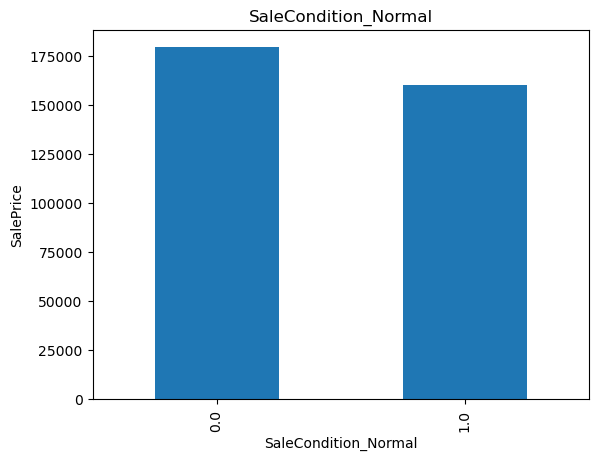

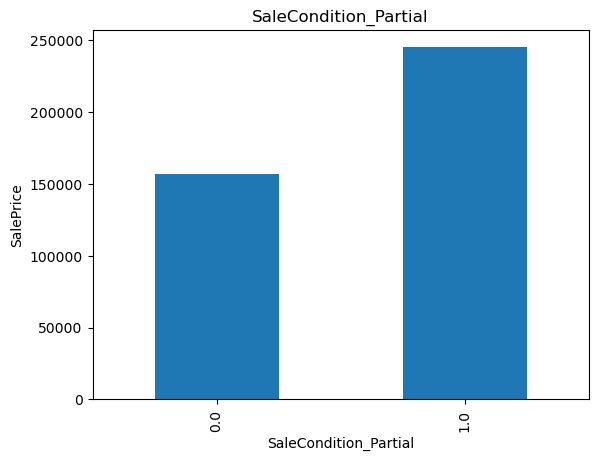

In [60]:
for feature in discrete_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Continues Features/ Variables

In [61]:
continues_features=[feature for feature in numerical_features if feature not in discrete_features+year_features+['Id']]
print("continues features Count {}".format(len(continues_features)))

continues features Count 16


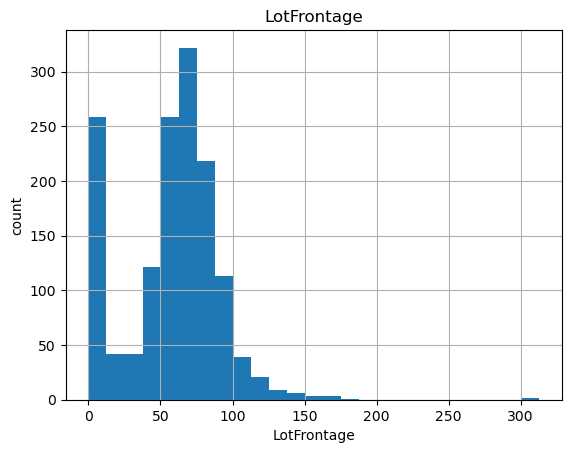

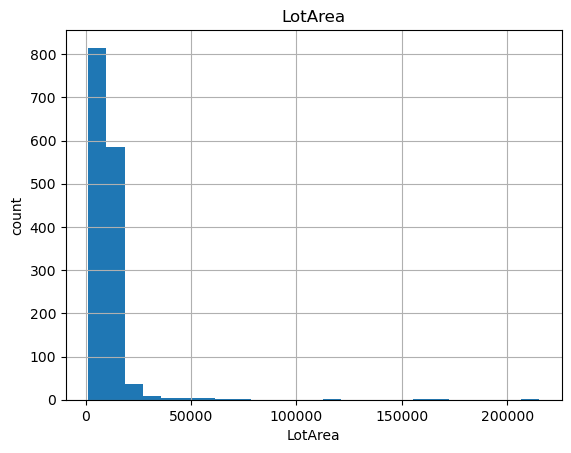

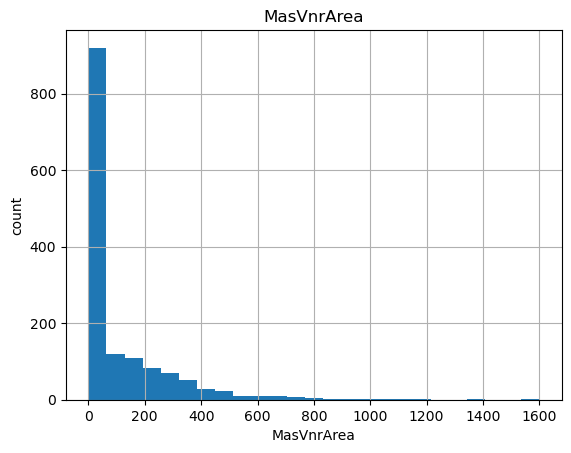

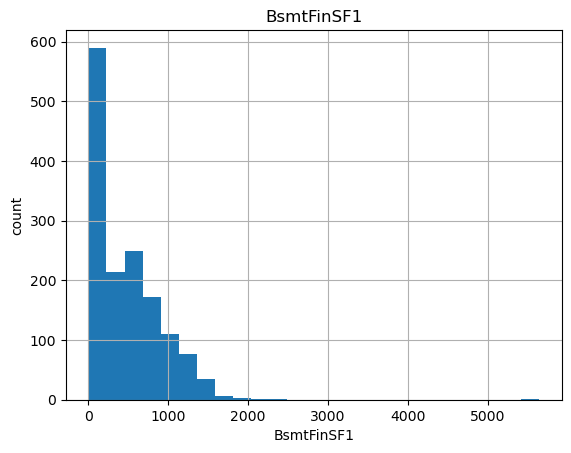

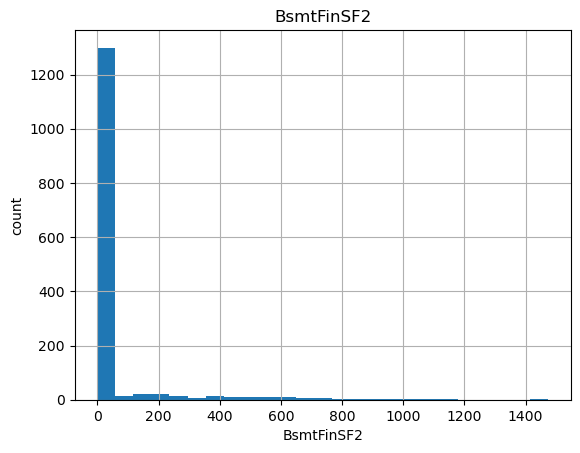

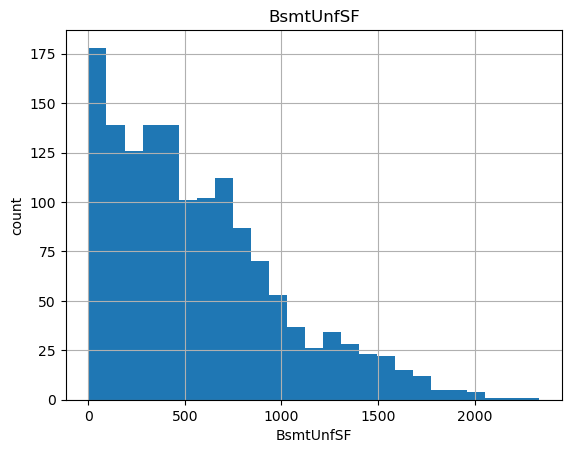

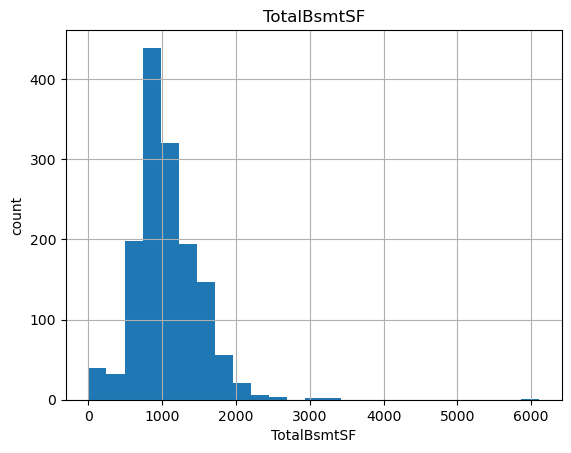

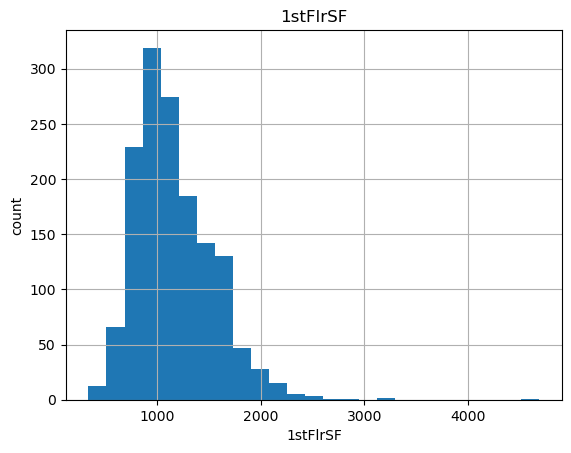

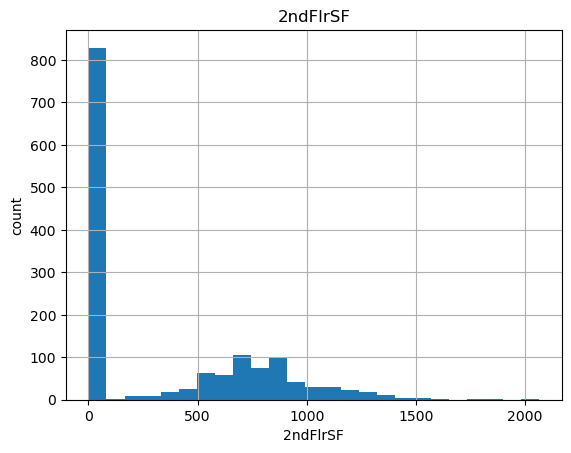

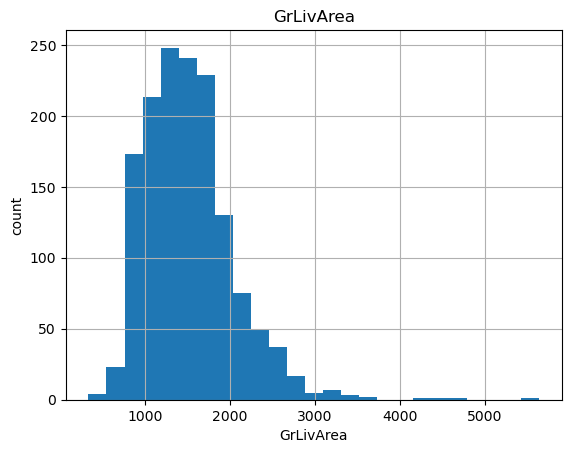

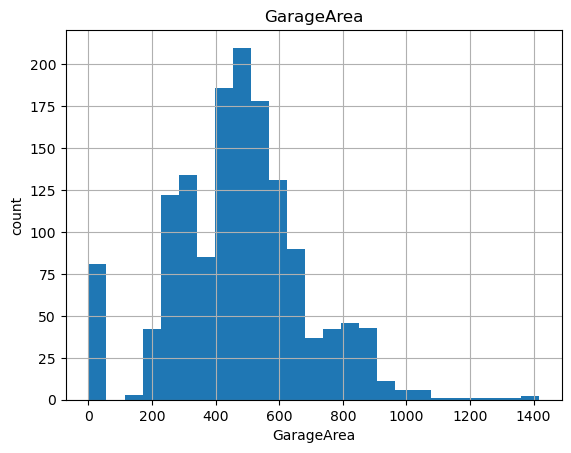

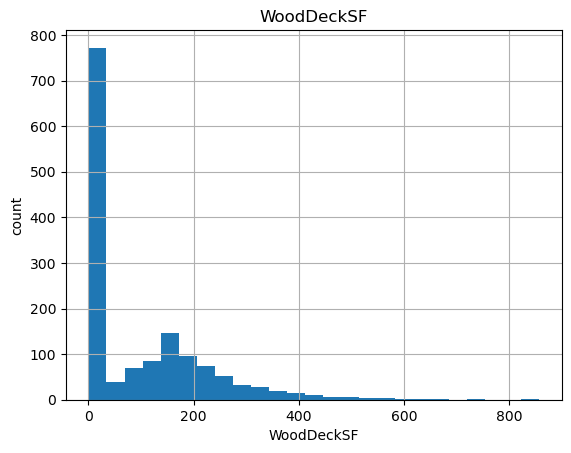

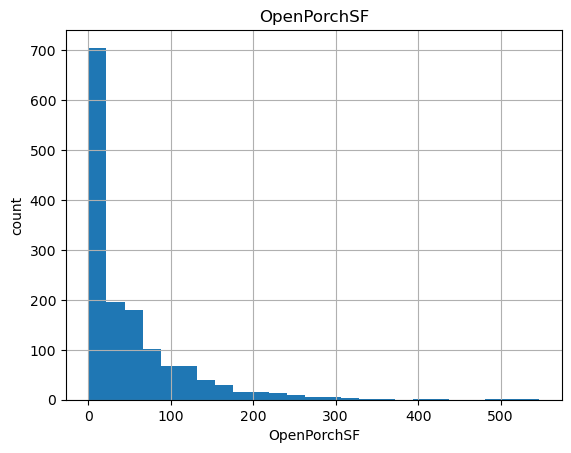

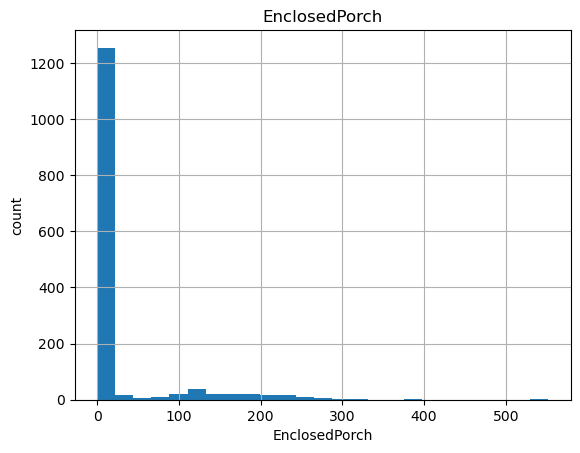

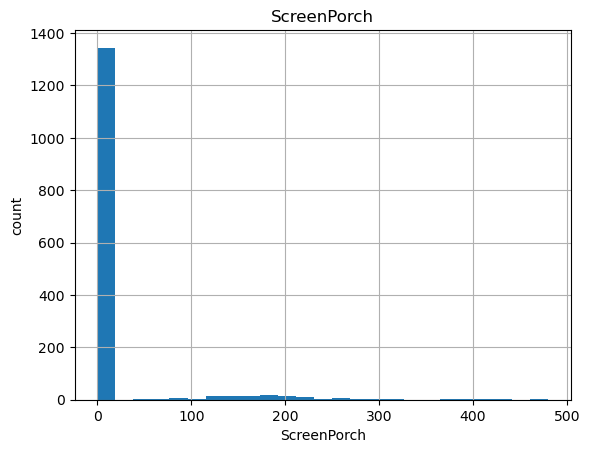

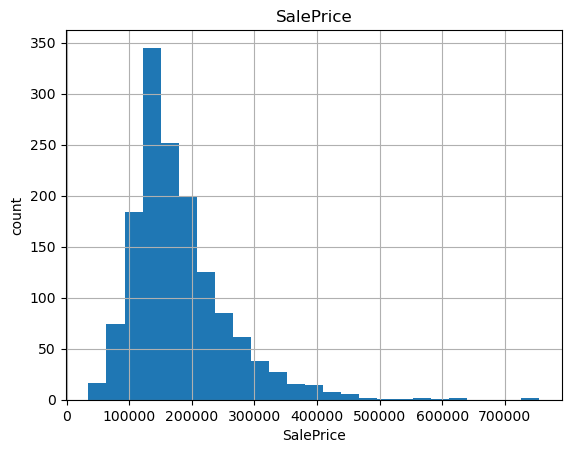

In [62]:
## Analysing the continues values by creating histograms to understand the 
for feature in continues_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

## Logarithmic transformation

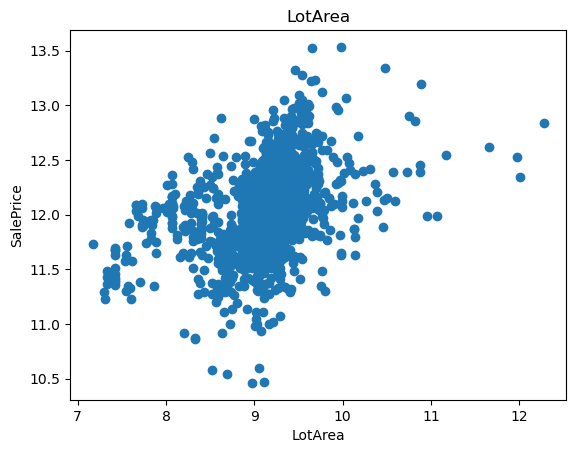

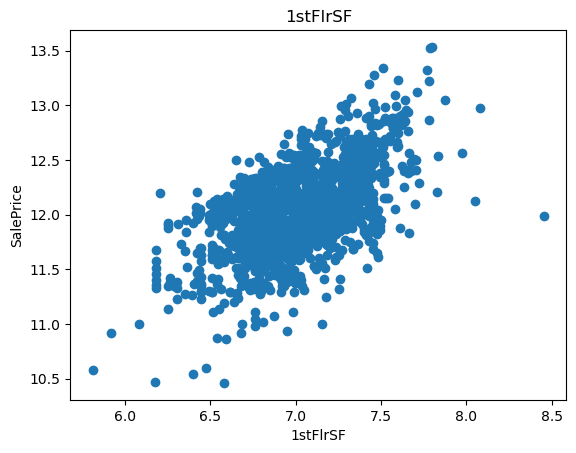

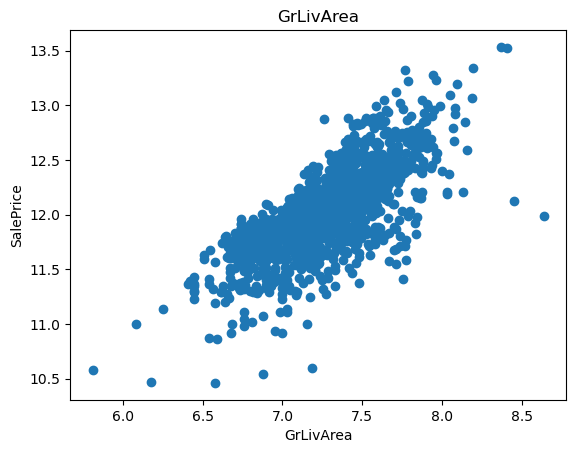

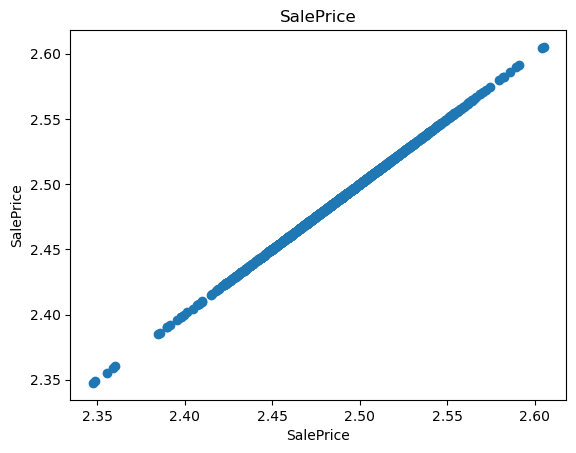

In [63]:
# using logarithmic transformation to convert continues features into normal distribution

for feature in continues_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

## Handling Outliers

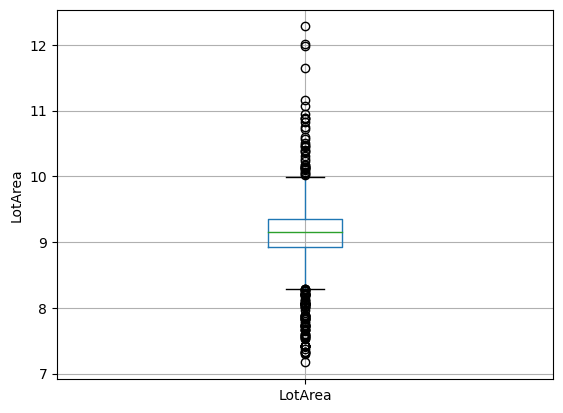

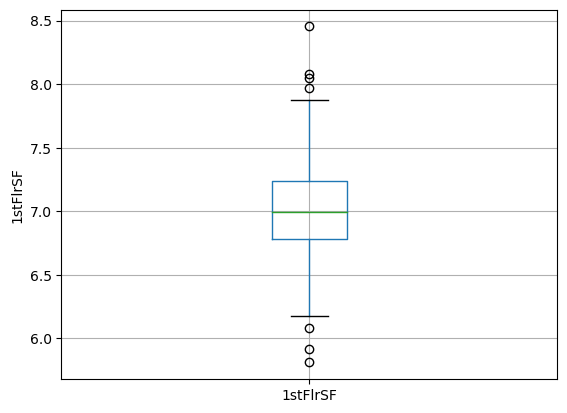

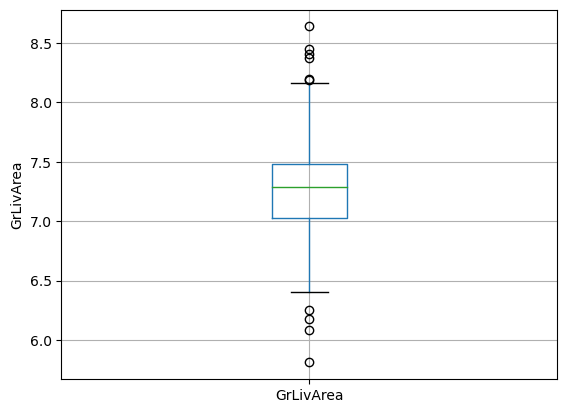

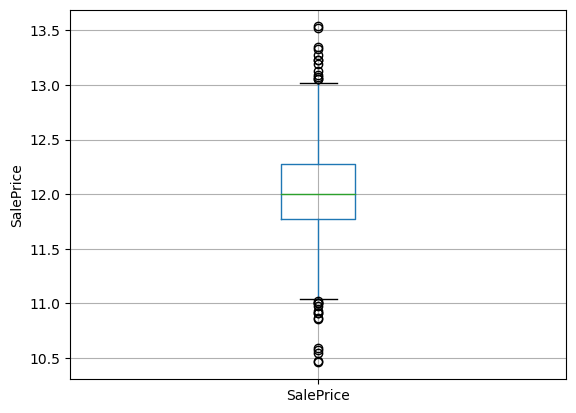

In [64]:
for feature in continues_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.show()
    

## Categorical Variable

In [65]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
print(len(categorical_features))

0


In [66]:
categorical_features


[]

In [67]:
df[categorical_features].head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [68]:
# finding the unique values in each categorical columns
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))


In [69]:
# finding the categorical columns having unique values less than equals to 9
# Initialize an empty list
categorical_features_group1 = []

# Iterate through each feature
for feature in categorical_features:
    if len(df[feature].unique()) <= 9:
        categorical_features_group1.append(feature)  # Corrected line

print("Categorical columns with unique values <= 9:")
print(categorical_features_group1)


Categorical columns with unique values <= 9:
[]


In [70]:
# Creating a DataFrame containing only the categorical columns group1
categorical_data_group1 = data[categorical_features_group1]
categorical_data_group1.sample(10)

Empty DataFrame
Columns: []
Index: [880, 387, 695, 1176, 1305, 835, 1242, 991, 941, 412]

In [71]:
# Apply one-hot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)  # 'drop=first' to avoid multicollinearity
encoded_data = pd.DataFrame(encoder.fit_transform(categorical_data_group1))
encoded_data.columns = encoder.get_feature_names(categorical_features_group1)


C:\Users\Sachin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [72]:
# Replace original categorical columns with encoded columns in the original DataFrame
df.drop(columns=categorical_features_group1, inplace=True)
df = pd.concat([df, encoded_data], axis=1)

# Now, data contains encoded categorical features

In [73]:
df.sample(10)

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
55            100    10175            6            5       1964          1964   
1044           80     9600            8            5       1981          1981   
131             0    12224            6            5       2000          2000   
1087           85    10574            8            5       2005          2006   
1033            0     8125            7            5       2002          2002   
266            70    11207            6            5       1997          1997   
430            21     1680            6            5       1971          1971   
998            60     9786            3            4       1922          1950   
149             0     6240            5            4       1936          1950   
1196           58    14054            7            5       2006          2006   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
55           272         490           0        935  ...             0.0   
1044           0        1104           0       1420  ...             0.0   
131           40         695           0        297  ...             0.0   
1087           0           0           0       1082  ...             0.0   
1033         295         986           0        668  ...             0.0   
266            0         714           0         88  ...             0.0   
430          232         387           0         96  ...             0.0   
998            0           0           0       1007  ...             0.0   
149            0           0           0        896  ...             0.0   
1196           0           0           0        879  ...             0.0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
55               0.0           0.0           0.0          1.0   
1044             0.0           0.0           0.0          1.0   
131              0.0           0.0           0.0          1.0   
1087             0.0           0.0           0.0          1.0   
1033             0.0           0.0           0.0          1.0   
266              0.0           0.0           0.0          1.0   
430              0.0           0.0           0.0          0.0   
998              0.0           0.0           0.0          1.0   
149              0.0           0.0           0.0          1.0   
1196             0.0           1.0           0.0          0.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
55                      0.0                   0.0                   0.0   
1044                    0.0                   0.0                   0.0   
131                     0.0                   0.0                   0.0   
1087                    0.0                   0.0                   0.0   
1033                    0.0                   0.0                   0.0   
266                     0.0                   0.0                   0.0   
430                     0.0                   0.0                   0.0   
998                     0.0                   0.0                   0.0   
149                     0.0                   0.0                   0.0   
1196                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
55                     1.0                    0.0  
1044                   1.0                    0.0  
131                    1.0                    0.0  
1087                   1.0                    0.0  
1033                   1.0                    0.0  
266                    1.0                    0.0  
430                    0.0                    0.0  
998                    1.0                    0.0  
149                    1.0                    0.0  
1196                   0.0                    1.0  

[10 rows x 203 columns]

In [74]:
# finding the categorical columns having unique values more than 9
# Assuming you have the lists categorical_features and categorical_features_group1
# Replace these with your actual lists

# Initialize an empty list for categorical_features_group2
categorical_features_group2 = []

# Check each feature in categorical_features
for feature in categorical_features:
    if feature not in categorical_features_group1:
        categorical_features_group2.append(feature)

print("Categorical features in categorical_features_group2:")
print(categorical_features_group2)



Categorical features in categorical_features_group2:
[]


In [75]:
import category_encoders as ce

# Assuming you have the lists categorical_features and categorical_features_group1
# Replace these with your actual lists

# Select only the features in categorical_features_group2
df_categorical_group2 = df[categorical_features_group2]

# Initialize the BinaryEncoder
encoder = ce.BinaryEncoder(cols=categorical_features_group2)

# Fit and transform the data
df_encoded_group2 = encoder.fit_transform(df_categorical_group2)

# Replace original categorical columns with encoded columns in the original DataFrame
df.drop(columns=categorical_features_group2, inplace=True)
df_final = pd.concat([df, df_encoded_group2], axis=1)

# Now, data contains encoded categorical features
print(df_final)


      LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0              65     8450            7            5       2003          2003   
1              80     9600            6            8       1976          1976   
2              68    11250            7            5       2001          2002   
3              60     9550            7            5       1915          1970   
4              84    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455           62     7917            6            5       1999          2000   
1456           85    13175            6            6       1978          1988   
1457           66     9042            7            9       1941          2006   
1458           68     9717            5            6       1950          1996   
1459           75     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF

## TASK 4 -- Multivariate Analysis

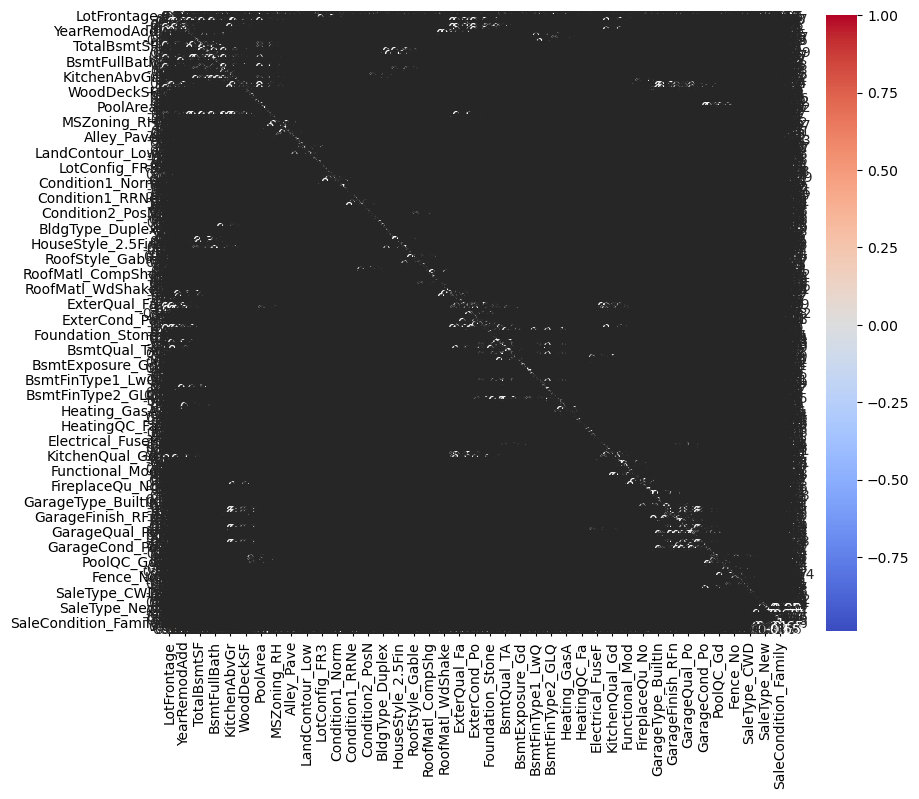

In [76]:
# Correlation matrix
corr = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# TASK 5 -- Feature Engineering

In [77]:
# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns',None)

In [78]:
df.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0           65     8450            7            5       2003          2003   
1           80     9600            6            8       1976          1976   
2           68    11250            7            5       2001          2002   
3           60     9550            7            5       1915          1970   
4           84    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0         196         706           0        150          856       856   
1           0         978           0        284         1262      1262   
2         162         486           0        434          920       920   
3           0         216           0        540          756       961   
4         350         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  \
0         0        0    2008     208500          0.0          0.0   
1         0        0    2007     181500          0.0          0.0   
2         0        0    2008     223500          0.0          0.0   
3         0        0    2006     140000          0.0          0.0   
4         0        0    2008     250000          0.0          0.0   

   MSZoning_RL  MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  \
0          1.0          0.0          1.0         1.0         0.0   
1          1.0          0.0          1.0         1.0         0.0   
2          1.0          0.0          1.0         1.0         0.0   
3          1.0          0.0          1.0         1.0         0.0   
4          1.0          0.0          1.0         1.0         0.0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0           0.0           0.0           1.0              0.0              0.0   
1           0.0           0.0           1.0              0.0              0.0   
2           0.0           0.0           0.0              0.0              0.0   
3           0.0           0.0           0.0              0.0              0.0   
4           0.0           0.0           0.0              0.0              0.0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0              1.0               0.0                0.0            0.0   
1              1.0               0.0                0.0            1.0   
2              1.0               0.0                0.0            0.0   
3              1.0               

In [92]:
df.shape

(1460, 79)

In [93]:
# Let us capture all the nan values in categorical features
features_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 1 and df[feature].dtypes == 'O']
features_nan

[]

In [94]:
# Let us capture all the nan values in numerical features
features_numerical_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 1 and df[feature].dtypes != 'O']
features_numerical_nan

[]

In [95]:
year_features

['YearBuilt', 'YearRemodAdd', 'YrSold']

In [96]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd']:
    df[feature]=df['YrSold']-df[feature]

In [97]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0       SC60       RL           65     8450   Pave  None      Reg         Lvl   
1       SC20       RL           80     9600   Pave  None      Reg         Lvl   
2       SC60       RL           68    11250   Pave  None      IR1         Lvl   
3       SC70       RL           60     9550   Pave  None      IR1         Lvl   
4       SC60       RL           84    14260   Pave  None      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace         196        Gd        TA   
1  CompShg     MetalSd     MetalSd       None           0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace         162        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None           0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace         350        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0          No     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd

In [98]:
df[year_features].head()

YearBuilt  YearRemodAdd  YrSold
0          5             5    2008
1         31            31    2007
2          7             6    2008
3         91            36    2006
4          8             8    2008

 ## Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observations

In [99]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [100]:
for feature in categorical_features:
    temp = df.groupby(feature)['SalePrice'].count() / len(df)
    temp_df = temp[temp > 0.01].index
    df[feature] = np.where(df[feature].isin(temp_df), df[feature], 'Rare_var')


In [101]:
df.head(100)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        SC60       RL           65     8450   Pave  None      Reg   
1        SC20       RL           80     9600   Pave  None      Reg   
2        SC60       RL           68    11250   Pave  None      IR1   
3        SC70       RL           60     9550   Pave  None      IR1   
4        SC60       RL           84    14260   Pave  None      IR1   
..        ...      ...          ...      ...    ...   ...      ...   
95       SC60       RL            0     9765   Pave  None      IR2   
96       SC20       RL           78    10264   Pave  None      IR1   
97       SC20       RL           73    10921   Pave  None      Reg   
98       SC30       RL           85    10625   Pave  None      Reg   
99       SC20       RL           77     9320   Pave  None      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl     Rare_var      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
..         ...       ...       ...       ...          ...        ...   
95         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
96         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
97         HLS    AllPub    Inside       Gtl      Edwards       Norm   
98         Lvl    AllPub    Corner       Gtl      Edwards       Norm   
99         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5          5   
1        Norm     1Fam     1Story            6            8         31   
2        Norm     1Fam     2Story            7            5          7   
3        Norm     1Fam     2Story            7            5         91   
4        Norm     1Fam     2Story            8            5          8   
..        ...      ...        ...          ...          ...        ...   
95       Norm     1Fam     2Story            6            8         16   
96       Norm     1Fam     1Story            7            5          7   
97       Norm     1Fam     1Story            4            5         42   
98       Norm     1Fam     1Story            5            5         90   
99       Norm     1Fam     1Story            4            5         51   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0              5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             31     Gable  CompShg     MetalSd     MetalSd       None   
2              6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4              8     Gable  CompShg     VinylSd     VinylSd    BrkFace   
..           ...       ...      ...         ...         ...        ...   
95            16     Gable  CompShg     VinylSd     VinylSd    BrkFace   
96             7     Gable  CompShg     VinylSd     VinylSd    BrkFace   
97            42       Hip  CompShg     HdBoard     HdBoard    BrkFace   
98            60     Gable  CompShg     Wd Sdng     Wd Sdng       None   
99            51     Gable  CompShg     Plywood     Plywood       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0          196        Gd        TA      PConc       Gd       TA           No   
1            0        TA        TA     CBlock       Gd       TA           Gd   
2          162        Gd        TA      PConc       Gd       TA           Mn   
3            0        TA        TA     BrkTil       TA       Gd           No   
4          350        Gd        TA      PConc       Gd       TA           Av   
..         ...       ...       ...     

In [102]:
categorical_features

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [79]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)
df_final = pd.DataFrame(columns=df.columns)
df_final[numerical_features] = df_scaled
df_final[categorical_features] = df[categorical_features]
df_final.rename(columns={'Id': 'Id_new'}, inplace=True)

## TASK 6 -- Geospatial Analysis
#### Since there are no geospatial features in the dataset, we can't perform this task.

## TASK 7 -- Feature Engineering and Size Impact


In [80]:
# Creating a new feature representing the ratio of living area to lot size
df_final['LivingAreaLotRatio'] = df_final['TotalBsmtSF'] / df_final['LotArea']
df_final

C:\Users\Sachin\AppData\Local\Temp\ipykernel_292\2357971213.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_final['LivingAreaLotRatio'] = df_final['TotalBsmtSF'] / df_final['LotArea']


LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0        0.212877 -0.207142     0.651479    -0.517200   1.050994   
1        0.645747 -0.091886    -0.071836     2.179628   0.156734   
2        0.299451  0.073480     0.651479    -0.517200   0.984752   
3        0.068587 -0.096897     0.651479    -0.517200  -1.863632   
4        0.761179  0.375148     1.374795    -0.517200   0.951632   
...           ...       ...          ...          ...        ...   
1455     0.126303 -0.260560    -0.071836    -0.517200   0.918511   
1456     0.790037  0.266407    -0.071836     0.381743   0.222975   
1457     0.241735 -0.147810     0.651479     3.078570  -1.002492   
1458     0.299451 -0.080160    -0.795151     0.381743  -0.704406   
1459     0.501457 -0.058112    -0.795151     0.381743  -0.207594   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         0.878668    0.514104    0.575425   -0.288653  -0.944591   
1        -0.429577   -0.570750    1.171992   -0.288653  -0.641228   
2         0.830215    0.325915    0.092907   -0.288653  -0.301643   
3        -0.720298   -0.570750   -0.499274   -0.288653  -0.061670   
4         0.733308    1.366489    0.463568   -0.288653  -0.174865   
...            ...         ...         ...         ...        ...   
1455      0.733308   -0.570750   -0.973018   -0.288653   0.873321   
1456      0.151865    0.087911    0.759659    0.722112   0.049262   
1457      1.024029   -0.570750   -0.369871   -0.288653   0.701265   
1458      0.539493   -0.570750   -0.865548    6.092188  -1.284176   
1459     -0.962566   -0.570750    0.847389    1.509640  -0.976285   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0       -0.459303 -0.793434  1.161852     -0.120242   0.370333      1.107810   
1        0.466465  0.257140 -0.795163     -0.120242  -0.482512     -0.819964   
2       -0.313369 -0.627826  1.189351     -0.120242   0.515013      1.107810   
3       -0.687324 -0.521734  0.937276     -0.120242   0.383659      1.107810   
4        0.199680 -0.045611  1.617877     -0.120242   1.299326      1.107810   
...           ...       ...       ...           ...        ...           ...   
1455    -0.238122 -0.542435  0.795198     -0.120242   0.250402     -0.819964   
1456     1.104925  2.355701 -0.795163     -0.120242   1.061367      1.107810   
1457     0.215641  0.065656  1.844744     -0.120242   1.569647     -0.819964   
1458     0.046905 -0.218982 -0.795163     -0.120242  -0.832788      1.107810   
1459     0.452784  0.241615 -0.795163     -0.120242  -0.493934      1.107810   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0        -0.241061  0.789741  1.227585      0.163779     -0.211454   
1         3.948809  0.789741 -0.761621      0.163779     -0.211454   
2        -0.241061  0.789741  1.227585      0.163779     -0.211454   
3        -0.241061 -1.026041 -0.761621      0.163779     -0.211454   
4        -0.241061  0.789741  1.227585      1.390023     -0.211454   
...            ...       ...       ...           ...           ...   
1455     -0.241061  0.789741  1.227585      0.163779     -0.211454   
1456     -0.241061  0.789741 -0.761621      0.163779     -0.211454   
1457     -0.241061  0.789741 -0.761621      1.390023     -0.211454   
1458     -0.241061 -1.026041 -0.761621     -1.062465     -0.211454   
1459     -0.241061 -1.026041  1.227585      0.163779     -0.211454   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0         0.912210   -0.951226    0.311725    0.351000   -0.752176   
1        -0.318683    0.600495    0.311725   -0.060731    1.626195   
2        -0.318683    0.600495    0.311725    0.631726   -0.752176   
3         0.296763    0.600495    1.650307    0.790804   -0.752176   
4         1.527656    0.600495    1.650307    1.698485    0.780197   
...            ...         ...         ...         ...         ...   
1455      0.296763    0.600495    0.311725   -0.060731   -0.752176  

## TASK 8 -- Market Trends and Historical Pricing

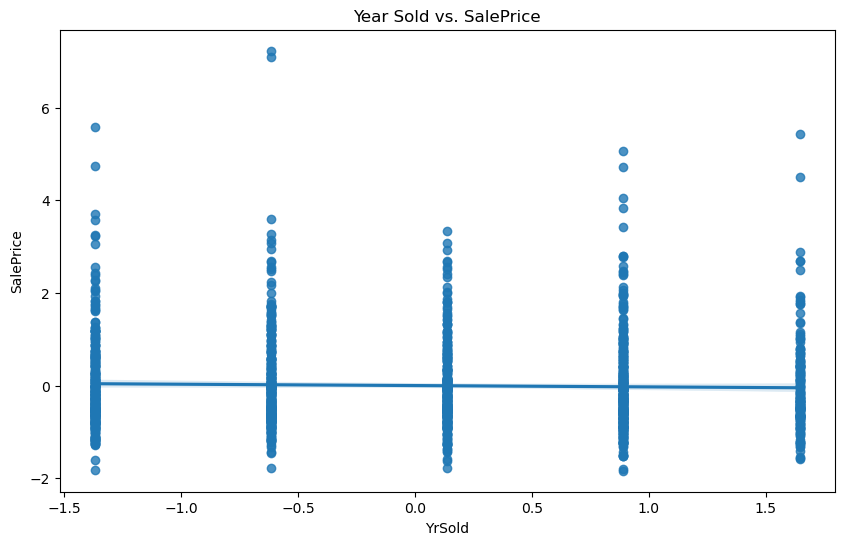

In [81]:
# Analyzing the relationship between Year Sold and SalePrice
plt.figure(figsize=(10, 6))
sns.regplot(x="YrSold", y="SalePrice", data=df_final)
plt.title("Year Sold vs. SalePrice")
plt.show()

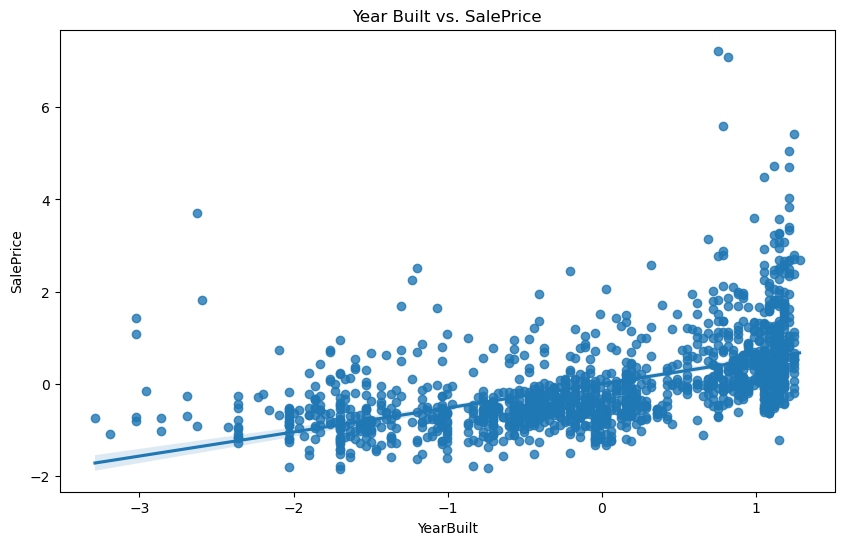

In [82]:
# Analyzing the relationship between YearBuilt and SalePrice
plt.figure(figsize=(10, 6))
sns.regplot(x="YearBuilt", y="SalePrice", data=df_final)
plt.title("Year Built vs. SalePrice")
plt.show()

## TASK 9 -- Customer Preferences and Amenities

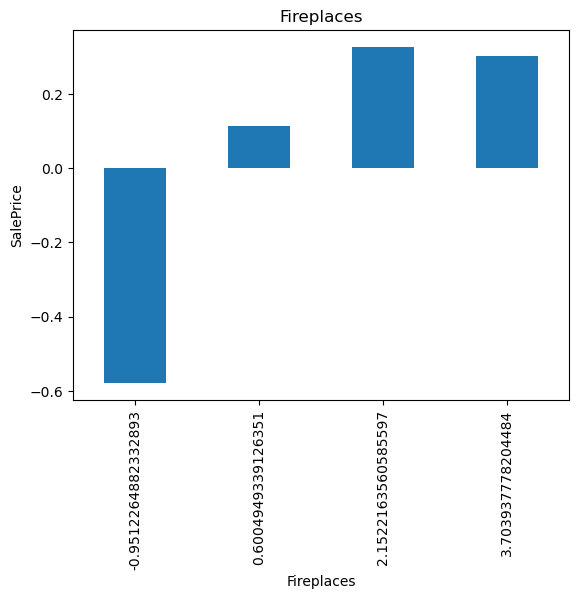

KeyError: 'FireplaceQu'

In [83]:
# Analyzing the relationship between fireplace and SalePrice
fireplace = ['Fireplaces', 'FireplaceQu']
for feature in fireplace:
    data = df_final.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

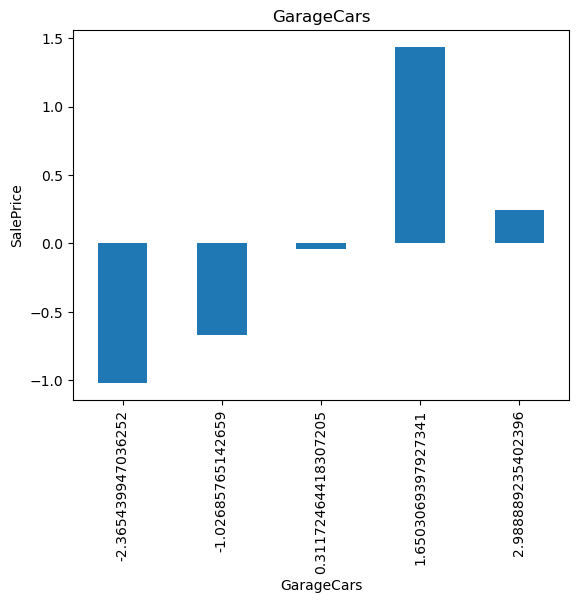

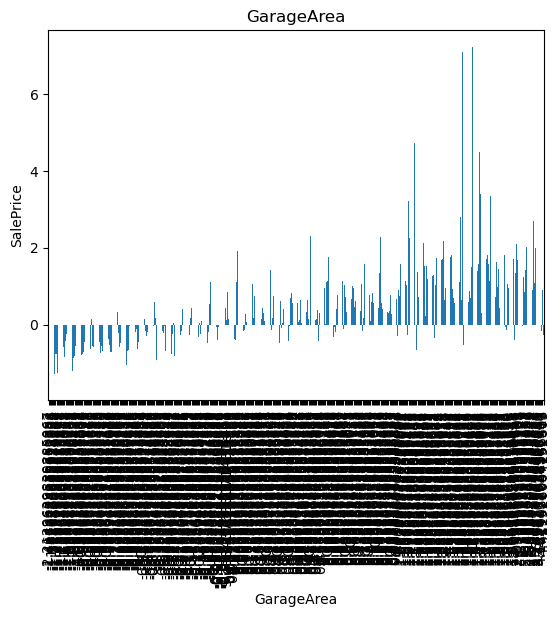

In [84]:
# Analyzing the relationship between garage and SalePrice
garage = ['GarageCars', 'GarageArea']
for feature in garage:
    data = df_final.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

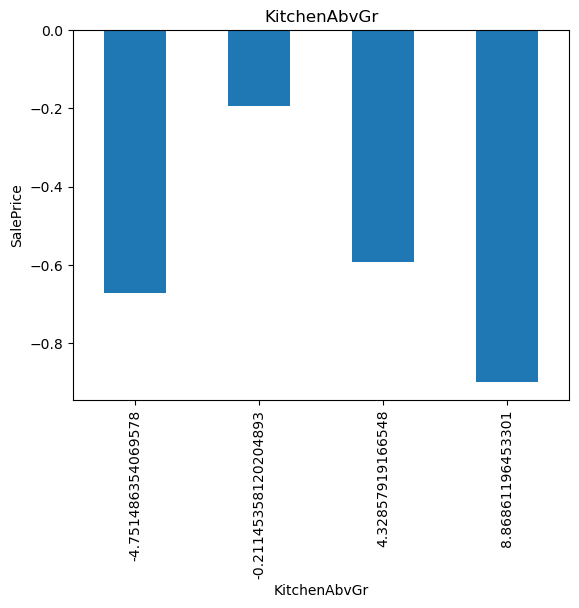

KeyError: 'KitchenQual'

In [90]:
# Analyzing the relationship between kitchen quality and SalePrice
kitchen = ['KitchenAbvGr', 'KitchenQual']
for feature in kitchen:
    data = df_final.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

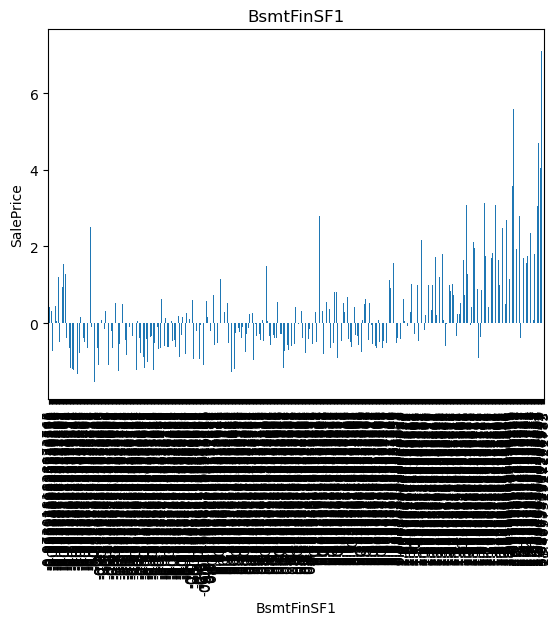

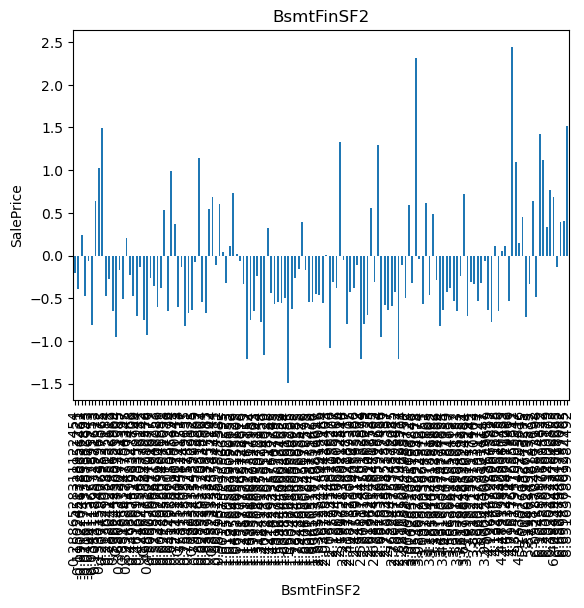

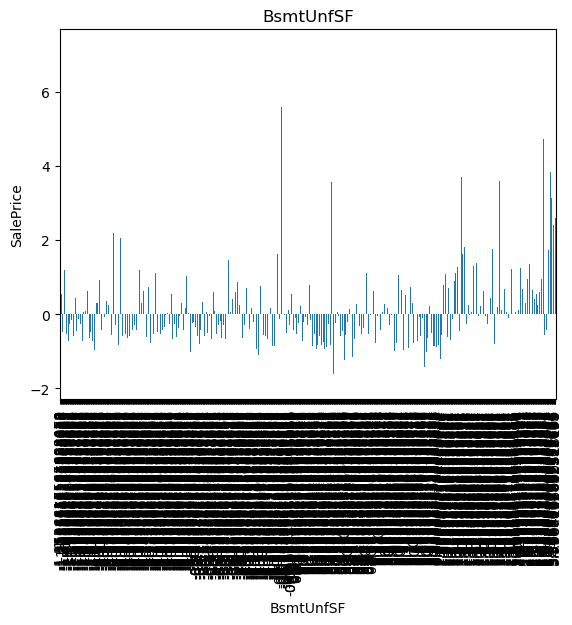

In [86]:
# Analyzing the relationship between basement and SalePrice
basement = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
for feature in basement:
    data = df_final.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

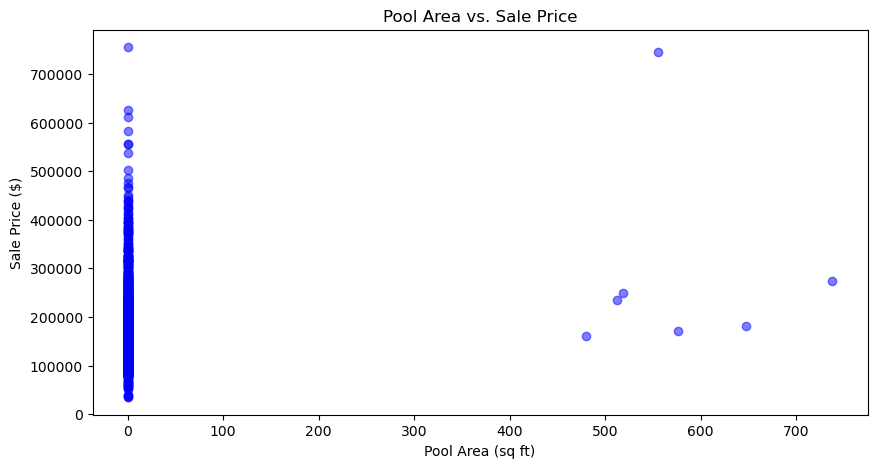

In [87]:
# Analyzing the relationship between pool area and sale price
plt.figure(figsize=(10, 5))
plt.scatter(df['PoolArea'], df['SalePrice'], marker='o', alpha=0.5, color='blue')
plt.xlabel('Pool Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.title('Pool Area vs. Sale Price')
plt.show()

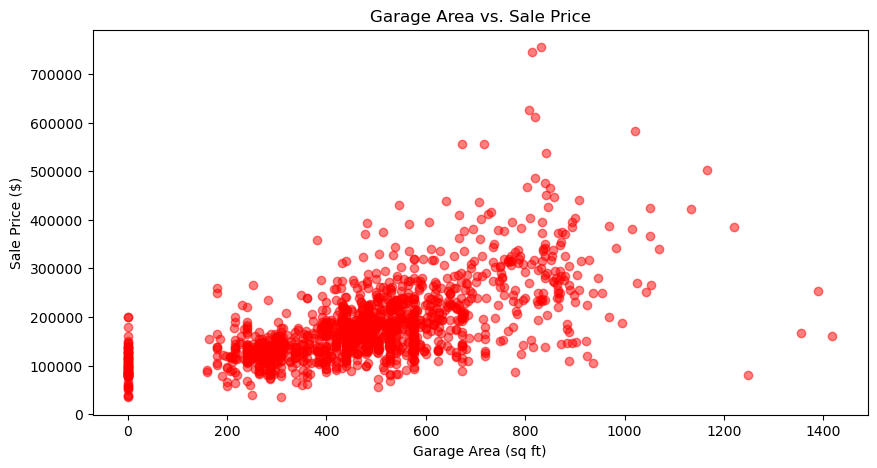

In [88]:
# Analyzing the relationship between garage area and sale price
plt.figure(figsize=(10, 5))
plt.scatter(df['GarageArea'], df['SalePrice'], marker='o', alpha=0.5, color='red')
plt.xlabel('Garage Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.title('Garage Area vs. Sale Price')
plt.show()